# Deep Learning: 

### Group 6
    Francisco Costa, 20181393
    João Gouveia, 20181399
    Nuno Rocha, 20181407
    Pedro Rivera, 20181411
   
<a class="anchor" id="Table_Contents"></a>
# TABLE OF CONTENTS
<br></br>
* [Run tensorflow.keras on GPU](#gpu)


* [Functions (developed by us)](#functions)


* [# 1. Business Understanding](#business-understanding)


* [# 2. Data Understanding](#data-understanding)
    * [2.1: Collect the data](#collect-the-data)
    
    * [2.2: Describe the data](#describe-the-data)
        * [Key Insights](#describe-the-data-ki)  


* [# 3. Data Preparation](#data-preparation)


* [# 4. Modelling](#modelling)

    * [# 4.1 From scratch](#modelling-from-scratch)
        * [# 4.1.1: Simplified  (Conv: 2 Conv2d layer | Classifier: 1 Dense layer)](#modelling-simplified)  
            * [Key Insights](#modelling-simplified-ki)   
        
        * [# 4.1.2: Add  Batch Normalization (Conv: 2 Conv2d layer + Batchnorm | Classifier: 1 Dense layer)](#modelling-batchnorm)    
            * [Key Insights](#modelling-batchnorm-ki)   
            
        * [# 4.1.3: Add Dropout in Convolutional (Conv: 2 Conv2d layer + Dropout | Classifier: 1 Dense layer)](#modelling-convdropout) 
            * [Key Insights](#modelling-convdropout-ki)  
            
        * [# 4.1.4: Add Dropout in Classifier (Conv: 2 Conv2d layer + Dropout | Classifier: 1 Dense layer + dropout)](#modelling-dropout-all) 
            * [Key Insights](#modelling-dropout-all-ki) 
        
        * [# 4.1.5: Add  Batch Normalization after Dropout (Conv: 2 Conv2d layer + Batchnorm + Dropout | Classifier: 1 Dense layer + Dropout)](#modelling-addbatchnorm)  
            * [Key Insights](#modelling-addbatchnorm-ki) 
            
        * [# 4.1.6: Add Additional Conv (Conv: 3 Conv2d layer + Batchnorm + Dropout | Classifier: 1 Dense layer + Dropout)](#modelling-adicconv)  
            * [Key Insights](#modelling-adicconv-ki) 

        * [# 4.1.7: With Data Augmentation](#modelling-augmented)    
            * [Key Insights](#modelling-augmented-ki)     

    * [# 4.2 Pre-trained models](#modelling-pre-trained)
        * [Key Insights](#modelling-pre-trained-ki)
    
    * [# 4.3 Model Comparison](#modelling-comp)
        * [Key Insights](#modelling-comp-ki)
        
    * [# 4.4 Model Visualization](#model-vizualization)
        * [# 4.4.1: Activation visualization](#model-vizualization-activation)  
            * [# 4.4.1.1: Visualizing intermediate activations](#model-vizualization-activation-int) 
                * [Key Insights](#model-vizualization-activation-int-ki) 
                
            * [# 4.4.1.2: Activation of a single channel](#model-vizualization-activation-single) 

        * [# 4.4.2: Filter Visualization](#model-vizualization-filter)  
            * [Key Insights](#model-vizualization-filter-ki) 
            
* [# 5. References](#references)

# Citations:


<cite data-cite="chollet2015keras">@misc{chollet2015keras,
  title={Keras},
  author={Chollet, Fran\c{c}ois and others},
  year={2015},<div class="cite2c-biblio"></div>
  howpublished={\url{https://keras.io}},
}</cite>

<cite data-cite="Stallkamp-IJCNN-2011">@inproceedings{Stallkamp-IJCNN-2011,
    author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel},
    booktitle = {IEEE International Joint Conference on Neural Networks},
    title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition},
    year = {2011},
    pages = {1453--1460}
}</cite>

<cite data-cite="ioffe2015batch">@misc{ioffe2015batch,
    title={Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift},
    author={Sergey Ioffe and Christian Szegedy},
    year={2015},
    eprint={1502.03167},
    archivePrefix={arXiv},
    primaryClass={cs.LG}
}</cite>

The requirements in terms of libraries used in this notebook are listed below:

    pandas==0.24.2
    seaborn==0.9.0
    numpy==1.16.4
    scikit_image==0.15.0
    matplotlib==3.1.0
    tensorflow-gpu==1.14.0
    Pillow==7.0.0
    scikit_learn==0.22.1
    skimage==0.0

In [1]:
import tensorflow as tf
from tensorflow.python.client import device_lib
from tensorflow.keras import Model, layers, optimizers, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import save_img
from tensorflow.keras import backend as K

from skimage import exposure
from skimage.color import rgb2gray
from PIL import Image as pil_image

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import random
import numpy as np
import pandas as pd
import math
import time
from datetime import timedelta
import os
import shutil
import gc

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mtick
import matplotlib.colors as colors
import seaborn as sns
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.colorbar import colorbar

# Set the style for the Seaborn's plots
sns.set_style('whitegrid',{
    'xtick.bottom': True,
    'xtick.color': '.1',
    'xtick.direction': 'out',
    'xtick.top': False,
    'xtick.major.size': 1,
    'xtick.minor.size': 0.5,
    'ytick.left': True,
    'ytick.color': '.1',
    'ytick.direction': 'out',
    'ytick.right': False,
    'ytick.major.size': 1,
    'ytick.minor.size': 0.5,    
    'ytick.color': '.1',
    'grid.linestyle': '--',
    'axes.edgecolor': '.1',
    'grid.color': '0.8'
 })

<a class="anchor" id="gpu"></a>
# Run tensorflow.keras on GPU

To run tensorflow.keras on GPU we followed the steps described in this <a href='https://www.tensorflow.org/install/gpu'>link</a> in the order presemted below:

- `NVIDIA GPU driver`: It can be found on this <a href='https://www.nvidia.com/download/index.aspx?lang=en-us'>link</a>
- `CUDA Toolkit`: It can be found on this <a href='https://developer.nvidia.com/cuda-toolkit-archive'>link</a>
- `cuDNN SDK`: This is the library of primitives for deep neural networks and it can be found on this <a href='https://developer.nvidia.com/cuda-toolkit-archive'>link</a>. After the download one needs to replace teh contents of the zip file into the directory of the installation of the CUDA Toolkit (standard directory: C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v10.0)
- `TensorFlow version`: Since we were using an Anaconda Distribution for running Python on the Anaconda Prompt we installed the TensorFlow package with GPU support (to acoid using version 2 as discussed on the classes, we choose to install the lastest version under the 1.xx) available on the Anaconda Cloud: conda install tensorflow-gpu=1.14.0 

In [2]:
# identify the devices availables on the local machine to run tensorflow
tf.debugging.set_log_device_placement(True)
devices = tf.config.experimental.list_physical_devices()
devices

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
# create a session and define some parameters to perform the calculations on GPU
config = tf.ConfigProto()
config.gpu_options.visible_device_list = '0'
config.gpu_options.allow_growth = True # allocate the gpu memory as required in an incremental fashion
sess = tf.Session(config = config)

<b>Important Note</b>: 
>To run the code in the GPU please put the value `'/GPU:0'` on the line below, but please note that this is only possible if apart from the hardware requirements (having a CUDA-enabled GPU card, see <a href='https://developer.nvidia.com/cuda-gpus'>link</a>) all the software requirements are also fulfilled as described previously. To check if all the requirements are fulfilled, on the output of the seconf last cell a PhysicalDevice with a GPU reference should be listed.
>
>Otherwise, it is still possible to run all the code lines from this notebook on the CPU and in this case, please put the value `'/CPU:0'` on the line below.

In [4]:
selected_device = '/GPU:0'

[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="functions"></a>
# Functions (developed by us)


***


- <b>smooth_curve</b>: This function was based on the slides from the classes and performs a smoothing by an input factor for ploting purposes, <a href='#f_model_pred_cost'>see link</a>.

  <u>Inputs</u>: This function as the following inputs
    
    - `points`: the sequence of points to perform the smoohting (list of float values)
    - `factor`: smoothing factor (float) # default value of 0.9
    
  <u>Output</u>: This function has the following output:
    
    - `smoothed_points`: the sequence of points after performing the smoothing operation (list of float values) 
    
    
***


- <b>plot_count_labels</b>: This function was developed by us to plot the number of pictures from the different classes, <a href='#plot_count_labels'>see link</a>.

  <u>Input</u>: This function has the following inputs
    
    - `array_generator`: the source image generated


***


- <b>f_train_CNN</b>: This function was developed by us in order to encapsulate the code required to train all our Convolutional Neural Networks (CNNs) built from scratch avoiding copy & paste errors on the code, <a href='#f_train_CNN'>see link</a>. We have always considered an architecture with 2 different sections: the first as a convolutional section (stacks of convolutional and max-pooling layers on its simple formulation) followed by a Multi-Layer Perceptron (MLP) section composed of densely connected layers as a classifier. All our models were built on <a href='https://www.tensorflow.org/guide/keras'>tensorflow.keras</a> using the functional API model (to allow for greater flexibility in implementing the batch normalization layer).
    
  <u>Inputs</u>: This function has several multiple inputs (since it needs to cover different CNNs) that will be briefly described below:
    
    - `selected_device_in`: allows to run the code either on CPU or GPU (string) 
    - `train_generator_in`: sequence of images to train the model (from keras.ImageDataGenerator)
    - `validation_generator_in`: sequence of images for validation purposes (from keras.ImageDataGenerator)    
    - `epochs_max_in`: maximum number of epochs to train de model (int)
    - `batch_size_in`: the batch_size to be used by keras for parallel processing (int)
    - `model_name_in`: the name of the model (string)
    
    set the architecture of the CNN - Convolutional Section:
    - `model_Conv2D_filters_in`: number of filters to be used in <a href='https://keras.io/layers/convolutional/#conv2d'>keras.layers.Conv2D</a> (list with int values)
    - `model_Conv2D_kernelsize_in`: the height and width of the 2D convolution window to be used in keras.layers.Conv2D (list with int values)
    - `model_Conv2D_strides_in`: the strides of the convolution along the height and width to be used in keras.layers.Conv2D (list with int values)
    - `model_Conv2D_activation_in`: the activation function to be used regarding the convolutional layers (list of string values) #'relu', 'tanh'
    - `model_Conv2D_padding_in`: the padding schema to be used in keras.layers.Conv2D (list of string values) # 'valid', 'same'
    - `model_Conv2D_normalization_in`: wether to apply a <a href='https://keras.io/layers/normalization/#batchnormalization'>keras.layers.BatchNormalization</a> layer right after the convolutional layer (bool)
    - `model_MaxPooling2D_size_in`: the pool size for the max-pooling operation to be performed in the <a href='https://keras.io/layers/pooling/#maxpooling2d'>keras.layers.MaxPooling2D</a> (list of int values)
    - `model_dropout2D_rate_in`: wether to apply a <a href='https://keras.io/layers/core/#spatialdropout2d'>keras.layers.SpatialDropout2D</a> layer right after the max-pooling layer and, if greater than 0, set the fraction of the input units to drop (list of float values)

    set the architecture of the CNN - MLP Section:
    - `model_MLP_units_in`: number of units to be used in <a href='https://keras.io/layers/core/#dense'>keras.layers.Dense</a> (list of int values)
    - `model_MLP_activation_in`: the activation function to be used in keras.layers.Dense (list of string values) #'relu', 'tanh'
    - `model_MLP_dropout_rate_in`: wether to apply a <a href='https://keras.io/layers/core/#dropout'>keras.layers.Dropout</a> layer right after the dense layer and, if greater than 0, set the fraction of the input units to drop (list of float values)
    
    <br></br>
    - `lr_init_in`: the initial learning rate to be used with the optimizers (float)
    - `lr_decay_in`: the learning  rate change schema to be used with the optimizers (string) # 'exponential', 'step_decay', 'constant' 
    - `epochs_lr_decay_in`: the number of epochs to drop the learning rate with a step decay schema, or the number of epochs to reduce the initial learning rate 100 times with an exponential decay schema (int)
    - `optimizer_in`: define the optimizer to be used during the training (string) # 'RMSprop', 'Adam', 'SGD'
    - `stop_delta_in`: the minimum change in the monitored quantity to qualify as an improvement to be used in the <a href='https://keras.io/callbacks/#earlystopping'>keras.callbacks.EarlyStopping</a> (float)
    - `stop_patience_in`: number of epochs that produced the monitored quantity with no improvement after which training will be stopped to be used in the keras.callbacks.EarlyStopping, if 0 then no early stopping criteria will be used (int) # default value of 0
    - `smooth_in`: smooth factor to be used on the plots, making use of the previous function (float) # default value of 0
    - `verbose_in`: verbosity mode to be used in the training process and in <a href='https://keras.io/callbacks/#learningratescheduler'>keras.callbacks.LearningRateScheduler</a> and <a href='https://keras.io/callbacks/#modelcheckpoint'>keras.callbacks.ModelCheckpoint</a> (int) # default value of 0
    <br></br>

  <u>Outputs</u>: This function has the following outputs:
    
    - `figmodelDL_epochs`: this a figure composed of 3 plots: the first is the loss with the epochs for the traning and validation sets, the second is the accuracy  with the epochs again for both training and validation sets and the final one is the learning rate with the epochs (matplotlib.pyplot)
    - `elapsed_time`: this is the time elapsed for training the model in seconds (float)
    - `trainable_count`: this is the count of the trainable parameters from the CNN (int)
    - `non_trainable_count`: this is the count of the non-trainable parameters from the CNN (int)
    <br></br>

  <u>Additional Notes</u>: We have implemented some keras.callbacks, like the EarlyStopping to allow the definition of a stoping criteria for training the model based on the loss trend for the validation set, the LearningRateScheduler to decrease the learning rate during the training process and the ModelCheckpoint to save the model in a .h5 file after every epoch but only store the model with the lowest loss on the validation set.


***


- <b>f_TestOptimizersLR_CNN</b>: This function was developed by us in order to encapsulate the code required to test the optimizers, the initial learning rate and the learning rate decay schema after defining a CNN architecture and it was built from the previous function, <a href='#f_TestOptimizersLR_CNN'>see link</a>.

    <u><i>New</i> Inputs</u>: The main different inputs from the previous function are listed below:

    - `selected_device_in`: allows to run the code either on CPU or GPU (string) 
    - `train_generator_in`: sequence of images to train the model (from keras.ImageDataGenerator)
    
    <u>Output</u>: This function has only one output as a figure from matplotlib.pyplot composed of the following plots: training loss and training accuracy with the epochs run and the validation loss and accuracy with the epochs run, for all the combinations of optimizers, initial learning rate and learning rate decay schema considered as inputs.

    <u>Additional Notes</u>: The EarlyStopping and the ModelCheckpoint callbacks were not implemented as the idea is just to run some epochs for each combination of optimizer, initial learning rate and learning rate decay schema and only then start training a new model with the best combination.    
    
    
***


- <b>f_CM_CNN</b>: This function was developed by us to evaluate some metrics to access the models built: accuracy, precision and recall for the train, validation and test sets and plot the confusion matrix, <a href='#f_CM_CNN'>see link</a>. All the metrics and even the confusion matrix were implemented using the <a href='https://scikit-learn.org/stable/modules/classes.html?highlight=metrics#module-sklearn.metrics'>scikit-learn</a> methods. In this function the trained model is directly imported from the .h5 file exported during the training process as a result of the ModelCheckpoint process.

  <u>Inputs</u>: This function has several multiple inputs that will be briefly described below:
    
    - `training_dir_in`: the file system directory for the training set (string)
    - `train_data_generator_in`: sequence of images used to train the model (from keras.ImageDataGenerator)
    - `validation_dir_in`: the file system directory for the validation set (string)
    - `validation_data_generator_in`: sequence of images used for validation purposes (from keras.ImageDataGenerator)    
    - `test_dir_in`: the file system directory for the test set (string)
    - `test_data_generator_in`: sequence of images for test purposes (from keras.ImageDataGenerator)    
    - `batch_size_in`: the batch_size to be used by keras for parallel processing (int)
    - `model_name_in`: the name of the model (string)
    - `img_width_in`: the width of the images in pixels (int)
    - `img_height_in`: the height of the images in pixels (int)
    - `data_in`: the selected set to plot the confusion matrix (string) # 'train', 'validation', 'test'
    - `normalized_in`: wether the confusion matrix should be normalized with values in the range between 0 and 1 (bool) # False as default value
    - `CM_plot_in`: wether to plot the confusion matrix (bool) # False as default value    
    - `avg_in`: the average option to be used on the <a href='https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html'>sklearn.metrics.precision_score</a> and <a href='https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html'>sklearn.metrics.recall_score</a> since this is a multiclass classification problem (string) # 'micro', 'weighted' and 'macro' as the default value
    
      <u>Outputs</u>: This function has the following outputs:
    
    - `figmodels_CM`: this a figure of the confusion matrix (matplotlib.pyplot)
    - `accuracy_train`: this is the model overall accuracy on the train set (float)    
    - `accuracy_validation`: this is the model overall accuracy on the validation set (float)     
    - `accuracy_test`: this is the model overall accuracy on the test set (float)     
    - `precision_train`: this is the precision score on the train set (float)      
    - `precision_validation`: this is the precision score on the validation set (float)       
    - `precision_test`: this is the precision score on the test set (float)     
    - `recall_train`: this is the recall score on the train set (float)      
    - `recall_validation`: this is the recall score on the validation set (float)       
    - `recall_test`: this is the recall score on the test set (float)      
    

***


- <b>f_train_VGG16_MLP</b>: This function was developed by us in order to encapsulate the code required to use the VGG16 pre-trained model from <a href='https://keras.io/applications/'>keras.applications</a> replacing the final fully connected layers (as a classifier) by our own classifier on top of the trained convolutional layers, <a href='#f_train_VGG16_MLP'>see link</a>.

    <u><i>New</i> Inputs</u>: The main different inputs from the function used to train our CNNs from scratch are listed below:

    - `pooling_in`: the pooling mode to extarct the features from the convolutional section of the network to be used after in our own classifier (string)  # 'None', 'avg' or 'max'
    - `model_MLP_units_in`: number of units to be used in keras.layers.Dense (list of int values)
    - `model_MLP_activation_in`: the activation function to be used in keras.layers.Dense (list of string values) #'relu', 'tanh'
    - `model_MLP_dropout_rate_in`: wether to apply keras.layers.Dropout layer right after the dense layer and, if greater than 0, set the fraction of the input units to drop (list of float values)
    
    
***


- <b>f_TestOptimizersLR_VGG16_MLP</b>: This function was developed by us in order to encapsulate the code required to test the optimizers during the training stage of our own classifier on top of the trained convolutional layers, the initial learning rate and the learning rate decay schema after defining a CNN architecture and it was built from the previous function, <a href='#f_TestOptimizersLR_VGG16_MLP'>see link</a>.    
    
    
***


- <b>f_train_VGG16</b>: This function was developed by us in order to encapsulate the code required to further train some convolutional blocks of the VGG16 pre-trained model from keras.applications after training our own classifier added on top of the trained convolutional layers, <a href='#f_train_VGG16'>see link</a>.
    
    
***


- <b>f_TestOptimizersLR_VGG16_MLP</b>: This function was developed by us in order to encapsulate the code required to test the optimizers during the stage of training both some convolutional blocks of the VGG16 pre-trained model from keras.applications after training our own classifier added on top of the trained convolutional layers, <a href='#f_TestOptimizersLR_VGG16_MLP'>see link</a>.

<a class="anchor" id="smooth_curve"></a>

In [5]:
#---------------------------------------------------------------------------------------------------------------------
# Smooth Line for plots
#---------------------------------------------------------------------------------------------------------------------
def smooth_curve(points, factor = .9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="plot_count_labels"></a>

In [6]:
#---------------------------------------------------------------------------------------------------------------------
# Plots the count of images per class
#---------------------------------------------------------------------------------------------------------------------
def plot_count_labels(array_generator):
    
    #creates a dictionary whose keys are the classes and the respective counts are the values
    count_labels = dict((x,list(array_generator.classes).count(x)) for x in set(array_generator.classes))
    
    #plots the counts
    countID = plt.figure(figsize = (14, 5), dpi = 80, facecolor = 'w', edgecolor = 'k')
    sns.barplot(x=list(count_labels.keys()), y=list(count_labels.values()), color='DarkRed')
    plt.title('Number of Pics across Class ID')
    plt.xlabel('Class ID')
    plt.ylabel('Number of Pictures')
    plt.ylim(0, 2200)

[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="f_train_CNN"></a>

In [7]:
#---------------------------------------------------------------------------------------------------------------------
# Train a CNN and make some plots related to the training process
#---------------------------------------------------------------------------------------------------------------------
def f_train_CNN(selected_device_in, train_generator_in, validation_generator_in, epochs_max_in,\
         batch_size_in, model_name_in, \
         model_Conv2D_filters_in, model_Conv2D_kernelsize_in, model_Conv2D_strides_in, model_Conv2D_activation_in,\
         model_Conv2D_padding_in, model_Conv2D_normalization_in, model_MaxPooling2D_size_in, model_dropout2D_rate_in,\
         model_MLP_units_in, model_MLP_activation_in, model_MLP_dropout_rate_in, lr_init_in, lr_decay_in,\
         epochs_lr_decay_in, optimizer_in, stop_delta_in, stop_patience_in = 0, smooth_in = 0, verbose_in = 0):

    def lr_scheduler_exp(epoch, lr):
        if(epoch > 0):
            # drop initial LR 100 times when the epochs = epochs_lr_decay
            return lr * 10 ** (np.log10(0.01) / (epochs_lr_decay)) 
        else:
            return lr
    def lr_scheduler_step(epoch, lr): 
            # drop the learning rate by factor every N epochs
            factor = 0.5
            N_epochs = epochs_lr_decay_in
            lrate = lr_init_in * math.pow(factor, math.floor((epoch) / N_epochs))
            return lrate 
    def lr_scheduler_const(epoch, lr):      
        return lr # no change
    
    # delete all previous .h5 files for the same model
    for file in os.listdir('.'):
        if(file.endswith('.h5') & (file.split('-')[0] == model_name_in)):
            os.remove(file)

    # run on the selected device
    with tf.device(selected_device_in):
        
        start_time = time.time()
        #-------------------------------------------------------------------------------------------------------------
        # input layer
        input_layer = layers.Input(shape = train_generator_in.image_shape, dtype = 'float32', name = 'input')
        last_layer = 'input_layer'

        MaxPooling_layers = []
        # convolutional section
        for layer in range(0, len(model_Conv2D_filters_in)):
            
            if(model_Conv2D_normalization):
                # add the convolutional layer
                exec('conv2d_' + str(layer) + ' = layers.Conv2D(filters = ' + str(model_Conv2D_filters_in[layer]) + \
                     ', kernel_size = (' + str(model_Conv2D_kernelsize_in[layer]) + ', ' + \
                     str(model_Conv2D_kernelsize_in[layer]) + ')' + \
                     ', strides = (' + str(model_Conv2D_strides_in[layer]) + ', ' + \
                     str(model_Conv2D_strides_in[layer]) + ')' + \
                     ', activation = ' + 'None' + \
                     ', padding = ' + '\'' + model_Conv2D_padding_in[layer] + '\'' + \
                     ', data_format = ' + '\'' + 'channels_last' + '\'' + \
                     ', name = ' + '\'' + 'conv2d_' + str(layer) + '\'' + \
                     ')(' + last_layer + ')')
                last_layer = 'conv2d_' + str(layer)

                # add the batch normalization layer
                exec('batch_normalization_' + str(layer) + ' = layers.BatchNormalization(axis = -1' + \
                     ', name = ' + '\'' + 'batch_normalization_' + str(layer) + '\'' + \
                     ', beta_initializer = ' + '\'' + 'zeros' + '\'' + \
                     ', gamma_initializer = ' + '\'' + 'ones' + '\'' + \
                     ', scale = True, momentum = 0.9, epsilon = 1e-5)(' + last_layer + ')')
                last_layer = 'batch_normalization_' + str(layer)
                    
                # add the activation layer
                exec('activation_' + str(layer) + ' = layers.Activation(' + \
                     '\'' + model_Conv2D_activation_in[layer] + '\'' + \
                     ', name = ' + '\'' + 'activation_' + str(layer) + '\'' + \
                     ')(' + last_layer + ')')
                last_layer = 'activation_' + str(layer)

            else:
                # add the convolutional layer
                exec('conv2d_' + str(layer) + ' = layers.Conv2D(filters = ' + str(model_Conv2D_filters_in[layer]) + \
                     ', kernel_size = (' + str(model_Conv2D_kernelsize_in[layer]) + ', ' + \
                     str(model_Conv2D_kernelsize_in[layer]) + ')' + \
                     ', strides = (' + str(model_Conv2D_strides_in[layer]) + ', ' + \
                     str(model_Conv2D_strides_in[layer]) + ')' + \
                     ', activation = ' + '\'' + model_Conv2D_activation_in[layer] + '\'' + \
                     ', padding = ' + '\'' + model_Conv2D_padding_in[layer] + '\'' + \
                     ', data_format = ' + '\'' + 'channels_last' + '\'' + \
                     ', name = ' + '\'' + 'conv2d_' + str(layer) + '\'' + \
                     ')(' + last_layer + ')')
                last_layer = 'conv2d_' + str(layer)

            # add the corresponding MaxPooling layer
            exec('max_pooling2d_' + str(layer) + ' = layers.MaxPooling2D(pool_size = (' +\
                 str(model_MaxPooling2D_size_in[layer]) + ', ' + str(model_MaxPooling2D_size_in[layer]) + ')' + \
                 ', name = ' + '\'' + 'max_pooling2d_' + str(layer) + '\'' + \
                 ')(' + last_layer + ')')
            last_layer = 'max_pooling2d_' + str(layer)

            # add the corresponding Dropout layer
            if(model_dropout2D_rate_in[layer] > 0):
                exec('spatial_dropout2d_' + str(layer) + ' = layers.SpatialDropout2D(rate = ' + \
                     str(model_dropout2D_rate_in[layer]) + \
                     ', data_format = ' + '\'' + 'channels_last' + '\'' + 
                     ', name = ' + '\'' + 'spatial_dropout2d_' + str(layer) + '\'' + \
                     ')(' + last_layer + ')')
                last_layer = 'spatial_dropout2d_' + str(layer)

        # connected component
        exec('flatten_0' + ' = layers.Flatten(' + \
             'name = ' + '\'' + 'flatten_0' + '\'' + \
             ')(' + last_layer + ')')
        last_layer = 'flatten_0'

        # mlp section    
        for layer in range(0, len(model_MLP_units_in)):
            exec('dense_' + str(layer) + ' = layers.Dense(units = ' + str(model_MLP_units_in[layer]) +  \
                 ', activation = ' + '\'' + model_MLP_activation_in[layer] + '\'' + \
                 ', name = ' + '\'' + 'dense_' + str(layer) + '\'' + \
                 ')(' + last_layer + ')')
            last_layer = 'dense_' + str(layer)

            if(model_MLP_dropout_rate_in[layer] > 0):
                exec('dropout_' + str(layer) + ' = layers.Dropout(rate = ' + str(model_MLP_dropout_rate_in[layer]) + \
                     ', name = ' + '\'' + 'dropout_' + str(layer) + '\'' + \
                     ')(' + last_layer + ')')
                last_layer = 'dropout_' + str(layer)                 

        # output layer
        exec('output_layer = layers.Dense(units = ' + str(len(train_generator.class_indices)) +  \
             ', activation = ' + '\'' + 'softmax' + '\'' + ', name = ' + '\'' + 'output' + '\'' + \
             ')(' + last_layer + ')')

        # build the model
        exec(model_name_in + ' = Model(inputs = input_layer, outputs = output_layer, name = ' + \
             '\'' + model_name_in +\
             '\'' + ')')

        # check the model
        exec(model_name_in + '.summary()')

        #-------------------------------------------------------------------------------------------------------------
        # define the optimizer
        if(optimizer_in == 'RMSprop'):
            optm = optimizers.RMSprop(learning_rate = lr_init_in, rho = 0.9)
        elif(optimizer_in == 'Adam'):
            optm = optimizers.Adam(learning_rate = lr_init_in, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)
        elif(optimizer_in == 'SGD'):
            optm = optimizers.SGD(learning_rate = lr_init_in, momentum = 0.9, nesterov = False)
        else:
            optm = optimizers.Adam()

        #-------------------------------------------------------------------------------------------------------------
        # define the learning rate scheduler   
        if(lr_decay_in == 'exponential'):
             lr_decay = callbacks.LearningRateScheduler(lr_scheduler_exp, verbose = verbose_in)
        elif(lr_decay_in == 'step_decay'):
             lr_decay = callbacks.LearningRateScheduler(lr_scheduler_step, verbose = verbose_in)   
        else:
            lr_decay = callbacks.LearningRateScheduler(lr_scheduler_const, verbose = verbose_in)   

        #-------------------------------------------------------------------------------------------------------------
        # compile the model
        exec(model_name_in + '.compile(optimizer = optm, loss = ' + '\'' + \
             'categorical_crossentropy' + '\'' + ', metrics = [' + '\'' + 'accuracy' + '\'' + '])')

        #-------------------------------------------------------------------------------------------------------------
        # auto stop
        if(stop_patience_in > 0):
            auto_stop = callbacks.EarlyStopping(monitor = 'val_loss', min_delta = stop_delta_in,\
                                                patience = stop_patience_in, verbose = 0,\
                                                mode = 'min', baseline = None, restore_best_weights = True)

        #-------------------------------------------------------------------------------------------------------------
        # callbacks
        filepath = model_name_in + '-{epoch:02d}-{val_loss:.5f}.h5'
        checkpoint = callbacks.ModelCheckpoint(filepath, monitor = 'val_loss', verbose = verbose_in,\
                                               save_best_only = True, mode = 'min')
        if(stop_patience_in > 0):
            callbacks_list = [auto_stop, lr_decay, checkpoint]
        else:
            callbacks_list = [lr_decay, checkpoint]

        #-------------------------------------------------------------------------------------------------------------
        # train the model    
        exec('history_' + model_name_in + ' = ' + model_name_in + '.fit_generator(train_generator_in' + \
             ', steps_per_epoch = train_generator_in.samples // batch_size_in + 1' +\
             ', validation_data = validation_generator_in' +\
             ', validation_steps = validation_generator.samples // batch_size_in + 1' +\
             ', epochs = ' + str(epochs_max_in) + \
             ', verbose = ' + str(verbose_in) + ', shuffle = True, callbacks = callbacks_list)')
        
        trainable_count = int(np.sum([tf.keras.backend.count_params(p) for p in \
                                      set(eval(model_name_in + '.trainable_weights'))]))
        non_trainable_count = int(np.sum([tf.keras.backend.count_params(p) for p in \
                                          set(eval(model_name_in + '.non_trainable_weights'))]))
        
        elapsed_time = time.time() - start_time
        print('elapsed time: ' + str(timedelta(seconds = elapsed_time)).split('.')[0])

        #-------------------------------------------------------------------------------------------------------------
        # delete all the intermediate models that were saved during the checkpoint callback

        # get the filename associated to the min val_loss (for the current model)
        file_min_loss = ''
        min_loss = 10

        for file in os.listdir('.'):
            if(file.endswith('.h5') & (file.split('-')[0] == model_name_in)):
                if(float(file.replace('.h5','').split('-')[-1]) < min_loss):
                    file_min_loss = file

        # delete all additional files
        for file in os.listdir('.'):
            if(file.endswith('.h5') & (file.split('-')[0] == model_name_in) & (file != file_min_loss)):
                os.remove(file)

        #------------------------------------------------------------------------------------------------------------- 
        # plot some charts 
        figmodelDL_epochs = plt.figure(figsize = (14, 4), dpi = 80, facecolor = 'w', edgecolor = 'k',\
                                 constrained_layout = False)
        gsDL_epochs = gridspec.GridSpec(nrows = 1, ncols = 3, hspace = .1, wspace = .3,\
                            height_ratios = [1], width_ratios = [1, 1, 1], figure = figmodelDL_epochs)

        # plot loss vs epochs
        ax_modelDL_loss = plt.Subplot(figmodelDL_epochs, gsDL_epochs[0, 0])
        figmodelDL_epochs.add_subplot(ax_modelDL_loss)

        sns.scatterplot(range(1, eval('len(history_' + model_name_in + \
                                      '.history[' + '\'' + 'loss' + '\'' + '])') + 1), \
                           eval('smooth_curve(history_' + model_name_in + \
                                '.history[' + '\'' + 'loss' + '\'' + ']' + ',' + \
                                '{:.2f}'.format(smooth_in) + ')'), label = 'train',\
                           color = '#40654f', ax = ax_modelDL_loss)

        sns.lineplot(range(1, eval('len(history_' + model_name_in + \
                                   '.history[' + '\'' + 'val_loss' + '\'' + '])') + 1) ,\
                           eval('smooth_curve(history_' + model_name_in + \
                                '.history[' + '\'' + 'val_loss' + '\'' + ']' + ',' + \
                                '{:.2f}'.format(smooth_in) + ')'), linestyle = 'dashed', label = 'validation',\
                           color = '#ffb200', ax = ax_modelDL_loss) 

        #min_loss = min(min(eval('history_' + model_name_in + '.history[' + '\'' + 'loss' + '\'' + ']')), \
                #min(eval('history_' + model_name_in + '.history[' + '\'' + 'val_loss' + '\'' + ']')))
        max_loss = max(max(eval('history_' + model_name_in + '.history[' + '\'' + 'loss' + '\'' + ']')), \
                max(eval('history_' + model_name_in + '.history[' + '\'' + 'val_loss' + '\'' + ']')))     

        ax_modelDL_loss.grid(color ='grey', linestyle = '--', linewidth = 0.5)
        ax_modelDL_loss.set_ylim((0, 1.05 * max_loss))
        ax_modelDL_loss.legend(loc = 'upper right')
        ax_modelDL_loss.tick_params(axis = 'y', colors = 'black')    
        ax_modelDL_loss.get_xaxis().set_major_locator(mtick.MaxNLocator(integer = True))
        ax_modelDL_loss.set_ylabel('loss')
        
        # Plot line for the min val_loss
        min_val_loss = min(eval('history_' + model_name_in + '.history[' + '\'' + 'val_loss' + '\'' + ']'))
        epochs_min_val_loss = np.argmin(eval('history_' + model_name_in + '.history[' + '\'' + \
                                             'val_loss' + '\'' + ']')) + 1
        val_acc_minloss = eval('history_' + model_name_in + '.history[' + '\'' + 'val_acc' + '\'' + '][' + \
                            str(epochs_min_val_loss - 1) + ']')
        ax_modelDL_loss.set_xlabel('epochs [' + str(epochs_min_val_loss) + ']')
        ax_modelDL_loss.plot((epochs_min_val_loss, epochs_min_val_loss), (0, max(ax_modelDL_loss.get_ylim())),\
                                       color = 'red', alpha = 0.75, zorder = 0)

        # plot acc vs epochs
        ax_modelDL_acc = plt.Subplot(figmodelDL_epochs, gsDL_epochs[0, 1])
        figmodelDL_epochs.add_subplot(ax_modelDL_acc)

        sns.scatterplot(range(1, eval('len(history_' + model_name_in + \
                                      '.history[' + '\'' + 'acc' + '\'' + '])') + 1), \
                           eval('smooth_curve(history_' + model_name_in + \
                                '.history[' + '\'' + 'acc' + '\'' + ']' + ',' + \
                                '{:.2f}'.format(smooth_in) + ')'), label = 'train',\
                           color = '#40654f', ax = ax_modelDL_acc)

        sns.lineplot(range(1, eval('len(history_' + model_name_in + \
                                   '.history[' + '\'' + 'val_acc' + '\'' + '])') + 1) ,\
                           eval('smooth_curve(history_' + model_name_in + \
                                '.history[' + '\'' + 'val_acc' + '\'' + ']' + ',' + \
                                '{:.2f}'.format(smooth_in) + ')'), linestyle = 'dashed', label = 'validation',\
                           color = '#ffb200', ax = ax_modelDL_acc) 

        min_acc = min(min(eval('history_' + model_name_in + '.history[' + '\'' + 'acc' + '\'' + ']')), \
                min(eval('history_' + model_name_in + '.history[' + '\'' + 'val_acc' + '\'' + ']')))
        #max_acc = max(max(eval('history_' + model_name_in + '.history[' + '\'' + 'acc' + '\'' + ']')), \
                #max(eval('history_' + model_name_in + '.history[' + '\'' + 'val_acc' + '\'' + ']')))     

        ax_modelDL_acc.grid(color ='grey', linestyle = '--', linewidth = 0.5)
        ax_modelDL_acc.set_ylim((.9 * min_acc, 1.02))
        ax_modelDL_acc.set_ylabel('accuracy')
        ax_modelDL_acc.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda y, pos: '{:.0f}%'.format(y * 100)))
        ax_modelDL_acc.tick_params(axis = 'y', colors = 'black')    
        ax_modelDL_acc.get_xaxis().set_major_locator(mtick.MaxNLocator(integer = True))
        ax_modelDL_acc.legend(loc = 'lower right')
        
        # Plot line for the max val_acc
        max_val_acc = max(eval('history_' + model_name_in + '.history[' + '\'' + 'val_acc' + '\'' + ']'))
        epochs_max_val_acc = np.argmax(eval('history_' + model_name_in + '.history[' + '\'' + \
                                             'val_acc' + '\'' + ']')) + 1
        ax_modelDL_acc.set_xlabel('epochs [' + str(epochs_max_val_acc) + ']')
        ax_modelDL_acc.plot((epochs_max_val_acc, epochs_max_val_acc), (min(ax_modelDL_acc.get_ylim()),\
                                                                       max(ax_modelDL_acc.get_ylim())),\
                                       color = 'red', alpha = 0.75, zorder = 0)


        # plot lr vs epochs
        ax_modelDL_lr = plt.Subplot(figmodelDL_epochs, gsDL_epochs[0, 2])
        figmodelDL_epochs.add_subplot(ax_modelDL_lr)

        sns.lineplot(range(1, eval('len(history_' + model_name_in + \
                                   '.history[' + '\'' + 'lr' + '\'' + '])') + 1), \
                           eval('history_' + model_name_in + '.history[' + '\'' + 'lr' + '\'' + ']'),\
                     linestyle = 'dashed', label = 'lr', color = '#0099ff', ax = ax_modelDL_lr,\
                     drawstyle = 'steps-pre')

        min_lr = min(min(eval('history_' + model_name_in + '.history[' + '\'' + 'lr' + '\'' + ']')), \
                min(eval('history_' + model_name_in + '.history[' + '\'' + 'lr' + '\'' + ']')))
        max_lr = max(max(eval('history_' + model_name_in + '.history[' + '\'' + 'lr' + '\'' + ']')), \
                max(eval('history_' + model_name_in + '.history[' + '\'' + 'lr' + '\'' + ']')))     

        ax_modelDL_lr.grid(color ='grey', linestyle = '--', linewidth = 0.5)
        ax_modelDL_lr.set_ylim((.9 * min_lr, 1.05 * max_lr))
        ax_modelDL_lr.set_ylabel('learning rate')
        ax_modelDL_lr.tick_params(axis = 'y', colors = 'black')    
        ax_modelDL_lr.get_xaxis().set_major_locator(mtick.MaxNLocator(integer = True))
        ax_modelDL_lr.set_xlabel('epochs')
        ax_modelDL_lr.legend(loc = 'upper right')

        st = figmodelDL_epochs.suptitle(model_name_in + ': LR - ' + lr_decay_in + ': elapsed training time - ' + \
                                        str(timedelta(seconds = elapsed_time)).split('.')[0] + 's' + \
                                        ': val_acc - ' + '{:.3f}'.format(eval('val_acc_minloss')), fontsize = 14)
        st.set_y(0.95)
        figmodelDL_epochs.subplots_adjust(top = .85)
        
        # clear the gpu memory in use
        exec('del ' + model_name_in)
        exec('del history_' + model_name_in)
        tf.reset_default_graph()
        for i in range (0, 5): gc.collect()
        
    return figmodelDL_epochs, elapsed_time, trainable_count, non_trainable_count

[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="f_TestOptimizersLR_CNN"></a>

In [8]:
#---------------------------------------------------------------------------------------------------------------------
# Test the optimizers + learning rate
#---------------------------------------------------------------------------------------------------------------------
def f_TestOptimizersLR_CNN(selected_device_in, train_generator_in, validation_generator_in, epochs_max_in,\
         batch_size_in, model_name_in, \
         model_Conv2D_filters_in, model_Conv2D_kernelsize_in, model_Conv2D_strides_in, model_Conv2D_activation_in,\
         model_Conv2D_padding_in, model_Conv2D_normalization_in, model_MaxPooling2D_size_in, model_dropout2D_rate_in,\
         model_MLP_units_in, model_MLP_activation_in, model_MLP_dropout_rate_in,\
         lr_init_list_in, lr_decay_list_in, N_steps_lr_decay_in, optimizer_list_in, smooth_in = 0):
    
    def lr_scheduler_exp(epoch, lr):
        if(epoch > 0):
            # drop initial LR 100 times when the epochs = epochs_lr_decay
            return lr * 10 ** (np.log10(0.01) / (epochs_max_in)) 
        else:
            return lr
    def lr_scheduler_step(epoch, lr): 
            # drop the learning rate by factor every N epochs
            factor = 0.5
            N_epochs = np.floor(epochs_max_in / N_steps_lr_decay_in)
            lrate = lr_init_in * math.pow(factor, math.floor((epoch) / N_epochs))
            return lrate 
    def lr_scheduler_const(epoch, lr):      
        return lr # no change
    
    # run on the selected device
    with tf.device(selected_device_in):
        verbose_in = 0

        #-------------------------------------------------------------------------------------------------------------
        # create the figure to plot the results

        figmodelDL_OptmLr = plt.figure(figsize = (14, 10), dpi = 80, facecolor = 'w', edgecolor = 'k',\
                         constrained_layout = False)
        gsDL_OptmLr = gridspec.GridSpec(nrows = 2, ncols = 2, hspace = .4, wspace = .2,\
                            height_ratios = [1, 1], width_ratios = [1, 1], figure = figmodelDL_OptmLr)

        color_list = ['#690063', '#A34A9F', '#D932D0',\
                  '#006B26', '#479D65', '#32D96C']
        palette = sns.diverging_palette(220, 20, center = 'dark', s = 90, l = 80, sep = 1,\
                                        n = len(optimizer_list_in))

        # plot loss vs epochs (training)
        ax_modelDL_OptmLr_loss = plt.Subplot(figmodelDL_OptmLr, gsDL_OptmLr[0, 0])
        figmodelDL_OptmLr.add_subplot(ax_modelDL_OptmLr_loss)
        ax_modelDL_OptmLr_loss.set_title('Train set', size = 14)
        min_train_loss = 1
        max_train_loss = 0

        # plot loss vs epochs (validation)
        ax_modelDL_OptmLr_val_loss = plt.Subplot(figmodelDL_OptmLr, gsDL_OptmLr[1, 0])
        figmodelDL_OptmLr.add_subplot(ax_modelDL_OptmLr_val_loss)       
        ax_modelDL_OptmLr_val_loss.set_title('Validation set', size = 14) 
        min_val_loss = 1
        max_val_loss = 0

        # plot acc vs epochs (training)
        ax_modelDL_OptmLr_acc = plt.Subplot(figmodelDL_OptmLr, gsDL_OptmLr[0, 1])
        figmodelDL_OptmLr.add_subplot(ax_modelDL_OptmLr_acc)
        ax_modelDL_OptmLr_acc.set_title('Train set', size = 14)
        min_train_acc = 1
        #max_train_acc = 0

        # plot acc vs epochs (validation)
        ax_modelDL_OptmLr_val_acc = plt.Subplot(figmodelDL_OptmLr, gsDL_OptmLr[1, 1])
        figmodelDL_OptmLr.add_subplot(ax_modelDL_OptmLr_val_acc)
        ax_modelDL_OptmLr_val_acc.set_title('Validation set', size = 14) 
        min_val_acc = 1
        #max_val_acc = 0

        idx = 0
        for optimizer in optimizer_list_in:
            start_time = time.time()
            model_name = model_name_in + '_testOptmLr_' + str(idx)

            # input layer
            input_layer = layers.Input(shape = train_generator_in.image_shape, dtype = 'float32', name = 'input')
            last_layer = 'input_layer'

            MaxPooling_layers = []
            # convolutional section
            for layer in range(0, len(model_Conv2D_filters_in)):
                
                if(model_Conv2D_normalization):
                    # add the convolutional layer
                    exec('conv2d_' + str(layer) + ' = layers.Conv2D(filters = ' + str(model_Conv2D_filters_in[layer]) + \
                         ', kernel_size = (' + str(model_Conv2D_kernelsize_in[layer]) + ', ' + \
                         str(model_Conv2D_kernelsize_in[layer]) + ')' + \
                         ', strides = (' + str(model_Conv2D_strides_in[layer]) + ', ' + \
                         str(model_Conv2D_strides_in[layer]) + ')' + \
                         ', activation = ' + 'None' + \
                         ', padding = ' + '\'' + model_Conv2D_padding_in[layer] + '\'' + \
                         ', data_format = ' + '\'' + 'channels_last' + '\'' + \
                         ', name = ' + '\'' + 'conv2d_' + str(layer) + '\'' + \
                         ')(' + last_layer + ')')
                    last_layer = 'conv2d_' + str(layer)

                    # add the batch normalization layer
                    exec('batch_normalization_' + str(layer) + ' = layers.BatchNormalization(axis = -1' + \
                         ', name = ' + '\'' + 'batch_normalization_' + str(layer) + '\'' + \
                         ', beta_initializer = ' + '\'' + 'zeros' + '\'' + \
                         ', gamma_initializer = ' + '\'' + 'ones' + '\'' + \
                         ', scale = True, momentum = 0.9, epsilon = 1e-5)(' + last_layer + ')')
                    last_layer = 'batch_normalization_' + str(layer)

                    # add the activation layer
                    exec('activation_' + str(layer) + ' = layers.Activation(' + \
                         '\'' + model_Conv2D_activation_in[layer] + '\'' + \
                         ', name = ' + '\'' + 'activation_' + str(layer) + '\'' + \
                         ')(' + last_layer + ')')
                    last_layer = 'activation_' + str(layer)

                else:
                    # add the convolutional layer
                    exec('conv2d_' + str(layer) + ' = layers.Conv2D(filters = ' + str(model_Conv2D_filters_in[layer]) + \
                         ', kernel_size = (' + str(model_Conv2D_kernelsize_in[layer]) + ', ' + \
                         str(model_Conv2D_kernelsize_in[layer]) + ')' + \
                         ', strides = (' + str(model_Conv2D_strides_in[layer]) + ', ' + \
                         str(model_Conv2D_strides_in[layer]) + ')' + \
                         ', activation = ' + '\'' + model_Conv2D_activation_in[layer] + '\'' + \
                         ', padding = ' + '\'' + model_Conv2D_padding_in[layer] + '\'' + \
                         ', data_format = ' + '\'' + 'channels_last' + '\'' + \
                         ', name = ' + '\'' + 'conv2d_' + str(layer) + '\'' + \
                         ')(' + last_layer + ')')
                    last_layer = 'conv2d_' + str(layer)
                    
                # add the corresponding MaxPooling layer
                exec('max_pooling2d_' + str(layer) + ' = layers.MaxPooling2D(pool_size = (' +\
                     str(model_MaxPooling2D_size_in[layer]) + ', ' + str(model_MaxPooling2D_size_in[layer]) + ')' + \
                     ', name = ' + '\'' + 'max_pooling2d_' + str(layer) + '\'' + \
                     ')(' + last_layer + ')')
                last_layer = 'max_pooling2d_' + str(layer)

                # add the corresponding Dropout layer
                if(model_dropout2D_rate_in[layer] > 0):
                    exec('spatial_dropout2d_' + str(layer) + ' = layers.SpatialDropout2D(rate = ' + \
                         str(model_dropout2D_rate_in[layer]) + \
                         ', data_format = ' + '\'' + 'channels_last' + '\'' + 
                         ', name = ' + '\'' + 'spatial_dropout2d_' + str(layer) + '\'' + \
                         ')(' + last_layer + ')')
                    last_layer = 'spatial_dropout2d_' + str(layer)

            # connected component
            exec('flatten_0' + ' = layers.Flatten(' + \
                 'name = ' + '\'' + 'flatten_0' + '\'' + \
                 ')(' + last_layer + ')')
            last_layer = 'flatten_0'

            # mlp section    
            for layer in range(0, len(model_MLP_units_in)):
                exec('dense_' + str(layer) + ' = layers.Dense(units = ' + str(model_MLP_units_in[layer]) +  \
                     ', activation = ' + '\'' + model_MLP_activation_in[layer] + '\'' + \
                     ', name = ' + '\'' + 'dense_' + str(layer) + '\'' + \
                     ')(' + last_layer + ')')
                last_layer = 'dense_' + str(layer)

                if(model_MLP_dropout_rate_in[layer] > 0):
                    exec('dropout_' + str(layer) + ' = layers.Dropout(rate = ' + \
                         str(model_MLP_dropout_rate_in[layer]) + \
                         ', name = ' + '\'' + 'dropout_' + str(layer) + '\'' + \
                         ')(' + last_layer + ')')
                    last_layer = 'dropout_' + str(layer)                 

            # output layer
            exec('output_layer = layers.Dense(units = ' + str(len(train_generator.class_indices)) +  \
                 ', activation = ' + '\'' + 'softmax' + '\'' + ', name = ' + '\'' + 'output' + '\'' + \
                 ')(' + last_layer + ')')

            # build the model
            exec(model_name + ' = Model(inputs = input_layer, outputs = output_layer, name = ' + \
                 '\'' + model_name +\
                 '\'' + ')')

            # check the model
            if(idx == 0):
                exec(model_name + '.summary()')
            print(optimizer + ' ' + lr_decay_list_in[idx] + ': ' + '{:.4f}'.format(lr_init_list_in[idx]))
            
            #---------------------------------------------------------------------------------------------------------
            # define the optimizer
            if(optimizer == 'RMSprop'):
                optm = optimizers.RMSprop(learning_rate = lr_init_list_in[idx], rho = 0.9)
            elif(optimizer == 'Adam'):
                optm = optimizers.Adam(learning_rate = lr_init_list_in[idx], beta_1 = 0.9, beta_2 = 0.999,\
                                       amsgrad = False)
            elif(optimizer == 'SGD'):
                optm = optimizers.SGD(learning_rate = lr_init_list_in[idx], momentum = 0.9, nesterov = False)
            else:
                optm = optimizers.Adam()

            #---------------------------------------------------------------------------------------------------------
            # define the learning rate scheduler   
            if(lr_decay_list_in[idx] == 'exponential'):
                lr_decay = callbacks.LearningRateScheduler(lr_scheduler_exp, verbose = verbose_in)
                label = optimizer + ' ' + 'exp' + ': ' + '{:.5f}'.format(lr_init_list_in[idx])
                    
            elif(lr_decay_list_in[idx] == 'step_decay'):
                lr_decay = callbacks.LearningRateScheduler(lr_scheduler_step, verbose = verbose_in)
                label = optimizer + ' ' + 'step' + ': ' + '{:.5f}'.format(lr_init_list_in[idx])
            else:
                lr_decay = callbacks.LearningRateScheduler(lr_scheduler_const, verbose = verbose_in)
                label = optimizer + ' ' + 'const' + ': ' + '{:.5f}'.format(lr_init_list_in[idx])

            #---------------------------------------------------------------------------------------------------------
            # compile the model
            exec(model_name + '.compile(optimizer = optm, loss = ' + '\'' + \
                 'categorical_crossentropy' + '\'' + ', metrics = [' + '\'' + 'accuracy' + '\'' + '])')

            #---------------------------------------------------------------------------------------------------------
            # callbacks
            callbacks_list = [lr_decay]

            #---------------------------------------------------------------------------------------------------------
            # train the model    
            exec('history_' + model_name + ' = ' + model_name + '.fit_generator(train_generator_in' + \
                 ', steps_per_epoch = train_generator_in.samples // batch_size_in + 1' +\
                 ', validation_data = validation_generator_in' +\
                 ', validation_steps = validation_generator.samples // batch_size_in + 1' +\
                 ', epochs = ' + str(epochs_max_in) + \
                 ', verbose = ' + str(verbose_in) + ', shuffle = True, callbacks = callbacks_list)')

            #---------------------------------------------------------------------------------------------------------
            # add the plots
            if((idx % 3 == 0)):
                linestyle = 'dotted'
            elif((idx % 3 == 1)):
                linestyle = 'solid'
            else:
                linestyle = 'dashdot'

            if(len(optimizer_list_in) <= 6):
                color = color_list[idx]
            else:
                color = colors.rgb2hex((palette[idx][0], palette[idx][1], palette[idx][2]))

            # loss
            sns.scatterplot(range(1, eval('len(history_' + model_name + \
                                  '.history[' + '\'' + 'loss' + '\'' + '])') + 1), \
                       eval('smooth_curve(history_' + model_name + \
                            '.history[' + '\'' + 'loss' + '\'' + ']' + ',' + \
                            '{:.2f}'.format(smooth_in) + ')'), label = label,\
                            color = color, ax = ax_modelDL_OptmLr_loss)
        
            sns.lineplot(range(1, eval('len(history_' + model_name + \
                                       '.history[' + '\'' + 'val_loss' + '\'' + '])') + 1) ,\
                               eval('smooth_curve(history_' + model_name + \
                                    '.history[' + '\'' + 'val_loss' + '\'' + ']' + ',' + \
                                    '{:.2f}'.format(smooth_in) + ')'), label = label,\
                               color = color, ax = ax_modelDL_OptmLr_val_loss)
            ax_modelDL_OptmLr_val_loss.lines[idx].set_linestyle(linestyle)

            min_train_loss_aux = min(eval('history_' + model_name + '.history[' + '\'' + 'loss' + '\'' + ']'))
            if(min_train_loss_aux < min_train_loss):
                min_train_loss = min_train_loss_aux
            min_val_loss_aux = min(eval('history_' + model_name + '.history[' + '\'' + 'val_loss' + '\'' + ']'))
            if(min_val_loss_aux < min_val_loss):
                min_val_loss = min_val_loss_aux            
            max_train_loss_aux = max(eval('history_' + model_name + '.history[' + '\'' + 'loss' + '\'' + ']'))
            if(max_train_loss_aux > max_train_loss):
                max_train_loss = max_train_loss_aux            
            max_val_loss_aux = max(eval('history_' + model_name + '.history[' + '\'' + 'val_loss' + '\'' + ']'))            
            if(max_val_loss_aux > max_val_loss):
                max_val_loss = max_val_loss_aux  
        
        
            # acc
            sns.scatterplot(range(1, eval('len(history_' + model_name + \
                                          '.history[' + '\'' + 'acc' + '\'' + '])') + 1), \
                               eval('smooth_curve(history_' + model_name + \
                                    '.history[' + '\'' + 'acc' + '\'' + ']' + ',' + \
                                    '{:.2f}'.format(smooth_in) + ')'), label = label,\
                           color = color, ax = ax_modelDL_OptmLr_acc)

            sns.lineplot(range(1, eval('len(history_' + model_name + \
                                       '.history[' + '\'' + 'val_acc' + '\'' + '])') + 1) ,\
                               eval('smooth_curve(history_' + model_name + \
                                    '.history[' + '\'' + 'val_acc' + '\'' + ']' + ',' + \
                                    '{:.2f}'.format(smooth_in) + ')'), label = label,\
                           color = color, ax = ax_modelDL_OptmLr_val_acc)
            ax_modelDL_OptmLr_val_acc.lines[idx].set_linestyle(linestyle)
        
            min_train_acc_aux = min(eval('history_' + model_name + '.history[' + '\'' + 'acc' + '\'' + ']'))
            if(min_train_acc_aux < min_train_acc):
                min_train_acc = min_train_acc_aux
            min_val_acc_aux = min(eval('history_' + model_name + '.history[' + '\'' + 'val_acc' + '\'' + ']'))
            if(min_val_acc_aux < min_val_acc):
                min_val_acc = min_val_acc_aux            
            #max_train_acc_aux = max(eval('history_' + model_name + '.history[' + '\'' + 'acc' + '\'' + ']'))
            #if(max_train_acc_aux > max_train_acc):
                #max_train_acc = max_train_acc_aux            
            #max_val_acc_aux = max(eval('history_' + model_name + '.history[' + '\'' + 'val_acc' + '\'' + ']'))            
            #if(max_val_acc_aux > max_val_acc):
                #max_val_acc = max_val_acc_aux  
            
            elapsed_time = time.time() - start_time
            print('elapsed time: ' + str(timedelta(seconds = elapsed_time)).split('.')[0])
            print(' ')
            idx = idx + 1
        #-------------------------------------------------------------------------------------------------------------
        # final plot adjustment
        
        if(max_train_loss > 4):
            max_train_loss = 4
        if(max_val_loss > 4):
            max_val_loss = 4            
        
        delta = np.floor(eval('len(history_' + model_name + \
                                       '.history[' + '\'' + 'val_acc' + '\'' + '])') / 15) + 1

        major_ticks = np.arange(1, (eval('len(history_' + model_name + \
                                       '.history[' + '\'' + 'val_acc' + '\'' + '])') + 1), delta)

        ax_modelDL_OptmLr_loss.grid(color ='grey', linestyle = '--', linewidth = 0.5)
        ax_modelDL_OptmLr_loss.set_ylim((0.9 * min_train_loss, 1.05 * max_train_loss))
        ax_modelDL_OptmLr_loss.set_ylabel('loss')
        ax_modelDL_OptmLr_loss.tick_params(axis = 'y', colors = 'black')    
        ax_modelDL_OptmLr_loss.set_xticks(major_ticks)
        ax_modelDL_OptmLr_loss.legend(loc = 'lower left', bbox_to_anchor = (0.18, 1.1),\
                      ncol = 2, borderaxespad = 0, columnspacing = 0.5, handletextpad = 0.2,\
                                         frameon = False, prop = dict(size = 10))

        
        ax_modelDL_OptmLr_val_loss.grid(color ='grey', linestyle = '--', linewidth = 0.5)
        ax_modelDL_OptmLr_val_loss.set_ylim((0.9 * min_val_loss, 1.05 * max_val_loss))
        ax_modelDL_OptmLr_val_loss.set_ylabel('val loss')
        ax_modelDL_OptmLr_val_loss.tick_params(axis = 'y', colors = 'black')    
        ax_modelDL_OptmLr_val_loss.set_xticks(major_ticks)
        ax_modelDL_OptmLr_val_loss.set_xlabel('epochs')
        ax_modelDL_OptmLr_val_loss.legend(loc = 'lower left', bbox_to_anchor = (0.18, 1.1),\
                      ncol = 2, borderaxespad = 0, columnspacing = 0.5, handletextpad = 0.2,\
                                         frameon = False, prop = dict(size = 10))
        
        
        ax_modelDL_OptmLr_acc.grid(color ='grey', linestyle = '--', linewidth = 0.5)
        ax_modelDL_OptmLr_acc.set_ylim((.9 * min_train_acc, 1.02))
        ax_modelDL_OptmLr_acc.set_ylabel('accuracy')
        ax_modelDL_OptmLr_acc.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda y,\
                                                                                  pos: '{:.0f}%'.format(y * 100)))
        ax_modelDL_OptmLr_acc.tick_params(axis = 'y', colors = 'black')    
        ax_modelDL_OptmLr_acc.set_xticks(major_ticks)
        ax_modelDL_OptmLr_acc.legend(loc = 'lower right')
        ax_modelDL_OptmLr_acc.legend(loc = 'lower left', bbox_to_anchor = (0.18, 1.1),\
                      ncol = 2, borderaxespad = 0, columnspacing = 0.5, handletextpad = 0.2,\
                                         frameon = False, prop = dict(size = 10))
        
        
        ax_modelDL_OptmLr_val_acc.grid(color ='grey', linestyle = '--', linewidth = 0.5)
        ax_modelDL_OptmLr_val_acc.set_ylim((.9 * min_val_acc, 1.02))
        ax_modelDL_OptmLr_val_acc.set_ylabel('val accuracy')
        ax_modelDL_OptmLr_val_acc.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda y,\
                                                                                  pos: '{:.0f}%'.format(y * 100)))
        ax_modelDL_OptmLr_val_acc.tick_params(axis = 'y', colors = 'black')    
        ax_modelDL_OptmLr_val_acc.set_xticks(major_ticks)
        ax_modelDL_OptmLr_val_acc.set_xlabel('epochs')
        ax_modelDL_OptmLr_val_acc.legend(loc = 'lower left', bbox_to_anchor = (0.18, 1.1),\
                      ncol = 2, borderaxespad = 0, columnspacing = 0.5, handletextpad = 0.2,\
                                         frameon = False, prop = dict(size = 10))
        
        # clear the gpu memory in use
        idx = 0
        for optimizer in optimizer_list_in:
            model_name = model_name_in + '_testOptmLr_' + str(idx)
            exec('del ' + model_name)
            exec('del history_' + model_name)
            tf.reset_default_graph()
            for i in range (0, 5): gc.collect()
            idx = idx + 1
        

    return figmodelDL_OptmLr

<a class="anchor" id="f_CM_CNN"></a>

In [9]:
#---------------------------------------------------------------------------------------------------------------------
# Plot the cost matrix and compute some additional metrics
#---------------------------------------------------------------------------------------------------------------------
def f_CM_CNN(training_dir_in, train_data_generator_in, train_samples_in,\
             validation_dir_in, validation_data_generator_in, validation_samples_in,\
             test_dir_in, test_data_generator_in, test_samples_in,\
             batch_size_in, model_name_in,\
             img_width_in, img_height_in, data_in, normalized_in = False, CM_plot_in = False, avg_in = 'macro'):

    true_generator_train = train_data_generator_in.flow_from_directory(
        training_dir_in,\
        target_size = (img_width_in, img_height_in), #keep the original size \ 
        batch_size = batch_size_in,\
        color_mode = 'rgb',\
        class_mode = 'categorical',\
        shuffle = False) #avoid shuffle so the true classes can be comparable to the predicted ones

    true_generator_validation = validation_data_generator_in.flow_from_directory(
        validation_dir_in,\
        target_size = (img_width_in, img_height_in), #keep the original size \ 
        batch_size = batch_size_in,\
        color_mode = 'rgb',\
        class_mode = 'categorical',\
        shuffle = False) #avoid shuffle so the true classes can be comparable to the predicted ones
    
    if(test_dir != ''):
        true_generator_test = test_data_generator_in.flow_from_directory(
            test_dir_in,\
            target_size = (img_width_in, img_height_in), #keep the original size \ 
            batch_size = batch_size_in,\
            color_mode = 'rgb',\
            class_mode = 'categorical',\
            shuffle = False) #avoid shuffle so the true classes can be comparable to the predicted ones    

    # import the corresponding .h5 file
    model_file = ''
    for file in os.listdir('.'):
        if(file.endswith('.h5') & (file.split('-')[0] == model_name_in)):
            model_file = file

    # make the predictions
    model = load_model(model_file)
    predict_train = model.predict(true_generator_train,\
                                  steps = train_samples_in // batch_size_in + 1)
    model_predictions_train = np.argmax(predict_train, axis = -1)

    predict_validation = model.predict(true_generator_validation,\
                                       steps = validation_samples_in // batch_size_in + 1)
    model_predictions_validation = np.argmax(predict_validation, axis = -1)
    
    if(test_dir != ''):
        predict_test = model.predict(true_generator_test, \
                                    steps = test_samples_in // batch_size_in + 1)
        model_predictions_test = np.argmax(predict_test, axis = -1)    

    # compute the cost matrix
    if(data_in == 'train'):
        dfCM = confusion_matrix(true_generator_train.classes, model_predictions_train)
    elif(data_in == 'validation'):
        dfCM = confusion_matrix(true_generator_validation.classes, model_predictions_validation)
    else:
        if(test_dir != ''):
            dfCM = confusion_matrix(true_generator_test.classes, model_predictions_test)
        else:
            dfCM = confusion_matrix(true_generator_validation.classes, model_predictions_validation)
    
    # compute some additional metrics
    accuracy_train = accuracy_score(true_generator_train.classes, model_predictions_train,\
                                    normalize = True, sample_weight = None)
    print('')
    print('acc train: ' + '{:.4f}'.format(accuracy_train))
    accuracy_validation = accuracy_score(true_generator_validation.classes, model_predictions_validation,\
                                         normalize = True, sample_weight = None)
    print('')
    print('acc validation: ' + '{:.4f}'.format(accuracy_validation))
    if(test_dir != ''):
        accuracy_test = accuracy_score(true_generator_test.classes, model_predictions_test,\
                                             normalize = True, sample_weight = None)
        print('')
        print('acc test: ' + '{:.4f}'.format(accuracy_test))
    else:
        accuracy_test = np.nan
    
    precision_train = precision_score(true_generator_train.classes, model_predictions_train,\
                                      average = avg_in, sample_weight = None)
    precision_validation = precision_score(true_generator_validation.classes, model_predictions_validation,\
                                      average = avg_in, sample_weight = None)
    if(test_dir != ''):
        precision_test = precision_score(true_generator_test.classes, model_predictions_test,\
                                          average = avg_in, sample_weight = None)
    else:
        precision_test = np.nan

    recall_train = recall_score(true_generator_train.classes, model_predictions_train,\
                                      average = avg_in, sample_weight = None)
    recall_validation = recall_score(true_generator_validation.classes, model_predictions_validation,\
                                      average = avg_in, sample_weight = None)
    if(test_dir != ''):
        recall_test = recall_score(true_generator_test.classes, model_predictions_test,\
                                          average = avg_in, sample_weight = None)
    else:
        recall_test = np.nan

    # plot the confusion matrix
    if(CM_plot_in):
        if(normalized_in):
            size = 15
            figmodels_CM, ax_model_CM = plt.subplots(figsize = (size, size), dpi = 80, facecolor = 'w', edgecolor = 'k')
            annot_size = 8
            max_value = 1
            sns.heatmap(dfCM / dfCM.max(),\
                 annot = True, annot_kws = {'size': annot_size}, fmt = '.2f',\
                cmap = 'YlGnBu', vmin = 0, vmax = 1,\
                linewidths = .5, cbar = False,\
                ax = ax_model_CM).set_title('model', size = 14)
        else:
            size = 13
            figmodels_CM, ax_model_CM = plt.subplots(figsize = (size, size), dpi = 80, facecolor = 'w', edgecolor = 'k')
            annot_size = 10
            max_value = dfCM.max()
            sns.heatmap(dfCM,\
                 annot = True, annot_kws = {'size': annot_size}, fmt = '.0f',\
                cmap = 'YlGnBu', vmin = 0, vmax = max_value,\
                linewidths = .5,  cbar = False,\
                ax = ax_model_CM).set_title(data_in + ' set: ' + model_name_in, size = 14)

        ax_model_CM.set_aspect('equal') 
        ax_model_CM.set_xlabel('predicted')
        ax_model_CM.set_ylabel('actual')
        ax_model_CM.xaxis.set_ticks_position('top')
        ax_model_CM.xaxis.set_label_position('top')

        # add text labels for the additional metrics
        pos = len(true_generator_train.class_indices) + 1
        ax_model_CM.text(0.5, pos, 'acc_train: ' + '{:.4f}'.format(accuracy_train),\
                         color = 'red', ha = 'left', fontsize = 10)
        ax_model_CM.text(0.5, pos + .8, 'acc_validation: ' + '{:.4f}'.format(accuracy_validation),\
                         color = 'red', ha = 'left', fontsize = 10)
        if(test_dir != ''):
            ax_model_CM.text(0.5, pos + 1.6, 'acc_test: ' + '{:.4f}'.format(accuracy_test),\
                             color = 'red', ha = 'left', fontsize = 10)


        ax_model_CM.text(0.5, pos + 3.6, 'precision_train: ' + '{:.4f}'.format(precision_train),\
                         color = 'red', ha = 'left', fontsize = 10)
        ax_model_CM.text(0.5, pos + 4.4, 'precision_validation: ' + '{:.4f}'.format(precision_validation),\
                         color = 'red', ha = 'left', fontsize = 10)
        if(test_dir != ''):
            ax_model_CM.text(0.5, pos + 5.2, 'precision_test: ' + '{:.4f}'.format(precision_test),\
                             color = 'red', ha = 'left', fontsize = 10)    


        ax_model_CM.text(0.5, pos + 6.8, 'recall_train: ' + '{:.4f}'.format(recall_train),\
                         color = 'red', ha = 'left', fontsize = 10)
        ax_model_CM.text(0.5, pos + 7.6, 'recall_validation: ' + '{:.4f}'.format(recall_validation),\
                         color = 'red', ha = 'left', fontsize = 10)
        if(test_dir != ''):
            ax_model_CM.text(0.5, pos + 8.4, 'recall_test: ' + '{:.4f}'.format(recall_test),\
                             color = 'red', ha = 'left', fontsize = 10)    
    else:
        figmodels_CM = None
    return figmodels_CM, accuracy_train, accuracy_validation, accuracy_test,\
precision_train, precision_validation, precision_test, recall_train, recall_validation, recall_test

[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="f_train_VGG16_MLP"></a>

In [10]:
#---------------------------------------------------------------------------------------------------------------------
# Use a pre-trained model (VGG16), add an MLP and train only the MLP and make some plots
#---------------------------------------------------------------------------------------------------------------------
def f_train_VGG16_MLP(selected_device_in, train_generator_in, validation_generator_in, epochs_max_in,\
         batch_size_in, model_name_in, pooling_in, \
         model_MLP_units_in, model_MLP_activation_in, model_MLP_dropout_rate_in,\
         lr_init_in, lr_decay_in,\
         epochs_lr_decay_in, optimizer_in, stop_delta_in, stop_patience_in = 0, smooth_in = 0, verbose_in = 0):
    
    def lr_scheduler_exp(epoch, lr):
        if(epoch > 0):
            # drop initial LR 100 times when the epochs = epochs_lr_decay
            return lr * 10 ** (np.log10(0.01) / (epochs_lr_decay)) 
        else:
            return lr
    def lr_scheduler_step(epoch, lr): 
            # drop the learning rate by factor every N epochs
            factor = 0.5
            N_epochs = epochs_lr_decay_in
            lrate = lr_init_in * math.pow(factor, math.floor((epoch) / N_epochs))
            return lrate 
    def lr_scheduler_const(epoch, lr):      
        return lr # no change

    # delete all previous .h5 files for the same model
    for file in os.listdir('.'):
        if(file.endswith('.h5') & (file.split('-')[0] == (model_name_in + '_MLP'))):
            os.remove(file)

    # run on the selected device
    with tf.device(selected_device_in):

        start_time = time.time()
        #-------------------------------------------------------------------------------------------------------------
        # pre trained model (VGG 16)
        # input layer
        input_layer = layers.Input(shape = train_generator_in.image_shape, dtype = 'float32', name = 'input')
        last_layer = 'input_layer'

        # model
        if(pooling_in != 'None'):
            pooling_str = '\'' + pooling_in + '\''
        else:
            pooling_str = pooling_in
        exec('pre_trained_model' + ' = VGG16(' + \
             'input_tensor = ' + last_layer + ', input_shape = train_generator_in.image_shape,' + \
             'weights = ' + '\'' + 'imagenet' + '\'' + ', include_top = False, pooling = ' + pooling_str + \
             ')')

        #-------------------------------------------------------------------------------------------------------------
        # connected component
        exec('flatten_0' + ' = layers.Flatten(' + \
             'name = ' + '\'' + 'flatten_0' + '\'' + \
             ')(pre_trained_model.output)')
        last_layer = 'flatten_0'

        #-------------------------------------------------------------------------------------------------------------
        # mlp section    
        for layer in range(0, len(model_MLP_units_in)):
            exec('dense_' + str(layer) + ' = layers.Dense(units = ' + str(model_MLP_units_in[layer]) +  \
                 ', activation = ' + '\'' + model_MLP_activation_in[layer] + '\'' + \
                 ', name = ' + '\'' + 'dense_' + str(layer) + '\'' + \
                 ')(' + last_layer + ')')
            last_layer = 'dense_' + str(layer)

            if(model_MLP_dropout_rate_in[layer] > 0):
                exec('dropout_' + str(layer) + ' = layers.Dropout(rate = ' + str(model_MLP_dropout_rate_in[layer]) + \
                     ', name = ' + '\'' + 'dropout_' + str(layer) + '\'' + \
                     ')(' + last_layer + ')')
                last_layer = 'dropout_' + str(layer)                 

        # output layer
        exec('output_layer = layers.Dense(units = ' + str(len(train_generator.class_indices)) +  \
             ', activation = ' + '\'' + 'softmax' + '\'' + ', name = ' + '\'' + 'output' + '\'' + \
             ')(' + last_layer + ')')

        # build the model
        exec(model_name_in + ' = Model(inputs = pre_trained_model.input, outputs = output_layer, name = ' + \
             '\'' + model_name_in +\
             '\'' + ')')    

        #-------------------------------------------------------------------------------------------------------------
        # freeze the layers on the pre-trained model
        pos_layer = 0
        for mlayer in eval(model_name_in + '.layers'):
            exec(model_name_in + '.layers[' + str(pos_layer) + '].trainable = True')

            layer_name = eval(model_name_in + '.layers[' + str(pos_layer) + '].name')
            if('block' in layer_name):
                print('Do not train --> ' + eval(model_name_in + '.layers[' + str(pos_layer) + '].name'))
                exec(model_name_in + '.layers[' + str(pos_layer) + '].trainable = False')
            pos_layer = pos_layer + 1
        print('') 

        #-------------------------------------------------------------------------------------------------------------
        # define the optimizer
        if(optimizer_in == 'RMSprop'):
            optm = optimizers.RMSprop(learning_rate = lr_init_in, rho = 0.9)
        elif(optimizer_in == 'Adam'):
            optm = optimizers.Adam(learning_rate = lr_init_in, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)
        elif(optimizer_in == 'SGD'):
            optm = optimizers.SGD(learning_rate = lr_init_in, momentum = 0.9, nesterov = False)
        else:
            optm = optimizers.Adam()

        #-------------------------------------------------------------------------------------------------------------
        # define the learning rate scheduler   
        if(lr_decay_in == 'exponential'):
             lr_decay = callbacks.LearningRateScheduler(lr_scheduler_exp, verbose = verbose_in)
        elif(lr_decay_in == 'step_decay'):
             lr_decay = callbacks.LearningRateScheduler(lr_scheduler_step, verbose = verbose_in)   
        else:
            lr_decay = callbacks.LearningRateScheduler(lr_scheduler_const, verbose = verbose_in)   

        #-------------------------------------------------------------------------------------------------------------
        # compile the model
        exec(model_name_in + '.compile(optimizer = optm, loss = ' + '\'' + \
             'categorical_crossentropy' + '\'' + ', metrics = [' + '\'' + 'accuracy' + '\'' + '])')

        #-------------------------------------------------------------------------------------------------------------
        # check the model
        exec(model_name_in + '.summary()')  

        #-------------------------------------------------------------------------------------------------------------
        # auto stop
        if(stop_patience_in > 0):
            auto_stop = callbacks.EarlyStopping(monitor = 'val_loss', min_delta = stop_delta_in,\
                                                patience = stop_patience_in, verbose = 0,\
                                                mode = 'min', baseline = None, restore_best_weights = True)

        #-------------------------------------------------------------------------------------------------------------
        # callbacks
        filepath = model_name_in + '_MLP' + '-{epoch:02d}-{val_loss:.5f}.h5'
        checkpoint = callbacks.ModelCheckpoint(filepath, monitor = 'val_loss', verbose = verbose_in,\
                                               save_best_only = True, mode = 'min')
        if(stop_patience_in > 0):
            callbacks_list = [auto_stop, lr_decay, checkpoint]
        else:
            callbacks_list = [lr_decay, checkpoint]

        #-------------------------------------------------------------------------------------------------------------
        # train the model    
        exec('history_' + model_name_in + ' = ' + model_name_in + '.fit_generator(train_generator_in' + \
             ', steps_per_epoch = train_generator_in.samples // batch_size_in + 1' +\
             ', validation_data = validation_generator_in' +\
             ', validation_steps = validation_generator.samples // batch_size_in + 1' +\
             ', epochs = ' + str(epochs_max_in) + \
             ', verbose = ' + str(verbose_in) + ', shuffle = True, callbacks = callbacks_list)')

        trainable_count = int(np.sum([tf.keras.backend.count_params(p) for p in \
                                      set(eval(model_name_in + '.trainable_weights'))]))
        non_trainable_count = int(np.sum([tf.keras.backend.count_params(p) for p in \
                                          set(eval(model_name_in + '.non_trainable_weights'))]))

        elapsed_time = time.time() - start_time
        print('elapsed time: ' + str(timedelta(seconds = elapsed_time)).split('.')[0])

        #-------------------------------------------------------------------------------------------------------------
        # delete all the intermediate models that were saved during the checkpoint callback

        # get the filename associated to the min val_loss (for the current model)
        file_min_loss = ''
        min_loss = 10

        for file in os.listdir('.'):
            if(file.endswith('.h5') & (file.split('-')[0] == (model_name_in + '_MLP'))):
                if(float(file.replace('.h5','').split('-')[-1]) < min_loss):
                    file_min_loss = file

        # delete all additional files
        for file in os.listdir('.'):
            if(file.endswith('.h5') & (file.split('-')[0] == (model_name_in + '_MLP')) & (file != file_min_loss)):
                os.remove(file)

        #------------------------------------------------------------------------------------------------------------- 
        # plot some charts 
        figmodelDL_epochs = plt.figure(figsize = (14, 4), dpi = 80, facecolor = 'w', edgecolor = 'k',\
                                 constrained_layout = False)
        gsDL_epochs = gridspec.GridSpec(nrows = 1, ncols = 3, hspace = .1, wspace = .3,\
                            height_ratios = [1], width_ratios = [1, 1, 1], figure = figmodelDL_epochs)

        # plot loss vs epochs
        ax_modelDL_loss = plt.Subplot(figmodelDL_epochs, gsDL_epochs[0, 0])
        figmodelDL_epochs.add_subplot(ax_modelDL_loss)

        sns.scatterplot(range(1, eval('len(history_' + model_name_in + \
                                      '.history[' + '\'' + 'loss' + '\'' + '])') + 1), \
                           eval('smooth_curve(history_' + model_name_in + \
                                '.history[' + '\'' + 'loss' + '\'' + ']' + ',' + \
                                '{:.2f}'.format(smooth_in) + ')'), label = 'train',\
                           color = '#40654f', ax = ax_modelDL_loss)

        sns.lineplot(range(1, eval('len(history_' + model_name_in + \
                                   '.history[' + '\'' + 'val_loss' + '\'' + '])') + 1) ,\
                           eval('smooth_curve(history_' + model_name_in + \
                                '.history[' + '\'' + 'val_loss' + '\'' + ']' + ',' + \
                                '{:.2f}'.format(smooth_in) + ')'), linestyle = 'dashed', label = 'validation',\
                           color = '#ffb200', ax = ax_modelDL_loss) 

        #min_loss = min(min(eval('history_' + model_name_in + '.history[' + '\'' + 'loss' + '\'' + ']')), \
                #min(eval('history_' + model_name_in + '.history[' + '\'' + 'val_loss' + '\'' + ']')))
        max_loss = max(max(eval('history_' + model_name_in + '.history[' + '\'' + 'loss' + '\'' + ']')), \
                max(eval('history_' + model_name_in + '.history[' + '\'' + 'val_loss' + '\'' + ']')))     

        ax_modelDL_loss.grid(color ='grey', linestyle = '--', linewidth = 0.5)
        ax_modelDL_loss.set_ylim((0, 1.05 * max_loss))
        ax_modelDL_loss.legend(loc = 'upper right')
        ax_modelDL_loss.tick_params(axis = 'y', colors = 'black')    
        ax_modelDL_loss.get_xaxis().set_major_locator(mtick.MaxNLocator(integer = True))
        ax_modelDL_loss.set_ylabel('loss')

        # Plot line for the min val_loss
        min_val_loss = min(eval('history_' + model_name_in + '.history[' + '\'' + 'val_loss' + '\'' + ']'))
        epochs_min_val_loss = np.argmin(eval('history_' + model_name_in + '.history[' + '\'' + \
                                             'val_loss' + '\'' + ']')) + 1
        val_acc_minloss = eval('history_' + model_name_in + '.history[' + '\'' + 'val_acc' + '\'' + '][' + \
                            str(epochs_min_val_loss - 1) + ']')
        ax_modelDL_loss.set_xlabel('epochs [' + str(epochs_min_val_loss) + ']')
        ax_modelDL_loss.plot((epochs_min_val_loss, epochs_min_val_loss), (0, max(ax_modelDL_loss.get_ylim())),\
                                       color = 'red', alpha = 0.75, zorder = 0)

        # plot acc vs epochs
        ax_modelDL_acc = plt.Subplot(figmodelDL_epochs, gsDL_epochs[0, 1])
        figmodelDL_epochs.add_subplot(ax_modelDL_acc)

        sns.scatterplot(range(1, eval('len(history_' + model_name_in + \
                                      '.history[' + '\'' + 'acc' + '\'' + '])') + 1), \
                           eval('smooth_curve(history_' + model_name_in + \
                                '.history[' + '\'' + 'acc' + '\'' + ']' + ',' + \
                                '{:.2f}'.format(smooth_in) + ')'), label = 'train',\
                           color = '#40654f', ax = ax_modelDL_acc)

        sns.lineplot(range(1, eval('len(history_' + model_name_in + \
                                   '.history[' + '\'' + 'val_acc' + '\'' + '])') + 1) ,\
                           eval('smooth_curve(history_' + model_name_in + \
                                '.history[' + '\'' + 'val_acc' + '\'' + ']' + ',' + \
                                '{:.2f}'.format(smooth_in) + ')'), linestyle = 'dashed', label = 'validation',\
                           color = '#ffb200', ax = ax_modelDL_acc) 

        min_acc = min(min(eval('history_' + model_name_in + '.history[' + '\'' + 'acc' + '\'' + ']')), \
                min(eval('history_' + model_name_in + '.history[' + '\'' + 'val_acc' + '\'' + ']')))
        #max_acc = max(max(eval('history_' + model_name_in + '.history[' + '\'' + 'acc' + '\'' + ']')), \
                #max(eval('history_' + model_name_in + '.history[' + '\'' + 'val_acc' + '\'' + ']')))     

        ax_modelDL_acc.grid(color ='grey', linestyle = '--', linewidth = 0.5)
        ax_modelDL_acc.set_ylim((.9 * min_acc, 1.02))
        ax_modelDL_acc.set_ylabel('accuracy')
        ax_modelDL_acc.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda y, pos: '{:.0f}%'.format(y * 100)))
        ax_modelDL_acc.tick_params(axis = 'y', colors = 'black')    
        ax_modelDL_acc.get_xaxis().set_major_locator(mtick.MaxNLocator(integer = True))
        ax_modelDL_acc.legend(loc = 'lower right')

        # Plot line for the max val_acc
        max_val_acc = max(eval('history_' + model_name_in + '.history[' + '\'' + 'val_acc' + '\'' + ']'))
        epochs_max_val_acc = np.argmax(eval('history_' + model_name_in + '.history[' + '\'' + \
                                             'val_acc' + '\'' + ']')) + 1
        ax_modelDL_acc.set_xlabel('epochs [' + str(epochs_max_val_acc) + ']')
        ax_modelDL_acc.plot((epochs_max_val_acc, epochs_max_val_acc), (min(ax_modelDL_acc.get_ylim()),\
                                                                       max(ax_modelDL_acc.get_ylim())),\
                                       color = 'red', alpha = 0.75, zorder = 0)


        # plot lr vs epochs
        ax_modelDL_lr = plt.Subplot(figmodelDL_epochs, gsDL_epochs[0, 2])
        figmodelDL_epochs.add_subplot(ax_modelDL_lr)

        sns.lineplot(range(1, eval('len(history_' + model_name_in + \
                                   '.history[' + '\'' + 'lr' + '\'' + '])') + 1), \
                           eval('history_' + model_name_in + '.history[' + '\'' + 'lr' + '\'' + ']'),\
                     linestyle = 'dashed', label = 'lr', color = '#0099ff', ax = ax_modelDL_lr,\
                     drawstyle = 'steps-pre')

        min_lr = min(min(eval('history_' + model_name_in + '.history[' + '\'' + 'lr' + '\'' + ']')), \
                min(eval('history_' + model_name_in + '.history[' + '\'' + 'lr' + '\'' + ']')))
        max_lr = max(max(eval('history_' + model_name_in + '.history[' + '\'' + 'lr' + '\'' + ']')), \
                max(eval('history_' + model_name_in + '.history[' + '\'' + 'lr' + '\'' + ']')))     

        ax_modelDL_lr.grid(color ='grey', linestyle = '--', linewidth = 0.5)
        ax_modelDL_lr.set_ylim((.9 * min_lr, 1.05 * max_lr))
        ax_modelDL_lr.set_ylabel('learning rate')
        ax_modelDL_lr.tick_params(axis = 'y', colors = 'black')    
        ax_modelDL_lr.get_xaxis().set_major_locator(mtick.MaxNLocator(integer = True))
        ax_modelDL_lr.set_xlabel('epochs')
        ax_modelDL_lr.legend(loc = 'upper right')

        st = figmodelDL_epochs.suptitle(model_name_in + ': LR - ' + lr_decay_in + ': elapsed training time - ' + \
                                        str(timedelta(seconds = elapsed_time)).split('.')[0] + 's' + \
                                        ': val_acc - ' + '{:.3f}'.format(eval('val_acc_minloss')), fontsize = 14)
        st.set_y(0.95)
        figmodelDL_epochs.subplots_adjust(top = .85)

        # clear the gpu memory in use
        exec('del ' + model_name_in)
        exec('del history_' + model_name_in)
        tf.reset_default_graph()
        for i in range (0, 5): gc.collect()
        
    return figmodelDL_epochs, elapsed_time, trainable_count, non_trainable_count 

[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="f_TestOptimizersLR_VGG16_MLP"></a>

In [11]:
#---------------------------------------------------------------------------------------------------------------------
# Test the optimizers + learning rate
#---------------------------------------------------------------------------------------------------------------------
def f_TestOptimizersLR_VGG16_MLP(selected_device_in, train_generator_in, validation_generator_in, epochs_max_in,\
         batch_size_in, model_name_in, pooling_in, \
         model_MLP_units_in, model_MLP_activation_in, model_MLP_dropout_rate_in,\
         lr_init_list_in, lr_decay_list_in,\
         N_steps_lr_decay_in, optimizer_list_in, smooth_in = 0):

    def lr_scheduler_exp(epoch, lr):
        if(epoch > 0):
            # drop initial LR 100 times when the epochs = epochs_lr_decay
            return lr * 10 ** (np.log10(0.01) / (epochs_max_in)) 
        else:
            return lr
    def lr_scheduler_step(epoch, lr): 
            # drop the learning rate by factor every N epochs
            factor = 0.5
            N_epochs = np.floor(epochs_max_in / N_steps_lr_decay_in)
            lrate = lr_init_in * math.pow(factor, math.floor((epoch) / N_epochs))
            return lrate 
    def lr_scheduler_const(epoch, lr):      
        return lr # no change
    
    # run on the selected device
    with tf.device(selected_device_in):
        verbose_in = 0

        #-------------------------------------------------------------------------------------------------------------
        # create the figure to plot the results

        figmodelDL_OptmLr = plt.figure(figsize = (14, 10), dpi = 80, facecolor = 'w', edgecolor = 'k',\
                         constrained_layout = False)
        gsDL_OptmLr = gridspec.GridSpec(nrows = 2, ncols = 2, hspace = .4, wspace = .2,\
                            height_ratios = [1, 1], width_ratios = [1, 1], figure = figmodelDL_OptmLr)

        color_list = ['#690063', '#A34A9F', '#D932D0',\
                  '#006B26', '#479D65', '#32D96C']
        palette = sns.diverging_palette(220, 20, center = 'dark', s = 90, l = 80, sep = 1,\
                                        n = len(optimizer_list_in))

        # plot loss vs epochs (training)
        ax_modelDL_OptmLr_loss = plt.Subplot(figmodelDL_OptmLr, gsDL_OptmLr[0, 0])
        figmodelDL_OptmLr.add_subplot(ax_modelDL_OptmLr_loss)
        ax_modelDL_OptmLr_loss.set_title('Train set', size = 14)
        min_train_loss = 1
        max_train_loss = 0

        # plot loss vs epochs (validation)
        ax_modelDL_OptmLr_val_loss = plt.Subplot(figmodelDL_OptmLr, gsDL_OptmLr[1, 0])
        figmodelDL_OptmLr.add_subplot(ax_modelDL_OptmLr_val_loss)       
        ax_modelDL_OptmLr_val_loss.set_title('Validation set', size = 14) 
        min_val_loss = 1
        max_val_loss = 0

        # plot acc vs epochs (training)
        ax_modelDL_OptmLr_acc = plt.Subplot(figmodelDL_OptmLr, gsDL_OptmLr[0, 1])
        figmodelDL_OptmLr.add_subplot(ax_modelDL_OptmLr_acc)
        ax_modelDL_OptmLr_acc.set_title('Train set', size = 14)
        min_train_acc = 1
        #max_train_acc = 0

        # plot acc vs epochs (validation)
        ax_modelDL_OptmLr_val_acc = plt.Subplot(figmodelDL_OptmLr, gsDL_OptmLr[1, 1])
        figmodelDL_OptmLr.add_subplot(ax_modelDL_OptmLr_val_acc)
        ax_modelDL_OptmLr_val_acc.set_title('Validation set', size = 14) 
        min_val_acc = 1
        #max_val_acc = 0

        idx = 0
        for optimizer in optimizer_list_in:
            start_time = time.time()
            model_name = model_name_in + '_testOptmLr_MLP_' + str(idx)

            #-------------------------------------------------------------------------------------------------------------
            # pre trained model (VGG 16)
            # input layer
            input_layer = layers.Input(shape = train_generator_in.image_shape, dtype = 'float32', name = 'input')
            last_layer = 'input_layer'

            # model
            if(pooling_in != 'None'):
                pooling_str = '\'' + pooling_in + '\''
            else:
                pooling_str = pooling_in
            exec('pre_trained_model' + ' = VGG16(' + \
                 'input_tensor = ' + last_layer + ', input_shape = train_generator_in.image_shape,' + \
                 'weights = ' + '\'' + 'imagenet' + '\'' + ', include_top = False, pooling = ' + pooling_str + \
                 ')')

            #-------------------------------------------------------------------------------------------------------------
            # connected component
            exec('flatten_0' + ' = layers.Flatten(' + \
                 'name = ' + '\'' + 'flatten_0' + '\'' + \
                 ')(pre_trained_model.output)')
            last_layer = 'flatten_0'

            #-------------------------------------------------------------------------------------------------------------
            # mlp section    
            for layer in range(0, len(model_MLP_units_in)):
                exec('dense_' + str(layer) + ' = layers.Dense(units = ' + str(model_MLP_units_in[layer]) +  \
                     ', activation = ' + '\'' + model_MLP_activation_in[layer] + '\'' + \
                     ', name = ' + '\'' + 'dense_' + str(layer) + '\'' + \
                     ')(' + last_layer + ')')
                last_layer = 'dense_' + str(layer)

                if(model_MLP_dropout_rate_in[layer] > 0):
                    exec('dropout_' + str(layer) + ' = layers.Dropout(rate = ' + str(model_MLP_dropout_rate_in[layer]) + \
                         ', name = ' + '\'' + 'dropout_' + str(layer) + '\'' + \
                         ')(' + last_layer + ')')
                    last_layer = 'dropout_' + str(layer)                 

            # output layer
            exec('output_layer = layers.Dense(units = ' + str(len(train_generator.class_indices)) +  \
                 ', activation = ' + '\'' + 'softmax' + '\'' + ', name = ' + '\'' + 'output' + '\'' + \
                 ')(' + last_layer + ')')

            # build the model
            exec(model_name + ' = Model(inputs = pre_trained_model.input, outputs = output_layer, name = ' + \
                 '\'' + model_name +\
                 '\'' + ')')    

            #---------------------------------------------------------------------------------------------------------
            # freeze the layers on the pre-trained model
            pos_layer = 0
            for mlayer in eval(model_name + '.layers'):
                exec(model_name + '.layers[' + str(pos_layer) + '].trainable = True')

                layer_name = eval(model_name + '.layers[' + str(pos_layer) + '].name')
                if('block' in layer_name):
                    if(idx == 0):
                        print('Do not train --> ' + eval(model_name + '.layers[' + str(pos_layer) + '].name'))
                    exec(model_name + '.layers[' + str(pos_layer) + '].trainable = False')
                pos_layer = pos_layer + 1
            print('') 

            #---------------------------------------------------------------------------------------------------------
            # check the model
            if(idx == 0):
                exec(model_name + '.summary()')
            print(optimizer + ' ' + lr_decay_list_in[idx] + ': ' + '{:.4f}'.format(lr_init_list_in[idx]))
            
            
            #---------------------------------------------------------------------------------------------------------
            # define the optimizer
            if(optimizer == 'RMSprop'):
                optm = optimizers.RMSprop(learning_rate = lr_init_list_in[idx], rho = 0.9)
            elif(optimizer == 'Adam'):
                optm = optimizers.Adam(learning_rate = lr_init_list_in[idx], beta_1 = 0.9, beta_2 = 0.999,\
                                       amsgrad = False)
            elif(optimizer == 'SGD'):
                optm = optimizers.SGD(learning_rate = lr_init_list_in[idx], momentum = 0.9, nesterov = False)
            else:
                optm = optimizers.Adam()

            #---------------------------------------------------------------------------------------------------------
            # define the learning rate scheduler   
            if(lr_decay_list_in[idx] == 'exponential'):
                lr_decay = callbacks.LearningRateScheduler(lr_scheduler_exp, verbose = verbose_in)
                label = optimizer + ' ' + 'exp' + ': ' + '{:.5f}'.format(lr_init_list_in[idx])
                    
            elif(lr_decay_list_in[idx] == 'step_decay'):
                lr_decay = callbacks.LearningRateScheduler(lr_scheduler_step, verbose = verbose_in)
                label = optimizer + ' ' + 'step' + ': ' + '{:.5f}'.format(lr_init_list_in[idx])
            else:
                lr_decay = callbacks.LearningRateScheduler(lr_scheduler_const, verbose = verbose_in)
                label = optimizer + ' ' + 'const' + ': ' + '{:.5f}'.format(lr_init_list_in[idx])

            #---------------------------------------------------------------------------------------------------------
            # compile the model
            exec(model_name + '.compile(optimizer = optm, loss = ' + '\'' + \
                 'categorical_crossentropy' + '\'' + ', metrics = [' + '\'' + 'accuracy' + '\'' + '])')

            #---------------------------------------------------------------------------------------------------------
            # callbacks
            callbacks_list = [lr_decay]

            #---------------------------------------------------------------------------------------------------------
            # train the model    
            exec('history_' + model_name + ' = ' + model_name + '.fit_generator(train_generator_in' + \
                 ', steps_per_epoch = train_generator_in.samples // batch_size_in + 1' +\
                 ', validation_data = validation_generator_in' +\
                 ', validation_steps = validation_generator.samples // batch_size_in + 1' +\
                 ', epochs = ' + str(epochs_max_in) + \
                 ', verbose = ' + str(verbose_in) + ', shuffle = True, callbacks = callbacks_list)')

            #---------------------------------------------------------------------------------------------------------
            # add the plots
            if((idx % 3 == 0)):
                linestyle = 'dotted'
            elif((idx % 3 == 1)):
                linestyle = 'solid'
            else:
                linestyle = 'dashdot'

            if(len(optimizer_list_in) <= 6):
                color = color_list[idx]
            else:
                color = colors.rgb2hex((palette[idx][0], palette[idx][1], palette[idx][2]))

            # loss
            sns.scatterplot(range(1, eval('len(history_' + model_name + \
                                  '.history[' + '\'' + 'loss' + '\'' + '])') + 1), \
                       eval('smooth_curve(history_' + model_name + \
                            '.history[' + '\'' + 'loss' + '\'' + ']' + ',' + \
                            '{:.2f}'.format(smooth_in) + ')'), label = label,\
                            color = color, ax = ax_modelDL_OptmLr_loss)
        
            sns.lineplot(range(1, eval('len(history_' + model_name + \
                                       '.history[' + '\'' + 'val_loss' + '\'' + '])') + 1) ,\
                               eval('smooth_curve(history_' + model_name + \
                                    '.history[' + '\'' + 'val_loss' + '\'' + ']' + ',' + \
                                    '{:.2f}'.format(smooth_in) + ')'), label = label,\
                               color = color, ax = ax_modelDL_OptmLr_val_loss)
            ax_modelDL_OptmLr_val_loss.lines[idx].set_linestyle(linestyle)

            min_train_loss_aux = min(eval('history_' + model_name + '.history[' + '\'' + 'loss' + '\'' + ']'))
            if(min_train_loss_aux < min_train_loss):
                min_train_loss = min_train_loss_aux
            min_val_loss_aux = min(eval('history_' + model_name + '.history[' + '\'' + 'val_loss' + '\'' + ']'))
            if(min_val_loss_aux < min_val_loss):
                min_val_loss = min_val_loss_aux            
            max_train_loss_aux = max(eval('history_' + model_name + '.history[' + '\'' + 'loss' + '\'' + ']'))
            if(max_train_loss_aux > max_train_loss):
                max_train_loss = max_train_loss_aux            
            max_val_loss_aux = max(eval('history_' + model_name + '.history[' + '\'' + 'val_loss' + '\'' + ']'))            
            if(max_val_loss_aux > max_val_loss):
                max_val_loss = max_val_loss_aux  
        
        
            # acc
            sns.scatterplot(range(1, eval('len(history_' + model_name + \
                                          '.history[' + '\'' + 'acc' + '\'' + '])') + 1), \
                               eval('smooth_curve(history_' + model_name + \
                                    '.history[' + '\'' + 'acc' + '\'' + ']' + ',' + \
                                    '{:.2f}'.format(smooth_in) + ')'), label = label,\
                           color = color, ax = ax_modelDL_OptmLr_acc)

            sns.lineplot(range(1, eval('len(history_' + model_name + \
                                       '.history[' + '\'' + 'val_acc' + '\'' + '])') + 1) ,\
                               eval('smooth_curve(history_' + model_name + \
                                    '.history[' + '\'' + 'val_acc' + '\'' + ']' + ',' + \
                                    '{:.2f}'.format(smooth_in) + ')'), label = label,\
                           color = color, ax = ax_modelDL_OptmLr_val_acc)
            ax_modelDL_OptmLr_val_acc.lines[idx].set_linestyle(linestyle)
        
            min_train_acc_aux = min(eval('history_' + model_name + '.history[' + '\'' + 'acc' + '\'' + ']'))
            if(min_train_acc_aux < min_train_acc):
                min_train_acc = min_train_acc_aux
            min_val_acc_aux = min(eval('history_' + model_name + '.history[' + '\'' + 'val_acc' + '\'' + ']'))
            if(min_val_acc_aux < min_val_acc):
                min_val_acc = min_val_acc_aux            
            #max_train_acc_aux = max(eval('history_' + model_name + '.history[' + '\'' + 'acc' + '\'' + ']'))
            #if(max_train_acc_aux > max_train_acc):
                #max_train_acc = max_train_acc_aux            
            #max_val_acc_aux = max(eval('history_' + model_name + '.history[' + '\'' + 'val_acc' + '\'' + ']'))            
            #if(max_val_acc_aux > max_val_acc):
                #max_val_acc = max_val_acc_aux  
            
            elapsed_time = time.time() - start_time
            print('elapsed time: ' + str(timedelta(seconds = elapsed_time)).split('.')[0])
            print(' ')
            idx = idx + 1
        #-------------------------------------------------------------------------------------------------------------
        # final plot adjustment
        
        if(max_train_loss > 4):
            max_train_loss = 4
        if(max_val_loss > 4):
            max_val_loss = 4            
        
        delta = np.floor(eval('len(history_' + model_name + \
                                       '.history[' + '\'' + 'val_acc' + '\'' + '])') / 15) + 1

        major_ticks = np.arange(1, (eval('len(history_' + model_name + \
                                       '.history[' + '\'' + 'val_acc' + '\'' + '])') + 1), delta)

        ax_modelDL_OptmLr_loss.grid(color ='grey', linestyle = '--', linewidth = 0.5)
        ax_modelDL_OptmLr_loss.set_ylim((0.9 * min_train_loss, 1.05 * max_train_loss))
        ax_modelDL_OptmLr_loss.set_ylabel('loss')
        ax_modelDL_OptmLr_loss.tick_params(axis = 'y', colors = 'black')    
        ax_modelDL_OptmLr_loss.set_xticks(major_ticks)
        ax_modelDL_OptmLr_loss.legend(loc = 'lower left', bbox_to_anchor = (0.18, 1.1),\
                      ncol = 2, borderaxespad = 0, columnspacing = 0.5, handletextpad = 0.2,\
                                         frameon = False, prop = dict(size = 10))

        
        ax_modelDL_OptmLr_val_loss.grid(color ='grey', linestyle = '--', linewidth = 0.5)
        ax_modelDL_OptmLr_val_loss.set_ylim((0.9 * min_val_loss, 1.05 * max_val_loss))
        ax_modelDL_OptmLr_val_loss.set_ylabel('val loss')
        ax_modelDL_OptmLr_val_loss.tick_params(axis = 'y', colors = 'black')    
        ax_modelDL_OptmLr_val_loss.set_xticks(major_ticks)
        ax_modelDL_OptmLr_val_loss.set_xlabel('epochs')
        ax_modelDL_OptmLr_val_loss.legend(loc = 'lower left', bbox_to_anchor = (0.18, 1.1),\
                      ncol = 2, borderaxespad = 0, columnspacing = 0.5, handletextpad = 0.2,\
                                         frameon = False, prop = dict(size = 10))
        
        
        ax_modelDL_OptmLr_acc.grid(color ='grey', linestyle = '--', linewidth = 0.5)
        ax_modelDL_OptmLr_acc.set_ylim((.9 * min_train_acc, 1.02))
        ax_modelDL_OptmLr_acc.set_ylabel('accuracy')
        ax_modelDL_OptmLr_acc.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda y,\
                                                                                  pos: '{:.0f}%'.format(y * 100)))
        ax_modelDL_OptmLr_acc.tick_params(axis = 'y', colors = 'black')    
        ax_modelDL_OptmLr_acc.set_xticks(major_ticks)
        ax_modelDL_OptmLr_acc.legend(loc = 'lower right')
        ax_modelDL_OptmLr_acc.legend(loc = 'lower left', bbox_to_anchor = (0.18, 1.1),\
                      ncol = 2, borderaxespad = 0, columnspacing = 0.5, handletextpad = 0.2,\
                                         frameon = False, prop = dict(size = 10))
        
        
        ax_modelDL_OptmLr_val_acc.grid(color ='grey', linestyle = '--', linewidth = 0.5)
        ax_modelDL_OptmLr_val_acc.set_ylim((.9 * min_val_acc, 1.02))
        ax_modelDL_OptmLr_val_acc.set_ylabel('val accuracy')
        ax_modelDL_OptmLr_val_acc.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda y,\
                                                                                  pos: '{:.0f}%'.format(y * 100)))
        ax_modelDL_OptmLr_val_acc.tick_params(axis = 'y', colors = 'black')    
        ax_modelDL_OptmLr_val_acc.set_xticks(major_ticks)
        ax_modelDL_OptmLr_val_acc.set_xlabel('epochs')
        ax_modelDL_OptmLr_val_acc.legend(loc = 'lower left', bbox_to_anchor = (0.18, 1.1),\
                      ncol = 2, borderaxespad = 0, columnspacing = 0.5, handletextpad = 0.2,\
                                         frameon = False, prop = dict(size = 10))
        
        # clear the gpu memory in use
        idx = 0
        for optimizer in optimizer_list_in:
            model_name = model_name_in + '_testOptmLr_MLP_' + str(idx)
            exec('del ' + model_name)
            exec('del history_' + model_name)
            tf.reset_default_graph()
            for i in range (0, 5): gc.collect()
            idx = idx + 1
        

    return figmodelDL_OptmLr

[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="f_train_VGG16"></a>

In [12]:
#---------------------------------------------------------------------------------------------------------------------
# Use a pre-trained model (VGG16) + custom MLP and train them together
#---------------------------------------------------------------------------------------------------------------------
def f_train_VGG16(selected_device_in, train_generator_in, validation_generator_in, epochs_max_in,\
         batch_size_in, model_name_in, layers_train_in, \
         lr_init_in, lr_decay_in,\
         epochs_lr_decay_in, optimizer_in, stop_delta_in, stop_patience_in = 0, smooth_in = 0, verbose_in = 0):

    def lr_scheduler_exp(epoch, lr):
        if(epoch > 0):
            # drop initial LR 100 times when the epochs = epochs_lr_decay
            return lr * 10 ** (np.log10(0.01) / (epochs_lr_decay)) 
        else:
            return lr
    def lr_scheduler_step(epoch, lr): 
            # drop the learning rate by factor every N epochs
            factor = 0.5
            N_epochs = epochs_lr_decay_in
            lrate = lr_init_in * math.pow(factor, math.floor((epoch) / N_epochs))
            return lrate 
    def lr_scheduler_const(epoch, lr):      
        return lr # no change


    # run on the selected device
    with tf.device(selected_device_in):

        start_time = time.time()
        # import the corresponding .h5 file
        model_file = ''
        for file in os.listdir('.'):
            if(file.endswith('.h5') & (file.split('-')[0] == (model_name_in + '_MLP'))):
                model_file = file
        exec(model_name_in + ' = load_model(' + '\'' + model_file + '\'' + ')')


        pos_layer = 0
        # define the layers to train
        for mlayer in eval(model_name_in + '.layers'):
            exec(model_name_in + '.layers[' + str(pos_layer) + '].trainable = True')

            layer_name = eval(model_name_in + '.layers[' + str(pos_layer) + '].name')
            if('block' in layer_name):
                train_bool = False
                for train_layer in layers_train_in:
                    if(layer_name.startswith(train_layer)):
                        train_bool = True
                if(train_bool):
                    exec(model_name_in + '.layers[' + str(pos_layer) + '].trainable = True')
                else:
                    exec(model_name_in + '.layers[' + str(pos_layer) + '].trainable = False')
                    print('Do not train --> ' + eval(model_name_in + '.layers[' + str(pos_layer) + '].name'))

            pos_layer = pos_layer + 1
        print('')

        #-------------------------------------------------------------------------------------------------------------
        # define the optimizer
        if(optimizer_in == 'RMSprop'):
            optm = optimizers.RMSprop(learning_rate = lr_init_in, rho = 0.9)
        elif(optimizer_in == 'Adam'):
            optm = optimizers.Adam(learning_rate = lr_init_in, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)
        elif(optimizer_in == 'SGD'):
            optm = optimizers.SGD(learning_rate = lr_init_in, momentum = 0.9, nesterov = False)
        else:
            optm = optimizers.Adam()

        #-------------------------------------------------------------------------------------------------------------
        # define the learning rate scheduler   
        if(lr_decay_in == 'exponential'):
             lr_decay = callbacks.LearningRateScheduler(lr_scheduler_exp, verbose = verbose_in)
        elif(lr_decay_in == 'step_decay'):
             lr_decay = callbacks.LearningRateScheduler(lr_scheduler_step, verbose = verbose_in)   
        else:
            lr_decay = callbacks.LearningRateScheduler(lr_scheduler_const, verbose = verbose_in)   

        #-------------------------------------------------------------------------------------------------------------
        # compile the model
        exec(model_name_in + '.compile(optimizer = optm, loss = ' + '\'' + \
             'categorical_crossentropy' + '\'' + ', metrics = [' + '\'' + 'accuracy' + '\'' + '])')

        #-------------------------------------------------------------------------------------------------------------
        # check the model
        exec(model_name_in + '.summary()')  

        #-------------------------------------------------------------------------------------------------------------
        # auto stop
        if(stop_patience_in > 0):
            auto_stop = callbacks.EarlyStopping(monitor = 'val_loss', min_delta = stop_delta_in,\
                                                patience = stop_patience_in, verbose = 0,\
                                                mode = 'min', baseline = None, restore_best_weights = True)

        #-------------------------------------------------------------------------------------------------------------
        # callbacks
        filepath = model_name_in + '-{epoch:02d}-{val_loss:.5f}.h5'
        checkpoint = callbacks.ModelCheckpoint(filepath, monitor = 'val_loss', verbose = verbose_in,\
                                               save_best_only = True, mode = 'min')
        if(stop_patience_in > 0):
            callbacks_list = [auto_stop, lr_decay, checkpoint]
        else:
            callbacks_list = [lr_decay, checkpoint]


        #-------------------------------------------------------------------------------------------------------------
        # train the model    
        exec('history_' + model_name_in + ' = ' + model_name_in + '.fit_generator(train_generator_in' + \
             ', steps_per_epoch = train_generator_in.samples // batch_size_in + 1' +\
             ', validation_data = validation_generator_in' +\
             ', validation_steps = validation_generator.samples // batch_size_in + 1' +\
             ', epochs = ' + str(epochs_max_in) + \
             ', verbose = ' + str(verbose_in) + ', shuffle = True, callbacks = callbacks_list)')

        trainable_count = int(np.sum([tf.keras.backend.count_params(p) for p in \
                                      set(eval(model_name_in + '.trainable_weights'))]))
        non_trainable_count = int(np.sum([tf.keras.backend.count_params(p) for p in \
                                          set(eval(model_name_in + '.non_trainable_weights'))]))

        elapsed_time = time.time() - start_time
        print('elapsed time: ' + str(timedelta(seconds = elapsed_time)).split('.')[0])

        #-------------------------------------------------------------------------------------------------------------
        # delete all the intermediate models that were saved during the checkpoint callback

        # get the filename associated to the min val_loss (for the current model)
        file_min_loss = ''
        min_loss = 10

        for file in os.listdir('.'):
            if(file.endswith('.h5') & (file.split('-')[0] == model_name_in)):
                if(float(file.replace('.h5','').split('-')[-1]) < min_loss):
                    file_min_loss = file

        # delete all additional files
        for file in os.listdir('.'):
            if(file.endswith('.h5') & (file.split('-')[0] == model_name_in) & (file != file_min_loss)):
                os.remove(file)

        #------------------------------------------------------------------------------------------------------------- 
        # plot some charts 
        figmodelDL_epochs = plt.figure(figsize = (14, 4), dpi = 80, facecolor = 'w', edgecolor = 'k',\
                                 constrained_layout = False)
        gsDL_epochs = gridspec.GridSpec(nrows = 1, ncols = 3, hspace = .1, wspace = .3,\
                            height_ratios = [1], width_ratios = [1, 1, 1], figure = figmodelDL_epochs)

        # plot loss vs epochs
        ax_modelDL_loss = plt.Subplot(figmodelDL_epochs, gsDL_epochs[0, 0])
        figmodelDL_epochs.add_subplot(ax_modelDL_loss)

        sns.scatterplot(range(1, eval('len(history_' + model_name_in + \
                                      '.history[' + '\'' + 'loss' + '\'' + '])') + 1), \
                           eval('smooth_curve(history_' + model_name_in + \
                                '.history[' + '\'' + 'loss' + '\'' + ']' + ',' + \
                                '{:.2f}'.format(smooth_in) + ')'), label = 'train',\
                           color = '#40654f', ax = ax_modelDL_loss)

        sns.lineplot(range(1, eval('len(history_' + model_name_in + \
                                   '.history[' + '\'' + 'val_loss' + '\'' + '])') + 1) ,\
                           eval('smooth_curve(history_' + model_name_in + \
                                '.history[' + '\'' + 'val_loss' + '\'' + ']' + ',' + \
                                '{:.2f}'.format(smooth_in) + ')'), linestyle = 'dashed', label = 'validation',\
                           color = '#ffb200', ax = ax_modelDL_loss) 

        #min_loss = min(min(eval('history_' + model_name_in + '.history[' + '\'' + 'loss' + '\'' + ']')), \
                #min(eval('history_' + model_name_in + '.history[' + '\'' + 'val_loss' + '\'' + ']')))
        max_loss = max(max(eval('history_' + model_name_in + '.history[' + '\'' + 'loss' + '\'' + ']')), \
                max(eval('history_' + model_name_in + '.history[' + '\'' + 'val_loss' + '\'' + ']')))     

        ax_modelDL_loss.grid(color ='grey', linestyle = '--', linewidth = 0.5)
        ax_modelDL_loss.set_ylim((0, 1.05 * max_loss))
        ax_modelDL_loss.legend(loc = 'upper right')
        ax_modelDL_loss.tick_params(axis = 'y', colors = 'black')    
        ax_modelDL_loss.get_xaxis().set_major_locator(mtick.MaxNLocator(integer = True))
        ax_modelDL_loss.set_ylabel('loss')

        # Plot line for the min val_loss
        min_val_loss = min(eval('history_' + model_name_in + '.history[' + '\'' + 'val_loss' + '\'' + ']'))
        epochs_min_val_loss = np.argmin(eval('history_' + model_name_in + '.history[' + '\'' + \
                                             'val_loss' + '\'' + ']')) + 1
        val_acc_minloss = eval('history_' + model_name_in + '.history[' + '\'' + 'val_acc' + '\'' + '][' + \
                            str(epochs_min_val_loss - 1) + ']')
        ax_modelDL_loss.set_xlabel('epochs [' + str(epochs_min_val_loss) + ']')
        ax_modelDL_loss.plot((epochs_min_val_loss, epochs_min_val_loss), (0, max(ax_modelDL_loss.get_ylim())),\
                                       color = 'red', alpha = 0.75, zorder = 0)

        # plot acc vs epochs
        ax_modelDL_acc = plt.Subplot(figmodelDL_epochs, gsDL_epochs[0, 1])
        figmodelDL_epochs.add_subplot(ax_modelDL_acc)

        sns.scatterplot(range(1, eval('len(history_' + model_name_in + \
                                      '.history[' + '\'' + 'acc' + '\'' + '])') + 1), \
                           eval('smooth_curve(history_' + model_name_in + \
                                '.history[' + '\'' + 'acc' + '\'' + ']' + ',' + \
                                '{:.2f}'.format(smooth_in) + ')'), label = 'train',\
                           color = '#40654f', ax = ax_modelDL_acc)

        sns.lineplot(range(1, eval('len(history_' + model_name_in + \
                                   '.history[' + '\'' + 'val_acc' + '\'' + '])') + 1) ,\
                           eval('smooth_curve(history_' + model_name_in + \
                                '.history[' + '\'' + 'val_acc' + '\'' + ']' + ',' + \
                                '{:.2f}'.format(smooth_in) + ')'), linestyle = 'dashed', label = 'validation',\
                           color = '#ffb200', ax = ax_modelDL_acc) 

        min_acc = min(min(eval('history_' + model_name_in + '.history[' + '\'' + 'acc' + '\'' + ']')), \
                min(eval('history_' + model_name_in + '.history[' + '\'' + 'val_acc' + '\'' + ']')))
        #max_acc = max(max(eval('history_' + model_name_in + '.history[' + '\'' + 'acc' + '\'' + ']')), \
                #max(eval('history_' + model_name_in + '.history[' + '\'' + 'val_acc' + '\'' + ']')))     

        ax_modelDL_acc.grid(color ='grey', linestyle = '--', linewidth = 0.5)
        ax_modelDL_acc.set_ylim((.9 * min_acc, 1.02))
        ax_modelDL_acc.set_ylabel('accuracy')
        ax_modelDL_acc.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda y, pos: '{:.0f}%'.format(y * 100)))
        ax_modelDL_acc.tick_params(axis = 'y', colors = 'black')    
        ax_modelDL_acc.get_xaxis().set_major_locator(mtick.MaxNLocator(integer = True))
        ax_modelDL_acc.legend(loc = 'lower right')

        # Plot line for the max val_acc
        max_val_acc = max(eval('history_' + model_name_in + '.history[' + '\'' + 'val_acc' + '\'' + ']'))
        epochs_max_val_acc = np.argmax(eval('history_' + model_name_in + '.history[' + '\'' + \
                                             'val_acc' + '\'' + ']')) + 1
        ax_modelDL_acc.set_xlabel('epochs [' + str(epochs_max_val_acc) + ']')
        ax_modelDL_acc.plot((epochs_max_val_acc, epochs_max_val_acc), (min(ax_modelDL_acc.get_ylim()),\
                                                                       max(ax_modelDL_acc.get_ylim())),\
                                       color = 'red', alpha = 0.75, zorder = 0)


        # plot lr vs epochs
        ax_modelDL_lr = plt.Subplot(figmodelDL_epochs, gsDL_epochs[0, 2])
        figmodelDL_epochs.add_subplot(ax_modelDL_lr)

        sns.lineplot(range(1, eval('len(history_' + model_name_in + \
                                   '.history[' + '\'' + 'lr' + '\'' + '])') + 1), \
                           eval('history_' + model_name_in + '.history[' + '\'' + 'lr' + '\'' + ']'),\
                     linestyle = 'dashed', label = 'lr', color = '#0099ff', ax = ax_modelDL_lr,\
                     drawstyle = 'steps-pre')

        min_lr = min(min(eval('history_' + model_name_in + '.history[' + '\'' + 'lr' + '\'' + ']')), \
                min(eval('history_' + model_name_in + '.history[' + '\'' + 'lr' + '\'' + ']')))
        max_lr = max(max(eval('history_' + model_name_in + '.history[' + '\'' + 'lr' + '\'' + ']')), \
                max(eval('history_' + model_name_in + '.history[' + '\'' + 'lr' + '\'' + ']')))     

        ax_modelDL_lr.grid(color ='grey', linestyle = '--', linewidth = 0.5)
        ax_modelDL_lr.set_ylim((.9 * min_lr, 1.05 * max_lr))
        ax_modelDL_lr.set_ylabel('learning rate')
        ax_modelDL_lr.tick_params(axis = 'y', colors = 'black')    
        ax_modelDL_lr.get_xaxis().set_major_locator(mtick.MaxNLocator(integer = True))
        ax_modelDL_lr.set_xlabel('epochs')
        ax_modelDL_lr.legend(loc = 'upper right')

        st = figmodelDL_epochs.suptitle(model_name_in + ': LR - ' + lr_decay_in + ': elapsed training time - ' + \
                                        str(timedelta(seconds = elapsed_time)).split('.')[0] + 's' + \
                                        ': val_acc - ' + '{:.3f}'.format(eval('val_acc_minloss')), fontsize = 14)
        st.set_y(0.95)
        figmodelDL_epochs.subplots_adjust(top = .85)

        # clear the gpu memory in use
        exec('del ' + model_name_in)
        exec('del history_' + model_name_in)
        tf.reset_default_graph()
        for i in range (0, 5): gc.collect()

    return figmodelDL_epochs, elapsed_time, trainable_count, non_trainable_count   

[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="f_TestOptimizersLR_VGG16"></a>

In [13]:
#---------------------------------------------------------------------------------------------------------------------
# Test the optimizers + learning rate
#---------------------------------------------------------------------------------------------------------------------
def f_TestOptimizersLR_VGG16(selected_device_in, train_generator_in, validation_generator_in, epochs_max_in,\
         batch_size_in, model_name_in, layers_train_in, \
         lr_init_list_in, lr_decay_list_in,\
         N_steps_lr_decay_in, optimizer_list_in, smooth_in = 0):

    def lr_scheduler_exp(epoch, lr):
        if(epoch > 0):
            # drop initial LR 100 times when the epochs = epochs_lr_decay
            return lr * 10 ** (np.log10(0.01) / (epochs_max_in)) 
        else:
            return lr
    def lr_scheduler_step(epoch, lr): 
            # drop the learning rate by factor every N epochs
            factor = 0.5
            N_epochs = np.floor(epochs_max_in / N_steps_lr_decay_in)
            lrate = lr_init_in * math.pow(factor, math.floor((epoch) / N_epochs))
            return lrate 
    def lr_scheduler_const(epoch, lr):      
        return lr # no change
    
    # run on the selected device
    with tf.device(selected_device_in):
        verbose_in = 0

        #-------------------------------------------------------------------------------------------------------------
        # create the figure to plot the results

        figmodelDL_OptmLr = plt.figure(figsize = (14, 10), dpi = 80, facecolor = 'w', edgecolor = 'k',\
                         constrained_layout = False)
        gsDL_OptmLr = gridspec.GridSpec(nrows = 2, ncols = 2, hspace = .4, wspace = .2,\
                            height_ratios = [1, 1], width_ratios = [1, 1], figure = figmodelDL_OptmLr)

        color_list = ['#690063', '#A34A9F', '#D932D0',\
                  '#006B26', '#479D65', '#32D96C']
        palette = sns.diverging_palette(220, 20, center = 'dark', s = 90, l = 80, sep = 1,\
                                        n = len(optimizer_list_in))

        # plot loss vs epochs (training)
        ax_modelDL_OptmLr_loss = plt.Subplot(figmodelDL_OptmLr, gsDL_OptmLr[0, 0])
        figmodelDL_OptmLr.add_subplot(ax_modelDL_OptmLr_loss)
        ax_modelDL_OptmLr_loss.set_title('Train set', size = 14)
        min_train_loss = 1
        max_train_loss = 0

        # plot loss vs epochs (validation)
        ax_modelDL_OptmLr_val_loss = plt.Subplot(figmodelDL_OptmLr, gsDL_OptmLr[1, 0])
        figmodelDL_OptmLr.add_subplot(ax_modelDL_OptmLr_val_loss)       
        ax_modelDL_OptmLr_val_loss.set_title('Validation set', size = 14) 
        min_val_loss = 1
        max_val_loss = 0

        # plot acc vs epochs (training)
        ax_modelDL_OptmLr_acc = plt.Subplot(figmodelDL_OptmLr, gsDL_OptmLr[0, 1])
        figmodelDL_OptmLr.add_subplot(ax_modelDL_OptmLr_acc)
        ax_modelDL_OptmLr_acc.set_title('Train set', size = 14)
        min_train_acc = 1
        #max_train_acc = 0

        # plot acc vs epochs (validation)
        ax_modelDL_OptmLr_val_acc = plt.Subplot(figmodelDL_OptmLr, gsDL_OptmLr[1, 1])
        figmodelDL_OptmLr.add_subplot(ax_modelDL_OptmLr_val_acc)
        ax_modelDL_OptmLr_val_acc.set_title('Validation set', size = 14) 
        min_val_acc = 1
        #max_val_acc = 0

        idx = 0
        for optimizer in optimizer_list_in:
            start_time = time.time()
            model_name = model_name_in + '_testOptmLr_' + str(idx)

            # import the corresponding .h5 file
            model_file = ''
            for file in os.listdir('.'):
                if(file.endswith('.h5') & (file.split('-')[0] == (model_name_in + '_MLP'))):
                    model_file = file
            exec(model_name + ' = load_model(' + '\'' + model_file + '\'' + ')')


            pos_layer = 0
            # define the layers to train
            for mlayer in eval(model_name + '.layers'):
                exec(model_name + '.layers[' + str(pos_layer) + '].trainable = True')

                layer_name = eval(model_name_in + '.layers[' + str(pos_layer) + '].name')
                if('block' in layer_name):
                    train_bool = False
                    for train_layer in layers_train_in:
                        if(layer_name.startswith(train_layer)):
                            train_bool = True
                    if(train_bool):
                        exec(model_name_in + '.layers[' + str(pos_layer) + '].trainable = True')
                    else:
                        exec(model_name_in + '.layers[' + str(pos_layer) + '].trainable = False')
                        print('Do not train --> ' + eval(model_name_in + '.layers[' + str(pos_layer) + '].name'))

                pos_layer = pos_layer + 1
            print('')

            #---------------------------------------------------------------------------------------------------------
            # define the optimizer
            if(optimizer == 'RMSprop'):
                optm = optimizers.RMSprop(learning_rate = lr_init_list_in[idx], rho = 0.9)
            elif(optimizer == 'Adam'):
                optm = optimizers.Adam(learning_rate = lr_init_list_in[idx], beta_1 = 0.9, beta_2 = 0.999,\
                                       amsgrad = False)
            elif(optimizer == 'SGD'):
                optm = optimizers.SGD(learning_rate = lr_init_list_in[idx], momentum = 0.9, nesterov = False)
            else:
                optm = optimizers.Adam()

            #---------------------------------------------------------------------------------------------------------
            # define the learning rate scheduler   
            if(lr_decay_list_in[idx] == 'exponential'):
                lr_decay = callbacks.LearningRateScheduler(lr_scheduler_exp, verbose = verbose_in)
                label = optimizer + ' ' + 'exp' + ': ' + '{:.5f}'.format(lr_init_list_in[idx])
                    
            elif(lr_decay_list_in[idx] == 'step_decay'):
                lr_decay = callbacks.LearningRateScheduler(lr_scheduler_step, verbose = verbose_in)
                label = optimizer + ' ' + 'step' + ': ' + '{:.5f}'.format(lr_init_list_in[idx])
            else:
                lr_decay = callbacks.LearningRateScheduler(lr_scheduler_const, verbose = verbose_in)
                label = optimizer + ' ' + 'const' + ': ' + '{:.5f}'.format(lr_init_list_in[idx])

            #---------------------------------------------------------------------------------------------------------
            # compile the model
            exec(model_name + '.compile(optimizer = optm, loss = ' + '\'' + \
                 'categorical_crossentropy' + '\'' + ', metrics = [' + '\'' + 'accuracy' + '\'' + '])')

            #---------------------------------------------------------------------------------------------------------
            # check the model
            if(idx == 0):
                exec(model_name + '.summary()')
            print(optimizer + ' ' + lr_decay_list_in[idx] + ': ' + '{:.4f}'.format(lr_init_list_in[idx]))
            
            #---------------------------------------------------------------------------------------------------------
            # callbacks
            callbacks_list = [lr_decay]

            #---------------------------------------------------------------------------------------------------------
            # train the model    
            exec('history_' + model_name + ' = ' + model_name + '.fit_generator(train_generator_in' + \
                 ', steps_per_epoch = train_generator_in.samples // batch_size_in + 1' +\
                 ', validation_data = validation_generator_in' +\
                 ', validation_steps = validation_generator.samples // batch_size_in + 1' +\
                 ', epochs = ' + str(epochs_max_in) + \
                 ', verbose = ' + str(verbose_in) + ', shuffle = True, callbacks = callbacks_list)')

            #---------------------------------------------------------------------------------------------------------
            # add the plots
            if((idx % 3 == 0)):
                linestyle = 'dotted'
            elif((idx % 3 == 1)):
                linestyle = 'solid'
            else:
                linestyle = 'dashdot'

            if(len(optimizer_list_in) <= 6):
                color = color_list[idx]
            else:
                color = colors.rgb2hex((palette[idx][0], palette[idx][1], palette[idx][2]))

            # loss
            sns.scatterplot(range(1, eval('len(history_' + model_name + \
                                  '.history[' + '\'' + 'loss' + '\'' + '])') + 1), \
                       eval('smooth_curve(history_' + model_name + \
                            '.history[' + '\'' + 'loss' + '\'' + ']' + ',' + \
                            '{:.2f}'.format(smooth_in) + ')'), label = label,\
                            color = color, ax = ax_modelDL_OptmLr_loss)
        
            sns.lineplot(range(1, eval('len(history_' + model_name + \
                                       '.history[' + '\'' + 'val_loss' + '\'' + '])') + 1) ,\
                               eval('smooth_curve(history_' + model_name + \
                                    '.history[' + '\'' + 'val_loss' + '\'' + ']' + ',' + \
                                    '{:.2f}'.format(smooth_in) + ')'), label = label,\
                               color = color, ax = ax_modelDL_OptmLr_val_loss)
            ax_modelDL_OptmLr_val_loss.lines[idx].set_linestyle(linestyle)

            min_train_loss_aux = min(eval('history_' + model_name + '.history[' + '\'' + 'loss' + '\'' + ']'))
            if(min_train_loss_aux < min_train_loss):
                min_train_loss = min_train_loss_aux
            min_val_loss_aux = min(eval('history_' + model_name + '.history[' + '\'' + 'val_loss' + '\'' + ']'))
            if(min_val_loss_aux < min_val_loss):
                min_val_loss = min_val_loss_aux            
            max_train_loss_aux = max(eval('history_' + model_name + '.history[' + '\'' + 'loss' + '\'' + ']'))
            if(max_train_loss_aux > max_train_loss):
                max_train_loss = max_train_loss_aux            
            max_val_loss_aux = max(eval('history_' + model_name + '.history[' + '\'' + 'val_loss' + '\'' + ']'))            
            if(max_val_loss_aux > max_val_loss):
                max_val_loss = max_val_loss_aux  
        
        
            # acc
            sns.scatterplot(range(1, eval('len(history_' + model_name + \
                                          '.history[' + '\'' + 'acc' + '\'' + '])') + 1), \
                               eval('smooth_curve(history_' + model_name + \
                                    '.history[' + '\'' + 'acc' + '\'' + ']' + ',' + \
                                    '{:.2f}'.format(smooth_in) + ')'), label = label,\
                           color = color, ax = ax_modelDL_OptmLr_acc)

            sns.lineplot(range(1, eval('len(history_' + model_name + \
                                       '.history[' + '\'' + 'val_acc' + '\'' + '])') + 1) ,\
                               eval('smooth_curve(history_' + model_name + \
                                    '.history[' + '\'' + 'val_acc' + '\'' + ']' + ',' + \
                                    '{:.2f}'.format(smooth_in) + ')'), label = label,\
                           color = color, ax = ax_modelDL_OptmLr_val_acc)
            ax_modelDL_OptmLr_val_acc.lines[idx].set_linestyle(linestyle)
        
            min_train_acc_aux = min(eval('history_' + model_name + '.history[' + '\'' + 'acc' + '\'' + ']'))
            if(min_train_acc_aux < min_train_acc):
                min_train_acc = min_train_acc_aux
            min_val_acc_aux = min(eval('history_' + model_name + '.history[' + '\'' + 'val_acc' + '\'' + ']'))
            if(min_val_acc_aux < min_val_acc):
                min_val_acc = min_val_acc_aux            
            #max_train_acc_aux = max(eval('history_' + model_name + '.history[' + '\'' + 'acc' + '\'' + ']'))
            #if(max_train_acc_aux > max_train_acc):
                #max_train_acc = max_train_acc_aux            
            #max_val_acc_aux = max(eval('history_' + model_name + '.history[' + '\'' + 'val_acc' + '\'' + ']'))            
            #if(max_val_acc_aux > max_val_acc):
                #max_val_acc = max_val_acc_aux  
            
            elapsed_time = time.time() - start_time
            print('elapsed time: ' + str(timedelta(seconds = elapsed_time)).split('.')[0])
            print(' ')
            idx = idx + 1
        #-------------------------------------------------------------------------------------------------------------
        # final plot adjustment
        
        if(max_train_loss > 4):
            max_train_loss = 4
        if(max_val_loss > 4):
            max_val_loss = 4            
        
        delta = np.floor(eval('len(history_' + model_name + \
                                       '.history[' + '\'' + 'val_acc' + '\'' + '])') / 15) + 1

        major_ticks = np.arange(1, (eval('len(history_' + model_name + \
                                       '.history[' + '\'' + 'val_acc' + '\'' + '])') + 1), delta)

        ax_modelDL_OptmLr_loss.grid(color ='grey', linestyle = '--', linewidth = 0.5)
        ax_modelDL_OptmLr_loss.set_ylim((0.9 * min_train_loss, 1.05 * max_train_loss))
        ax_modelDL_OptmLr_loss.set_ylabel('loss')
        ax_modelDL_OptmLr_loss.tick_params(axis = 'y', colors = 'black')    
        ax_modelDL_OptmLr_loss.set_xticks(major_ticks)
        ax_modelDL_OptmLr_loss.legend(loc = 'lower left', bbox_to_anchor = (0.18, 1.1),\
                      ncol = 2, borderaxespad = 0, columnspacing = 0.5, handletextpad = 0.2,\
                                         frameon = False, prop = dict(size = 10))

        
        ax_modelDL_OptmLr_val_loss.grid(color ='grey', linestyle = '--', linewidth = 0.5)
        ax_modelDL_OptmLr_val_loss.set_ylim((0.9 * min_val_loss, 1.05 * max_val_loss))
        ax_modelDL_OptmLr_val_loss.set_ylabel('val loss')
        ax_modelDL_OptmLr_val_loss.tick_params(axis = 'y', colors = 'black')    
        ax_modelDL_OptmLr_val_loss.set_xticks(major_ticks)
        ax_modelDL_OptmLr_val_loss.set_xlabel('epochs')
        ax_modelDL_OptmLr_val_loss.legend(loc = 'lower left', bbox_to_anchor = (0.18, 1.1),\
                      ncol = 2, borderaxespad = 0, columnspacing = 0.5, handletextpad = 0.2,\
                                         frameon = False, prop = dict(size = 10))
        
        
        ax_modelDL_OptmLr_acc.grid(color ='grey', linestyle = '--', linewidth = 0.5)
        ax_modelDL_OptmLr_acc.set_ylim((.9 * min_train_acc, 1.02))
        ax_modelDL_OptmLr_acc.set_ylabel('accuracy')
        ax_modelDL_OptmLr_acc.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda y,\
                                                                                  pos: '{:.0f}%'.format(y * 100)))
        ax_modelDL_OptmLr_acc.tick_params(axis = 'y', colors = 'black')    
        ax_modelDL_OptmLr_acc.set_xticks(major_ticks)
        ax_modelDL_OptmLr_acc.legend(loc = 'lower right')
        ax_modelDL_OptmLr_acc.legend(loc = 'lower left', bbox_to_anchor = (0.18, 1.1),\
                      ncol = 2, borderaxespad = 0, columnspacing = 0.5, handletextpad = 0.2,\
                                         frameon = False, prop = dict(size = 10))
        
        
        ax_modelDL_OptmLr_val_acc.grid(color ='grey', linestyle = '--', linewidth = 0.5)
        ax_modelDL_OptmLr_val_acc.set_ylim((.9 * min_val_acc, 1.02))
        ax_modelDL_OptmLr_val_acc.set_ylabel('val accuracy')
        ax_modelDL_OptmLr_val_acc.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda y,\
                                                                                  pos: '{:.0f}%'.format(y * 100)))
        ax_modelDL_OptmLr_val_acc.tick_params(axis = 'y', colors = 'black')    
        ax_modelDL_OptmLr_val_acc.set_xticks(major_ticks)
        ax_modelDL_OptmLr_val_acc.set_xlabel('epochs')
        ax_modelDL_OptmLr_val_acc.legend(loc = 'lower left', bbox_to_anchor = (0.18, 1.1),\
                      ncol = 2, borderaxespad = 0, columnspacing = 0.5, handletextpad = 0.2,\
                                         frameon = False, prop = dict(size = 10))
        
        # clear the gpu memory in use
        idx = 0
        for optimizer in optimizer_list_in:
            model_name = model_name_in + '_testOptmLr_' + str(idx)
            exec('del ' + model_name)
            exec('del history_' + model_name)
            tf.reset_default_graph()
            for i in range (0, 5): gc.collect()
            idx = idx + 1
        

    return figmodelDL_OptmLr

[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="business-understanding"></a>
# 1. Business Understanding 

Back in 2018, many were the experts that wrote driverless cars were on the horizon. Nowadays, in 2020, it seems we have reached that precisely horizon. Indeed, not only every major automobile manufacturer but also companies whose core business is no-vehicle-related (like Google) are highly investing in self-driving technology.  On the pioneering of such industry, the biggest challenge that arose was how could a human being teach a computer to drive.

<b>Objective</b>: Taking that challenge into account, in the context of the Deep Learning Neural Networks course, we decided to develop a project regarding one of the basic components of autonomous cars: the traffic sign identification. As such, the goal of this project is to build a Deep Neural Network (more specifically a Convolutional NN, since we are dealing with images), in order to classify a traffic sign into one of 43 possible classes.

[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="data-understanding"></a>
# 2. Data Understanding

<a class="anchor" id="collect-the-data"></a>
### 2.1: Collect the data

In [14]:
# general definitions
batch_size = 256
img_width = 32
img_height = 32

We used a public dataset GTSRB (German Traffic Sign Recognition Benchmark ) available on this <a href='https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/published-archive.html'>link</a> as ulti-class image classification benchmark in the domain of advanced driver assistance systems and autonomous driving. 

In detail we used the <a href='https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB-Training_fixed.zip'>GTSRB-Training_fixed</a> for the training and validation sets. And for testing purposes we selected the <a href='https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Online-Test-Images-Sorted.zip'>GTSRB_Online-Test-Images-Sorted</a>.

<b>Note</b>: To run this notebook it will be required to download both datasets using the previous links and put them on the same folder (we choose no name the folder GTSRB), so please define the folder location (relative path from the directory where this notebook can be found) in the next cell.

In [15]:
dataset_dir = './GTSRB'

Next we unzipped the downloaded folders with the images without changing any names, so please define the location of both unzipped folders in the next cell (for the training and test sets).

In [16]:
training_dir = dataset_dir + '/GTSRB-Training_fixed/GTSRB/Training'
test_dir = dataset_dir + '/GTSRB_Online-Test-Images-Sorted/GTSRB/Online-Test-sort/'

Now let's build the image generators with the raw images from both folders.

In [17]:
overall_train_data_generator =  ImageDataGenerator(rescale = 1./255)
overall_train_generator_aux = overall_train_data_generator.flow_from_directory(\
                                               training_dir,\
                                               target_size = (img_width, img_height),
                                               batch_size = batch_size,
                                               color_mode = 'rgb',\
                                               class_mode = 'categorical')

overall_train_generator = overall_train_data_generator.flow_from_directory(\
                                               training_dir,\
                                               target_size = (img_width, img_height),
                                               batch_size = overall_train_generator_aux.n,
                                               color_mode = 'rgb',\
                                               class_mode = 'categorical')

data, labels = overall_train_generator.next()

Found 26640 images belonging to 43 classes.
Found 26640 images belonging to 43 classes.


[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="describe-the-data"></a>
### 2.2: Describe the data

Let's check if the dataset is unbalanced.

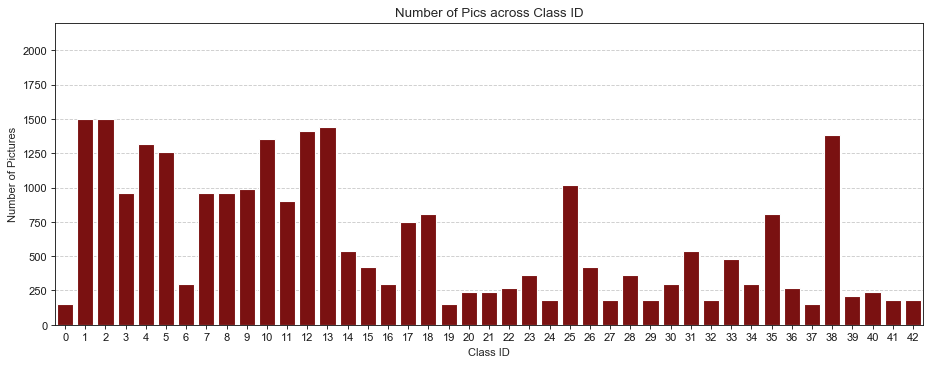

In [18]:
plot_count_labels(overall_train_generator)

Let's take a random sample of 10 images from each class just to get a grasp about the quality of the images.

-------------------------------
Class: 0


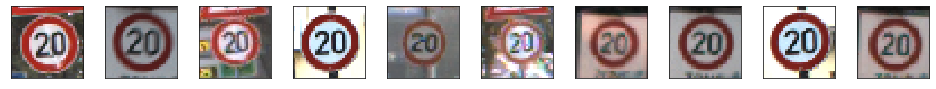

-------------------------------
Class: 1


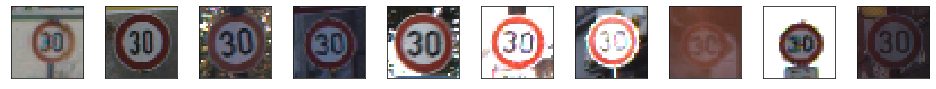

-------------------------------
Class: 2


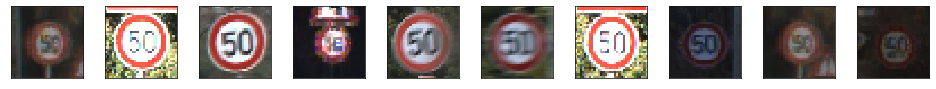

-------------------------------
Class: 3


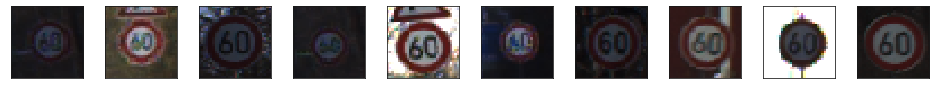

-------------------------------
Class: 4


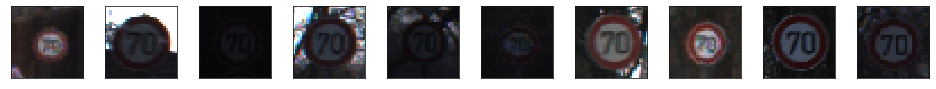

-------------------------------
Class: 5


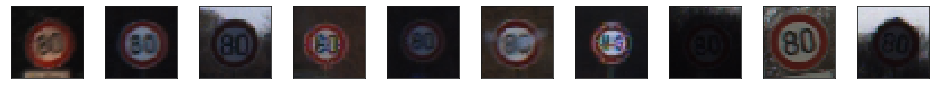

-------------------------------
Class: 6


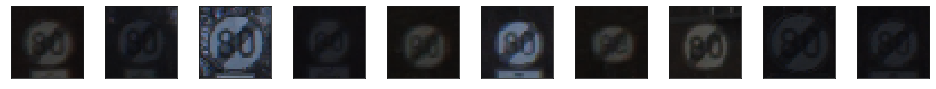

-------------------------------
Class: 7


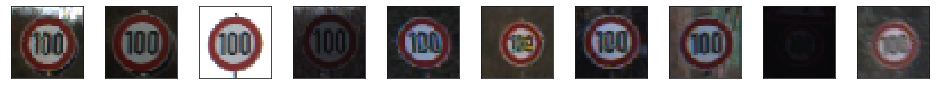

-------------------------------
Class: 8


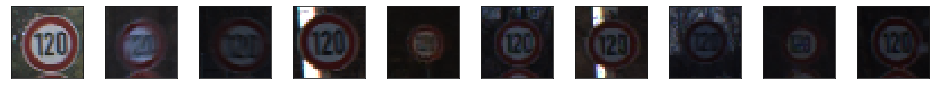

-------------------------------
Class: 9


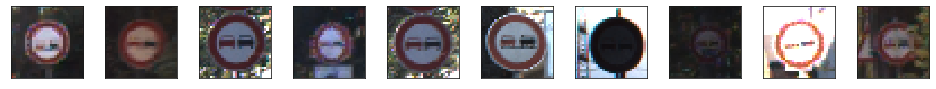

-------------------------------
Class: 10


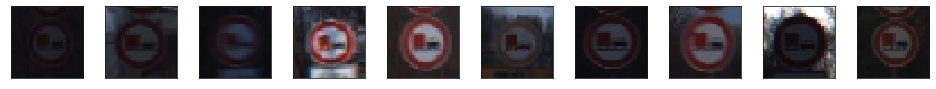

-------------------------------
Class: 11


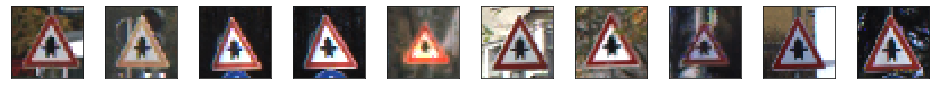

-------------------------------
Class: 12


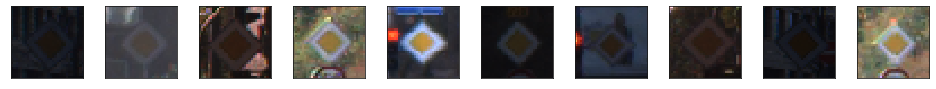

-------------------------------
Class: 13


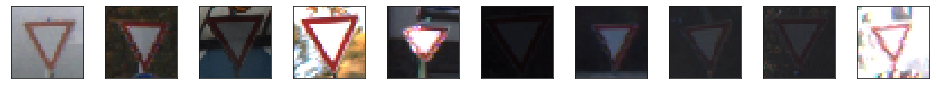

-------------------------------
Class: 14


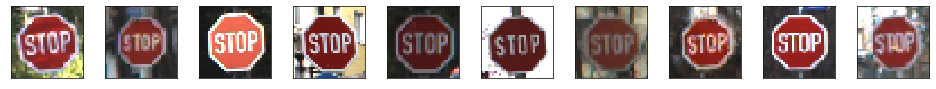

-------------------------------
Class: 15


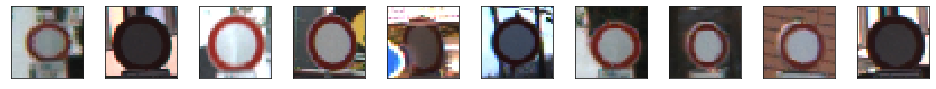

-------------------------------
Class: 16


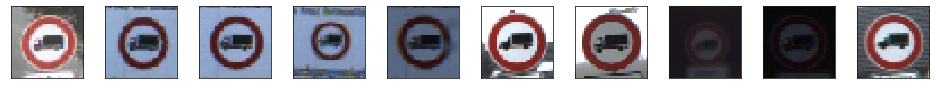

-------------------------------
Class: 17


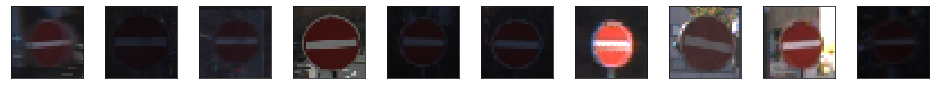

-------------------------------
Class: 18


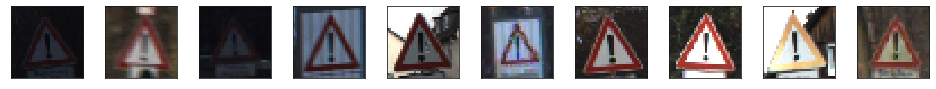

-------------------------------
Class: 19


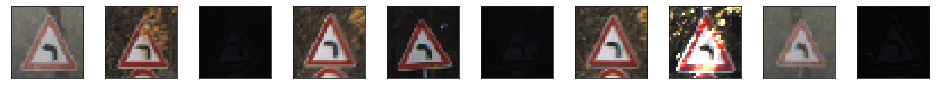

-------------------------------
Class: 20


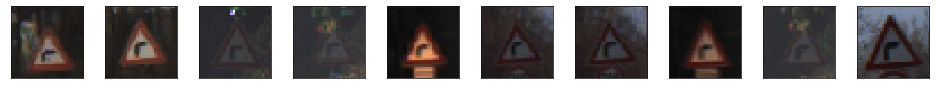

-------------------------------
Class: 21


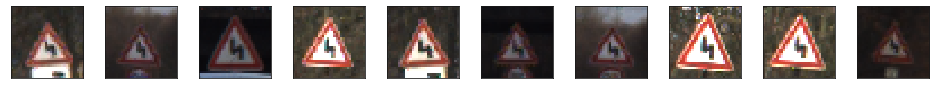

-------------------------------
Class: 22


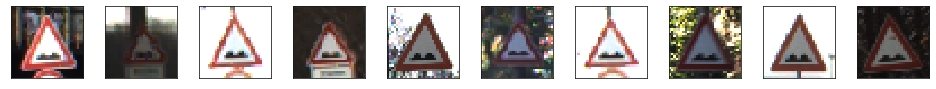

-------------------------------
Class: 23


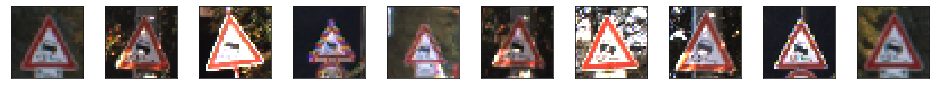

-------------------------------
Class: 24


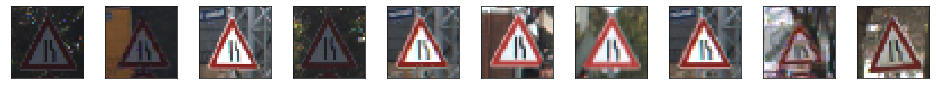

-------------------------------
Class: 25


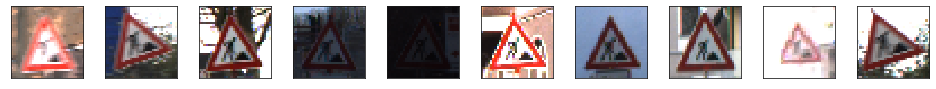

-------------------------------
Class: 26


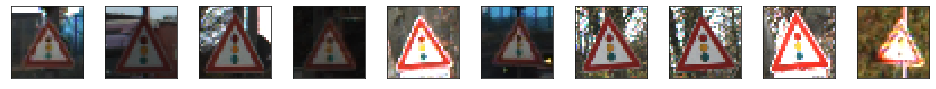

-------------------------------
Class: 27


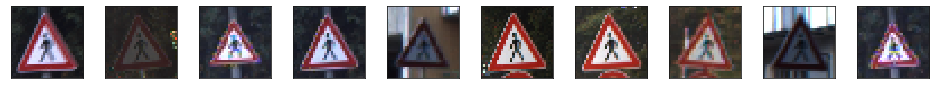

-------------------------------
Class: 28


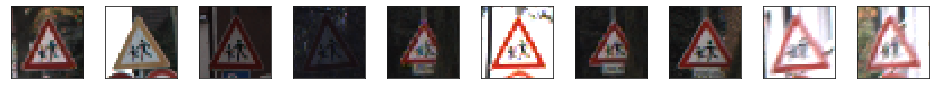

-------------------------------
Class: 29


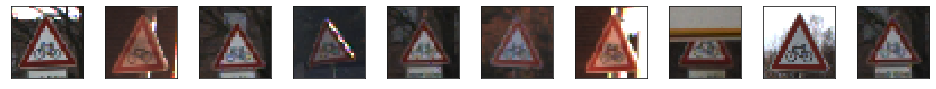

-------------------------------
Class: 30


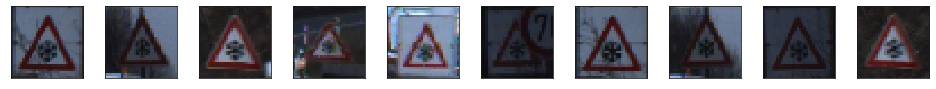

-------------------------------
Class: 31


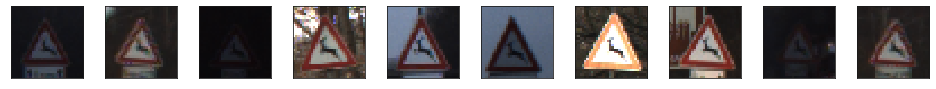

-------------------------------
Class: 32


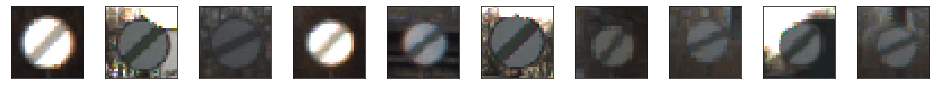

-------------------------------
Class: 33


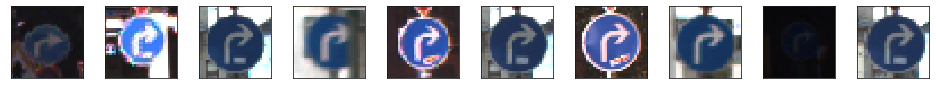

-------------------------------
Class: 34


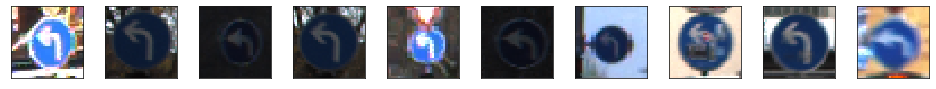

-------------------------------
Class: 35


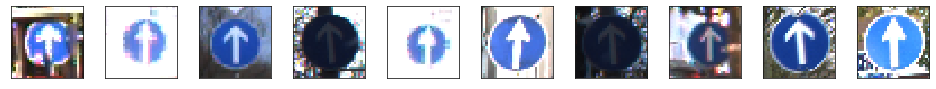

-------------------------------
Class: 36


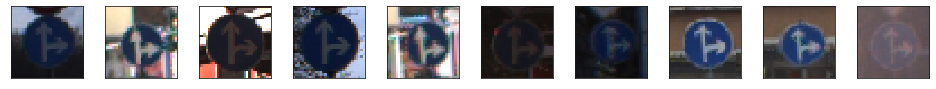

-------------------------------
Class: 37


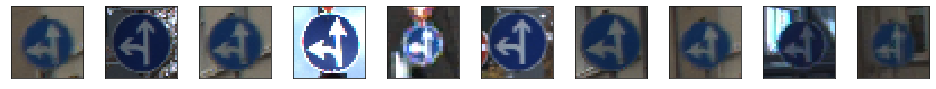

-------------------------------
Class: 38


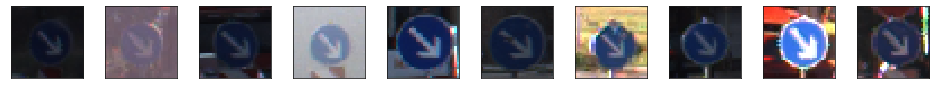

-------------------------------
Class: 39


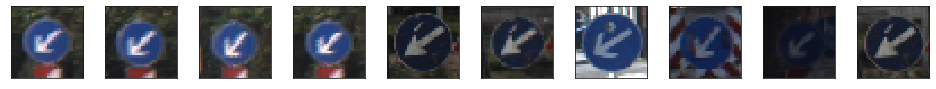

-------------------------------
Class: 40


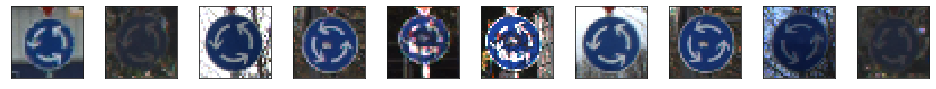

-------------------------------
Class: 41


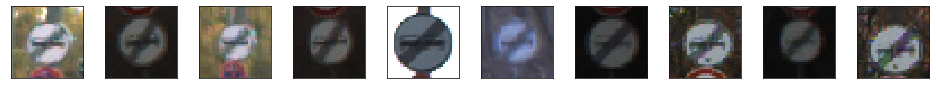

-------------------------------
Class: 42


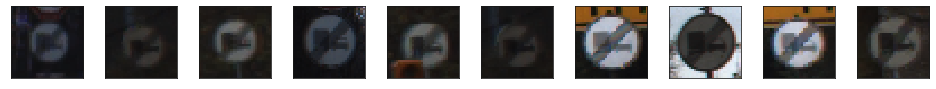

In [19]:
#creates a dictionary whose keys are the classes, the values are lists that are empty for now
examples_classes = {int(i):list() for i in range(43)}

#goes through the images generated and distribute them according to its class, saving the index
#obs. when a list reaches the length of 10 elements, it stops being appended, since we only want to show 10 examples
for idx,label in enumerate(labels):
    img_label = np.where(label == 1)[0][0]
    if len(examples_classes[int(img_label)])<=10:
        examples_classes[int(img_label)].append(idx)

#plots the 10 image examples by class
for img_class in range(43):
    print('-------------------------------')
    print('Class: %i' % (img_class))
    fig = plt.figure(figsize = (13, 1))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        axis.imshow(data[int(examples_classes[img_class][i])])
    plt.show()

<a class="anchor" id="describe-the-data-ki"></a>
<b>Key Insights</b>:
   > <p> <b>Unbalanced Dataset</b> - By plotting the count of images per class, one may conclude this dataset is highly unbalanced. Indeed, while there are two classes that contain 1.500 images, there are several other whose size do not reach the 200 images barrier.</p>
   > <p> <b>Quality of the Images</b> - Within each class, we cand find image either with high brightness either with dark visibility. Another aspect to take into account is that, despite the difference in brightness, the images are not that different whitin each class.</p>

[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="data-preparation"></a>
# 3. Data Preparation

In [20]:
def contrast(img):
    p2, p98 = np.percentile(img, (2, 98))
    img_con = exposure.rescale_intensity(img, in_range = (p2, p98))
    return img_con

def eq_hist(img):
    img_eq = exposure.equalize_hist(img)
    return img_eq

def contrast_eq_hist(img):
    img = contrast(img)
    img_eq = eq_hist(img)
    return img_eq

def grayscale(img):
    img_g = rgb2gray(img)
    return img_g

def adap_eq_hist(img):
    img_eq = exposure.equalize_adapthist(img, clip_limit = 0.02)
    return img_eq

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\ProgramData\Anaconda3\lib\site-packages\skimage\exposure\exposure.py:124: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "
C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to float32
  .format(dtypeobj_in, dtypeobj_out))


<Figure size 936x72 with 0 Axes>

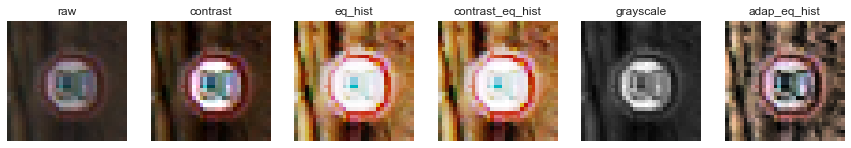

In [21]:
random_index = random.randrange(len(data))
fig = plt.figure(figsize = (13, 1))
fig, ax = plt.subplots(1, 6, figsize = (15, 3))
for axes in ax :
    axes.axis('off')
    
ax[0].imshow(data[random_index])
ax[0].set_title('raw')

ax[1].imshow(contrast(data[random_index]))
ax[1].set_title('contrast')
 
ax[2].imshow(eq_hist(data[random_index]))
ax[2].set_title('eq_hist')
 
ax[3].imshow(contrast_eq_hist(data[random_index]))
ax[3].set_title('contrast_eq_hist')

ax[4].imshow(grayscale(data[random_index]), cmap = plt.cm.gray)
ax[4].set_title('grayscale')

ax[5].imshow(adap_eq_hist(data[random_index]))
ax[5].set_title('adap_eq_hist')

plt.show()

Next we will split the data into training and validation sets stratified for each class.

In [22]:
validation_train_split = 0.2

In [23]:
ref_dir = training_dir[0:len(training_dir) - len(training_dir.split('/')[-1])]

#----------------------------------------------------------------------------------------------------
# gets a list containing all the names of the classes
list_classes = [x[0].split('\\') for x in os.walk(training_dir)][1:]
list_classes = [x[1] for x in list_classes]

#----------------------------------------------------------------------------------------------------
# Store the original raw dataset in a different structure (add one additional folder for each class to enable 
# defining some data generators specific for each class)

fulltraining_dir = ref_dir + 'FullRawTraining'
if(os.path.exists(fulltraining_dir) == False):
    os.mkdir(fulltraining_dir)
        
    for class_n in list_classes:
        folder_1 = fulltraining_dir + '/' + class_n
        if(os.path.exists(folder_1) == False):
            # inside the new folder, it creates the 43 folders (one for each class)
            os.mkdir(folder_1)

        folder_2 = fulltraining_dir + '/' + class_n + '/' + class_n
        if(os.path.exists(folder_2) == False):
            # inside each new folder created above, creates another folder with the same name
            os.mkdir(folder_2)

    # move the images from the raw folder to the new folder
    for class_folder in list_classes:
        source = training_dir + '/' + class_folder
        dest = fulltraining_dir + '/' + class_folder + '/' + class_folder

        files = os.listdir(source)
        for f in files:
            shutil.copy(source + '/' + f, dest)

In [24]:
#----------------------------------------------------------------------------------------------------
# Split the original raw dataset into train and validation sets and store the pictures on the local disk

split_bool = False
rawtraining_dir = ref_dir + 'RawTraining'
if(os.path.exists(rawtraining_dir) == False):
    os.mkdir(rawtraining_dir)
    split_bool = True

    for class_n in list_classes:
        folder_1 = rawtraining_dir + '/' + class_n
        if(os.path.exists(folder_1) == False):
            # inside the new folder, it creates the 43 folders (one for each class)
            os.mkdir(folder_1)

        folder_2 = rawtraining_dir + '/' + class_n + '/' + class_n
        if(os.path.exists(folder_2) == False):
            # inside each new folder created above, creates another folder with the same name
            os.mkdir(folder_2)

        
rawvalidation_dir = ref_dir + 'RawValidation'
if(os.path.exists(rawvalidation_dir) == False):
    os.mkdir(rawvalidation_dir)
    split_bool = True
    
    for class_n in list_classes:
        folder_1 = rawvalidation_dir + '/' + class_n
        if(os.path.exists(folder_1) == False):
            # inside the new folder, it creates the 43 folders (one for each class)
            os.mkdir(folder_1)
            
        folder_2 = rawvalidation_dir + '/' + class_n + '/' + class_n
        if(os.path.exists(folder_2) == False):
            # inside each new folder created above, creates another folder with the same name
            os.mkdir(folder_2)
        
if(split_bool):
    image_count = dict((x, list(overall_train_generator.classes).count(x)) for x in set(overall_train_generator.classes))
    idx = 0
    for class_folder in list_classes:
        class_train_data_generator =  ImageDataGenerator(validation_split = validation_train_split)
        import_dir = fulltraining_dir + '/' + class_folder

        # build the generators
        export_dir = rawtraining_dir + '/' + class_folder + '/' + class_folder
        class_train_generator = class_train_data_generator.flow_from_directory(\
                                                       import_dir,\
                                                       target_size = (img_width, img_height),\
                                                       batch_size = image_count.get(idx),\
                                                       color_mode = 'rgb',\
                                                       class_mode = 'categorical',\
                                                       subset = 'training',\
                                                       save_to_dir = export_dir)
        data_train, labels_train = class_train_generator.next()

        export_dir = rawvalidation_dir + '/' + class_folder + '/' + class_folder
        class_validation_generator = class_train_data_generator.flow_from_directory(\
                                                       import_dir,\
                                                       target_size = (img_width, img_height),\
                                                       batch_size = image_count.get(idx),\
                                                       color_mode = 'rgb',\
                                                       class_mode = 'categorical',\
                                                       subset = 'validation',\
                                                       save_to_dir = export_dir)
        data_validation, labels_validation = class_validation_generator.next()
        idx = idx + 1

In [25]:
train_data_generator =  ImageDataGenerator(#rescale = 1./255, \
                                           samplewise_center = True,\
                                           samplewise_std_normalization = True\
                                          )

train_generator = train_data_generator.flow_from_directory(\
                                               rawtraining_dir,\
                                               target_size = (img_width, img_height),\
                                               batch_size = batch_size,\
                                               color_mode = 'rgb',\
                                               class_mode = 'categorical',\
                                               shuffle = True)

validation_data_generator =  ImageDataGenerator(#rescale = 1./255, \
                                           samplewise_center = True,\
                                           samplewise_std_normalization = True\
                                          )
validation_generator = validation_data_generator.flow_from_directory(\
                                               rawvalidation_dir,\
                                               target_size = (img_width, img_height),\
                                               batch_size = batch_size,\
                                               color_mode = 'rgb',\
                                               class_mode = 'categorical',\
                                               shuffle = True)

Found 21312 images belonging to 43 classes.
Found 5328 images belonging to 43 classes.


In [26]:
test_data_generator =  ImageDataGenerator(##rescale = 1./255, \
                                           samplewise_center = True,\
                                           samplewise_std_normalization = True\
                                          )

test_generator = test_data_generator.flow_from_directory(\
                                               test_dir,\
                                               target_size = (img_width, img_height),
                                               batch_size = batch_size,\
                                               color_mode = 'rgb',\
                                               class_mode = 'categorical',\
                                               shuffle = False)

Found 12569 images belonging to 43 classes.


Since one of identified challenges for this dataset was how unbalanced it was and the similarity of images within each class, we will perform the Data Augmentation not only to increase the variability of the pictures but also to level the count of images across classes.

In [27]:
target_images_class = 1500

In [28]:
augtrain_dir = ref_dir + '/Training_Augmented'

if(os.path.exists(augtrain_dir) == False):
    os.mkdir(augtrain_dir)

    for class_n in list_classes:
        folder_1 = augtrain_dir + '/' + class_n
        if(os.path.exists(folder_1) == False):
            # inside the new folder, it creates the 43 folders (one for each class)
            os.mkdir(folder_1)

        folder_2 = augtrain_dir + '/' + class_n + '/' + class_n
        if(os.path.exists(folder_2) == False):
            # inside each new folder created above, creates another folder with the same name
            os.mkdir(folder_2)
            
    # move the images from the raw folder to the new folder
    for class_folder in list_classes:
        source = rawtraining_dir + '/' + class_folder + '/' + class_folder
        dest = augtrain_dir + '/' + class_folder + '/' + class_folder

        files = os.listdir(source)
        for f in files:
            shutil.copy(source + '/' + f, dest)       
            
    # perform the data augmentation 
    image_count = dict((x, list(train_generator.classes).count(x)) for x in set(train_generator.classes))    
    idx = 0
    for class_folder in list_classes:
        n_batches = math.floor((target_images_class - image_count.get(idx)) / 50)
        
        aug_class_train_data_generator =  ImageDataGenerator(\
                                                             rotation_range = 10,\
                                                             width_shift_range = 0.2,\
                                                             height_shift_range = 0.2,\
                                                             shear_range = 0.2,\
                                                             zoom_range = 0.2,\
                                                             horizontal_flip = False,\
                                                             fill_mode = 'nearest')
        import_dir = fulltraining_dir + '/' + class_folder

        # build the generators
        export_dir = augtrain_dir + '/' + class_folder + '/' + class_folder
        aug_class_train_generator = aug_class_train_data_generator.flow_from_directory(\
                                                       import_dir,\
                                                       target_size = (img_width, img_height),\
                                                       batch_size = 50,\
                                                       color_mode = 'rgb',\
                                                       class_mode = 'categorical',\
                                                       save_to_dir = export_dir)
        for i in range(n_batches):
            data_augtrain, labels_augtrain = aug_class_train_generator.next()
        idx = idx + 1            


In [29]:
AUGtrain_data_generator =  ImageDataGenerator(#rescale = 1./255, \
                                           samplewise_center = True,\
                                           samplewise_std_normalization = True\
                                          )

AUGtrain_generator = AUGtrain_data_generator.flow_from_directory(\
                                               augtrain_dir,\
                                               target_size = (img_width, img_height),\
                                               batch_size = batch_size,\
                                               color_mode = 'rgb',\
                                               class_mode = 'categorical',\
                                               shuffle = True)

Found 61902 images belonging to 43 classes.


Let's check the result of the data augmentation in terms of class balance.

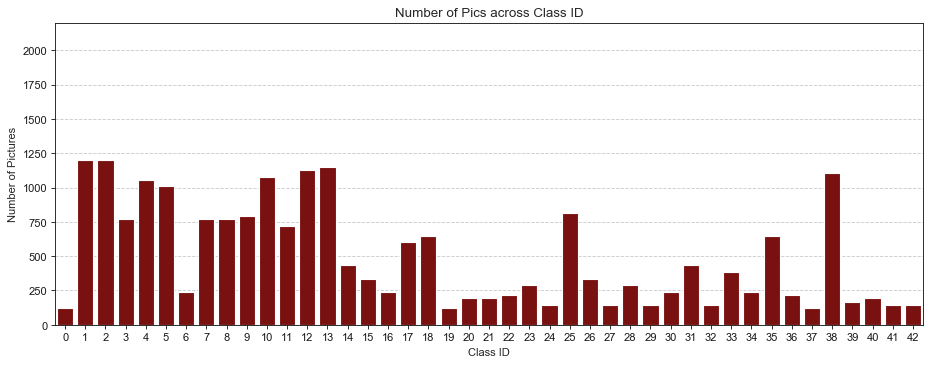

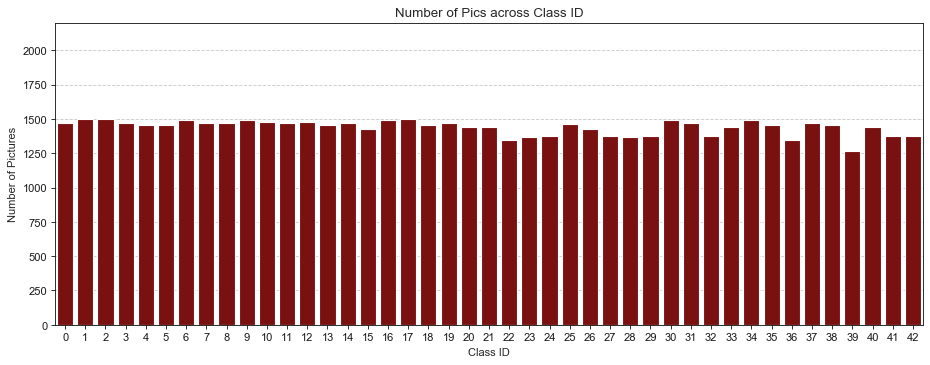

In [30]:
# compare the picture count with and without data augmentation for the training
plot_count_labels(train_generator)
plot_count_labels(AUGtrain_generator)

[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="modelling"></a>
# 4. Modelling

<u>Bool Variables</u>: The variables defined on the next cell and used throughout the model building process have the purpose described below:
    
   - `CM_plot`: wether to plot the confusion matrix when doing the model assessment  (please note that this is a large plot  due to the many different classes we have in our dataset) 
   - `test_LR`: wether to test and compare the results on a plot about the different combinations of initial learning rate and optimizers (<u>please note that this is a very time-consuming task!</u>)

In [187]:
CM_plot = True
test_LR = False

In [32]:
# build some list to append the model metrics (for model comparison afterwards)
model_cmp_name = []
model_cmp_accuracy_train = []
model_cmp_accuracy_validation = []
model_cmp_accuracy_test = []
model_cmp_precision_train = []
model_cmp_precision_validation = []
model_cmp_precision_test = []
model_cmp_recall_train = []
model_cmp_recall_validation = []
model_cmp_recall_test = []
model_cmp_train_elapsedtime_min = []
model_cmp_trainable_params = []
model_cmp_nontrainable_params = []

<a class="anchor" id="modelling-from-scratch"></a>
### 4.1: From scratch

<b>Approach</b>: We decided to approach the models developed by us by starting with a simple model and then build new ones in an incremental fashion which means introducing new elements on the architecture of the CNN, one at a time, for additional complexity (e.g. add new hidden layers) and test its impact by computing some metrics on the validation and test sets (overall accuracy, precision and recall).

For every model, we always tested different combination of optimizers, initial learning rate and the learning rate change schema to be used with the optimizers, so we could get a grasp on the best performing result for each model. We also decided to start with the original dataset only applying sample wise center and standard deviation.

The decision to stop the training of the models was based on the number of epochs where the validation loss did not decrease more than a certain threshold for a specific number of epochs, implemented trough the keras.callbacks.EarlyStopping callback.


<b>Note</b>: We did some experimentation around the batch size, but in the end, we choose a value of 256 so we could avoid overfit before computing one epoch for the simpler models we have developed.

<a class="anchor" id="modelling-simplified"></a>
#### 4.1.1: Simplified  (Conv: 2 Conv2d layer | Classifier: 1 Dense layer)

<b>Architecture</b>: After some experimentations, we decided to start with a model that despite its simplicity allowed us to get some results that were not so bad as well. So, for the simplified model we used 2 convolutional layers (the first with 32 filters and the second with 64 filters) and only one dense layer as a classifier with 1024 units.





In [179]:
# define the network architecture

# convolutional section
model_Conv2D_filters = [32, 64]
model_Conv2D_kernelsize = [5, 5]
model_Conv2D_strides = [1, 1]
model_Conv2D_activation = ['relu', 'relu'] # 'relu', 'tanh'
model_Conv2D_padding = ['same', 'same'] # 'valid', 'same'
model_Conv2D_normalization = False

model_MaxPooling2D_size = [2, 2]

model_dropout2D_rate = [0, 0]

# mlp section
model_MLP_units = [1024]
model_MLP_activation = ['relu']
model_MLP_dropout_rate = [0]

epochs_lr_decay = 3

In [180]:
model_name = 'SimplifiedModel'

So let's start to test some optimizers and their learning rate ...

In [181]:
# optimizers + learning rate definitions
if(test_LR):
    epochs_max = 10

    optimizer_list = ['SGD', 'SGD', 'SGD',\
                      'Adam', 'Adam', 'Adam'] # 'RMSprop', 'Adam', 'SGD'

    lr_init_list = [0.002, 0.02, 0.1,\
                    0.00012, 0.0012, 0.012]

    lr_decay_list = ['constant', 'constant', 'constant',\
                     'constant', 'constant', 'constant'] # 'exponential', 'step_decay', 'constant'

    N_steps_lr_decay = 3 # only for applicable for step_decay

Model: "SimplifiedModel_testOptmLr_0"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_0 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_0 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_0 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_0 (Dense)              (None, 10

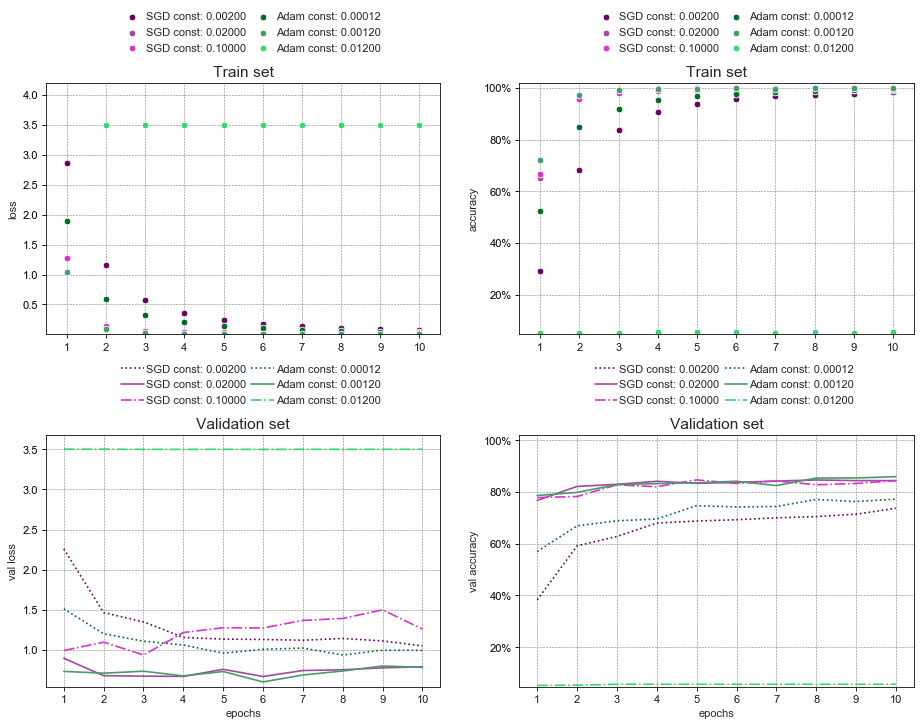

In [182]:
# test the optmizers + learning rate
if(test_LR):
    fig_OptmLR = f_TestOptimizersLR_CNN(selected_device, \
                    train_generator, validation_generator,\
                    epochs_max, batch_size, model_name,\
                    model_Conv2D_filters, model_Conv2D_kernelsize, model_Conv2D_strides, model_Conv2D_activation,\
                    model_Conv2D_padding, model_Conv2D_normalization, model_MaxPooling2D_size, model_dropout2D_rate,\
                    model_MLP_units, model_MLP_activation, model_MLP_dropout_rate,\
                    lr_init_list, lr_decay_list, N_steps_lr_decay, optimizer_list, 0)

    plt.show(fig_OptmLR)

In [37]:
# optimizers + learning rate definitions
epochs_max = 60

lr_init = 0.02
lr_decay = 'constant'
optimizer = 'SGD'

In [38]:
# auto-stop criteria
stop_delta =  0.001
stop_patience = 10

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "SimplifiedModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_0 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_0 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_0 (Flatten)          (None, 4096)              0         

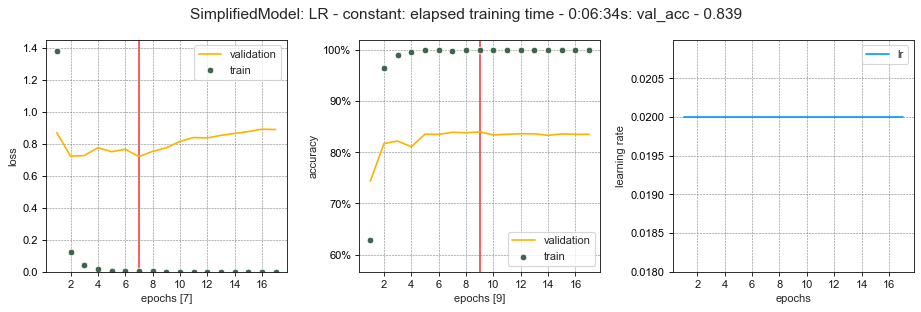

In [39]:
# train the model
fig_CNN, train_elapsedtime, trainable_params, nontrainable_params = f_train_CNN(selected_device, \
                train_generator, validation_generator,\
                epochs_max, batch_size, model_name,\
                model_Conv2D_filters, model_Conv2D_kernelsize, model_Conv2D_strides, model_Conv2D_activation,\
                model_Conv2D_padding, model_Conv2D_normalization, model_MaxPooling2D_size, model_dropout2D_rate,\
                model_MLP_units, model_MLP_activation, model_MLP_dropout_rate, lr_init, lr_decay, epochs_lr_decay, \
                optimizer, stop_delta, stop_patience, 0, 1)
plt.show(fig_CNN)

if(model_name in model_cmp_name):
    idx = model_cmp_name.index(model_name)
    model_cmp_name[idx] = model_name
    model_cmp_train_elapsedtime_min[idx] = (train_elapsedtime / 60)
    model_cmp_trainable_params[idx] = trainable_params
    model_cmp_nontrainable_params[idx] = nontrainable_params
    
else:
    model_cmp_name.append(model_name)
    model_cmp_train_elapsedtime_min.append((train_elapsedtime / 60))
    model_cmp_trainable_params.append(trainable_params)
    model_cmp_nontrainable_params.append(nontrainable_params)

Found 21312 images belonging to 43 classes.
Found 5328 images belonging to 43 classes.
Found 12569 images belonging to 43 classes.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor

acc train: 0.9997

acc validation: 0.8392

acc test: 0.8832


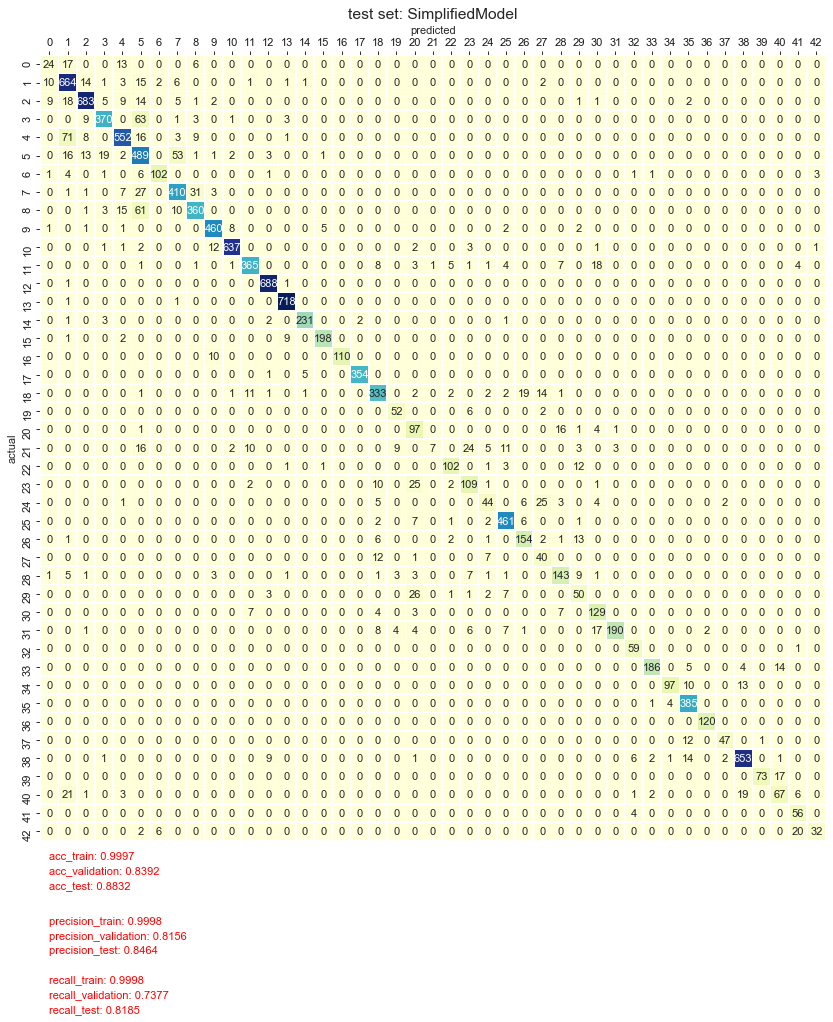

In [40]:
# calculate some metrics and plot the confusion matrix
fig_CNN_CM, accuracy_train, accuracy_validation, accuracy_test,\
precision_train, precision_validation, precision_test,\
recall_train, recall_validation, recall_test = f_CM_CNN(rawtraining_dir, train_data_generator, train_generator.n,\
                                                rawvalidation_dir, validation_data_generator, validation_generator.n,\
                                                test_dir, test_data_generator, test_generator.n, batch_size,\
                                                model_name,\
                                                img_width, img_height, 'test', False, CM_plot)
if(CM_plot):
    plt.show(fig_CNN_CM)

idx = model_cmp_name.index(model_name)
if((idx + 1) > len(model_cmp_accuracy_train)):
    model_cmp_accuracy_train.append(accuracy_train)
    model_cmp_accuracy_validation.append(accuracy_validation)
    model_cmp_accuracy_test.append(accuracy_test)
    model_cmp_precision_train.append(precision_train)
    model_cmp_precision_validation.append(precision_validation)
    model_cmp_precision_test.append(precision_test)
    model_cmp_recall_train.append(recall_train)
    model_cmp_recall_validation.append(recall_validation)
    model_cmp_recall_test.append(recall_test) 
else:
    model_cmp_accuracy_train[idx] = accuracy_train
    model_cmp_accuracy_validation[idx] = accuracy_validation
    model_cmp_accuracy_test[idx] = accuracy_test
    model_cmp_precision_train[idx] = precision_train
    model_cmp_precision_validation[idx] = precision_validation
    model_cmp_precision_test[idx] = precision_test
    model_cmp_recall_train[idx] = recall_train
    model_cmp_recall_validation[idx] = recall_validation
    model_cmp_recall_test[idx] = recall_test

<a class="anchor" id="modelling-simplified-ki"></a>
<b>Key Insights</b>:
   > <p>Looking at the loss progress with the epochs we can observe that roughly after the 7th epoch the loss starts to grow which is an indication of overfitting.</p>

[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="modelling-batchnorm"></a>
#### 4.1.2: Add  Batch Normalization (Conv: 2 Conv2d layer + Batchnorm | Classifier: 1 Dense layer)

Our next move was to add batch normalization layers in the convolution section of the network. Since this a relatively new layer, we did some research about how to use it. Based on the work developed by (<a href='https://arxiv.org/abs/1805.11604'>Santurkar et.al, 2019</a>) and also inspired on the implementation used on the <a href='https://keras.io/applications/#inceptionresnetv2'>Inception-ResNet V2</a> pre-trained model, we implemented this layer before the non-linearity for the respective convolutional layer.

In [41]:
# define the network architecture
model_Conv2D_normalization = True

In [42]:
model_name = 'SimplifiedModel_BatchNorm'

Again let's start to test some optimizers and their learning rate ...

In [43]:
# optimizers + learning rate definitions
if(test_LR):
    epochs_max = 15

    optimizer_list = ['SGD', 'SGD', 'SGD',\
                      'Adam', 'Adam', 'Adam'] # 'RMSprop', 'Adam', 'SGD'

    lr_init_list = [0.002, 0.02, 0.1,\
                    0.00012, 0.0012, 0.012]

    lr_decay_list = ['constant', 'constant', 'constant',\
                     'constant', 'constant', 'constant'] # 'exponential', 'step_decay', 'constant'

    N_steps_lr_decay = 3 # only for applicable for step_decay

In [44]:
# test the optmizers + learning rate
if(test_LR):
    fig_OptmLR = f_TestOptimizersLR_CNN(selected_device, \
                    train_generator, validation_generator,\
                    epochs_max, batch_size, model_name,\
                    model_Conv2D_filters, model_Conv2D_kernelsize, model_Conv2D_strides, model_Conv2D_activation,\
                    model_Conv2D_padding, model_Conv2D_normalization, model_MaxPooling2D_size, model_dropout2D_rate,\
                    model_MLP_units, model_MLP_activation, model_MLP_dropout_rate,\
                    lr_init_list, lr_decay_list, N_steps_lr_decay, optimizer_list, 0)

    plt.show(fig_OptmLR)

In [45]:
# optimizers + learning rate definitions
epochs_max = 140

lr_init = 0.02
lr_decay = 'constant'
optimizer = 'SGD'

In [46]:
# auto-stop criteria
stop_delta =  0.001
stop_patience = 20

Model: "SimplifiedModel_BatchNorm"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_0 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
batch_normalization_0 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_0 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_0 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 1

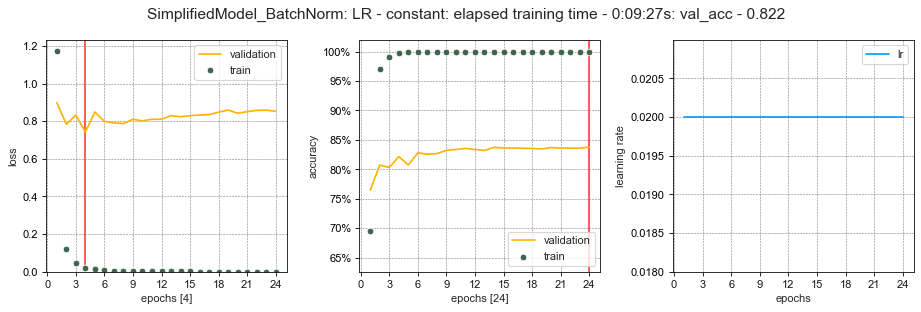

In [47]:
# train the model
fig_CNN, train_elapsedtime, trainable_params, nontrainable_params = f_train_CNN(selected_device, \
                train_generator, validation_generator,\
                epochs_max, batch_size, model_name,\
                model_Conv2D_filters, model_Conv2D_kernelsize, model_Conv2D_strides, model_Conv2D_activation,\
                model_Conv2D_padding, model_Conv2D_normalization, model_MaxPooling2D_size, model_dropout2D_rate,\
                model_MLP_units, model_MLP_activation, model_MLP_dropout_rate, lr_init, lr_decay, epochs_lr_decay, \
                optimizer, stop_delta, stop_patience, 0, 1)
plt.show(fig_CNN)

if(model_name in model_cmp_name):
    idx = model_cmp_name.index(model_name)
    model_cmp_name[idx] = model_name
    model_cmp_train_elapsedtime_min[idx] = (train_elapsedtime / 60)
    model_cmp_trainable_params[idx] = trainable_params
    model_cmp_nontrainable_params[idx] = nontrainable_params
    
else:
    model_cmp_name.append(model_name)
    model_cmp_train_elapsedtime_min.append((train_elapsedtime / 60))
    model_cmp_trainable_params.append(trainable_params)
    model_cmp_nontrainable_params.append(nontrainable_params)

Found 21312 images belonging to 43 classes.
Found 5328 images belonging to 43 classes.
Found 12569 images belonging to 43 classes.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor

acc train: 0.9994

acc validation: 0.8217

acc test: 0.8793


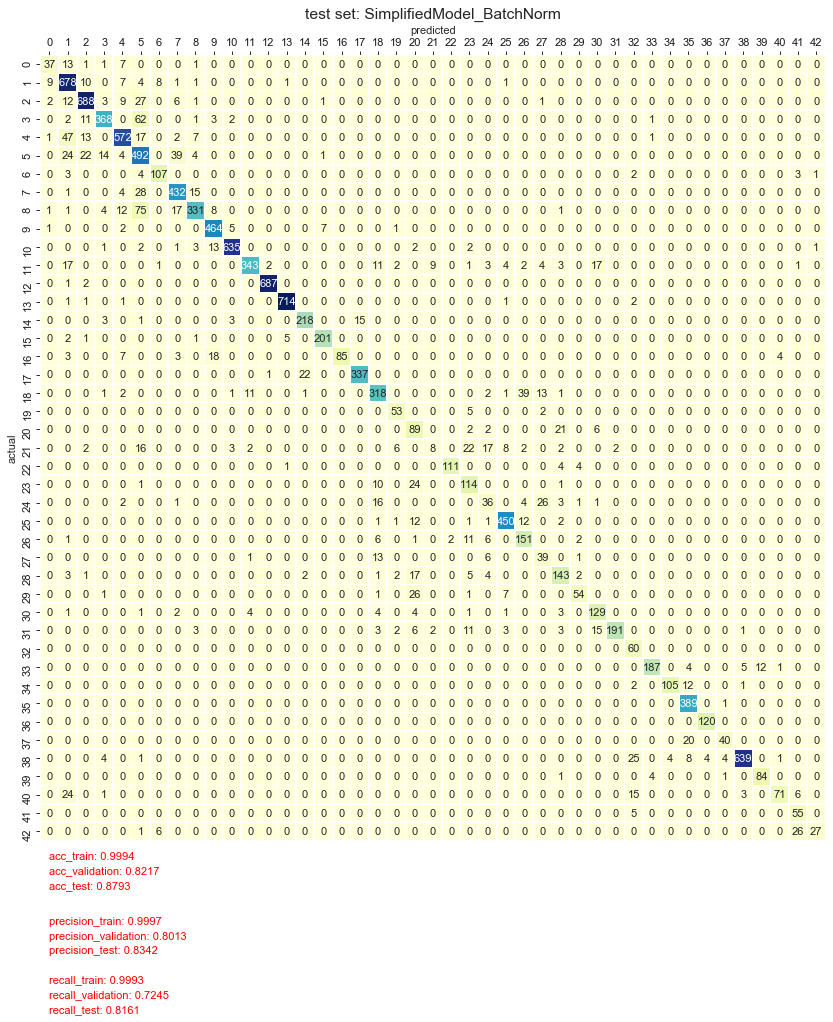

In [48]:
# calculate some metrics and plot the confusion matrix
fig_CNN_CM, accuracy_train, accuracy_validation, accuracy_test,\
precision_train, precision_validation, precision_test,\
recall_train, recall_validation, recall_test = f_CM_CNN(rawtraining_dir, train_data_generator, train_generator.n,\
                                                rawvalidation_dir, validation_data_generator, validation_generator.n,\
                                                test_dir, test_data_generator, test_generator.n, batch_size,\
                                                model_name,\
                                                img_width, img_height, 'test', False, CM_plot)
if(CM_plot):
    plt.show(fig_CNN_CM)

idx = model_cmp_name.index(model_name)
if((idx + 1) > len(model_cmp_accuracy_train)):
    model_cmp_accuracy_train.append(accuracy_train)
    model_cmp_accuracy_validation.append(accuracy_validation)
    model_cmp_accuracy_test.append(accuracy_test)
    model_cmp_precision_train.append(precision_train)
    model_cmp_precision_validation.append(precision_validation)
    model_cmp_precision_test.append(precision_test)
    model_cmp_recall_train.append(recall_train)
    model_cmp_recall_validation.append(recall_validation)
    model_cmp_recall_test.append(recall_test) 
else:
    model_cmp_accuracy_train[idx] = accuracy_train
    model_cmp_accuracy_validation[idx] = accuracy_validation
    model_cmp_accuracy_test[idx] = accuracy_test
    model_cmp_precision_train[idx] = precision_train
    model_cmp_precision_validation[idx] = precision_validation
    model_cmp_precision_test[idx] = precision_test
    model_cmp_recall_train[idx] = recall_train
    model_cmp_recall_validation[idx] = recall_validation
    model_cmp_recall_test[idx] = recall_test

<a class="anchor" id="modelling-batchnorm-ki"></a>
<b>Key Insights</b>:
   > <p>Although the metrics did not improve, it is possible to observe that the loss did not increase so much after its minimum value. One of the things that we could clearly observe was the increase of robustness of the model to different settings of hyperparameters namely the initial learning rate as the interval of possible values is higher now.</p>

[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="modelling-convdropout"></a>
#### 4.1.3: Add Dropout in Convolutional (Conv: 2 Conv2d layer + Dropout | Classifier: 1 Dense layer)

We wanted to test also the dropout on the convolutional section of the network, however, since this type of layer acts as a normalization, we decided to test it separately from the batch normalization first and only then combine them to see the impacts on the results. For this purpose, we added the spatial dropout layers after the max pooling .

In [49]:
# define the network architecture
model_Conv2D_normalization = False
model_dropout2D_rate = [0.3, 0.4]

In [50]:
model_name = 'AddConvDropout'

Again let's start to test some optimizers and their learning rate ...

In [51]:
# optimizers + learning rate definitions
if(test_LR):
    epochs_max = 15

    optimizer_list = ['SGD', 'SGD', 'SGD',\
                      'Adam', 'Adam', 'Adam'] # 'RMSprop', 'Adam', 'SGD'

    lr_init_list = [0.002, 0.02, 0.1,\
                    0.00012, 0.0012, 0.012]

    lr_decay_list = ['constant', 'constant', 'constant',\
                     'constant', 'constant', 'constant'] # 'exponential', 'step_decay', 'constant'

    N_steps_lr_decay = 3 # only for applicable for step_decay

In [52]:
# test the optmizers + learning rate
if(test_LR):
    fig_OptmLR = f_TestOptimizersLR_CNN(selected_device, \
                    train_generator, validation_generator,\
                    epochs_max, batch_size, model_name,\
                    model_Conv2D_filters, model_Conv2D_kernelsize, model_Conv2D_strides, model_Conv2D_activation,\
                    model_Conv2D_padding, model_Conv2D_normalization, model_MaxPooling2D_size, model_dropout2D_rate,\
                    model_MLP_units, model_MLP_activation, model_MLP_dropout_rate,\
                    lr_init_list, lr_decay_list, N_steps_lr_decay, optimizer_list, 0)

    plt.show(fig_OptmLR)

In [53]:
# optimizers + learning rate definitions
epochs_max = 60

lr_init = 0.02
epochs_lr_decay = 3
lr_decay = 'constant'
optimizer = 'SGD'

In [54]:
# auto-stop criteria
stop_delta =  0.001
stop_patience = 15

Model: "AddConvDropout"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_0 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_0 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
spatial_dropout2d_0 (Spatial (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
spatial_dropout2d_1 (Spatial (None, 8, 8, 64)       

83/84 [============================>.] - ETA: 0s - loss: 0.0119 - acc: 0.9962
Epoch 00019: val_loss did not improve from 0.48536
84/84 [==============================] - 22s 267ms/step - loss: 0.0119 - acc: 0.9962 - val_loss: 0.5456 - val_acc: 0.8925

Epoch 00020: LearningRateScheduler reducing learning rate to 0.019999999552965164.
Epoch 20/60
83/84 [============================>.] - ETA: 0s - loss: 0.0092 - acc: 0.9976
Epoch 00020: val_loss did not improve from 0.48536
84/84 [==============================] - 23s 271ms/step - loss: 0.0091 - acc: 0.9977 - val_loss: 0.5726 - val_acc: 0.8983
elapsed time: 0:07:43


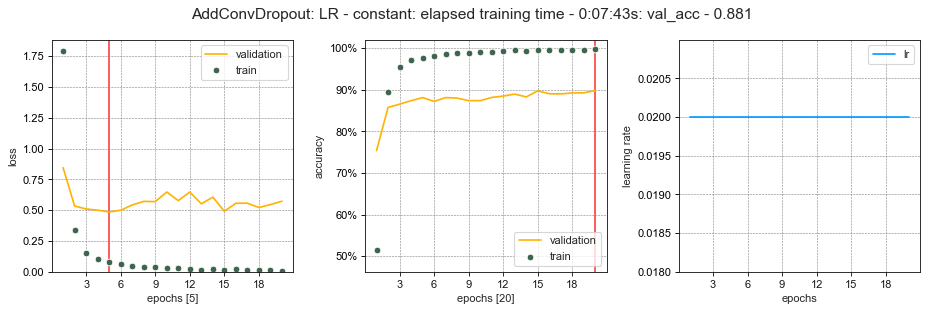

In [55]:
# train the model
fig_CNN, train_elapsedtime, trainable_params, nontrainable_params = f_train_CNN(selected_device, \
                train_generator, validation_generator,\
                epochs_max, batch_size, model_name,\
                model_Conv2D_filters, model_Conv2D_kernelsize, model_Conv2D_strides, model_Conv2D_activation,\
                model_Conv2D_padding, model_Conv2D_normalization, model_MaxPooling2D_size, model_dropout2D_rate,\
                model_MLP_units, model_MLP_activation, model_MLP_dropout_rate, lr_init, lr_decay, epochs_lr_decay, \
                optimizer, stop_delta, stop_patience, 0, 1)
plt.show(fig_CNN)

if(model_name in model_cmp_name):
    idx = model_cmp_name.index(model_name)
    model_cmp_name[idx] = model_name
    model_cmp_train_elapsedtime_min[idx] = (train_elapsedtime / 60)
    model_cmp_trainable_params[idx] = trainable_params
    model_cmp_nontrainable_params[idx] = nontrainable_params
    
else:
    model_cmp_name.append(model_name)
    model_cmp_train_elapsedtime_min.append((train_elapsedtime / 60))
    model_cmp_trainable_params.append(trainable_params)
    model_cmp_nontrainable_params.append(nontrainable_params)

Found 21312 images belonging to 43 classes.
Found 5328 images belonging to 43 classes.
Found 12569 images belonging to 43 classes.

acc train: 0.9953

acc validation: 0.8810

acc test: 0.9109


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


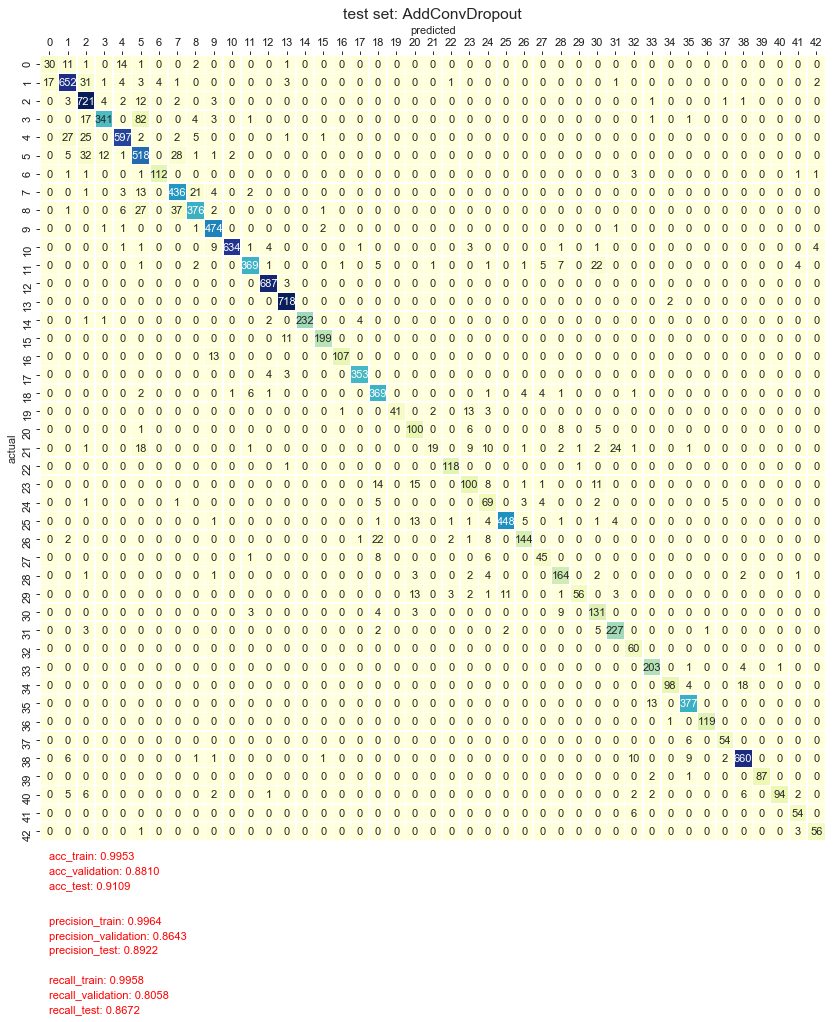

In [56]:
# calculate some metrics and plot the confusion matrix
fig_CNN_CM, accuracy_train, accuracy_validation, accuracy_test,\
precision_train, precision_validation, precision_test,\
recall_train, recall_validation, recall_test = f_CM_CNN(rawtraining_dir, train_data_generator, train_generator.n,\
                                                rawvalidation_dir, validation_data_generator, validation_generator.n,\
                                                test_dir, test_data_generator, test_generator.n, batch_size,\
                                                model_name,\
                                                img_width, img_height, 'test', False, CM_plot)
if(CM_plot):
    plt.show(fig_CNN_CM)

idx = model_cmp_name.index(model_name)
if((idx + 1) > len(model_cmp_accuracy_train)):
    model_cmp_accuracy_train.append(accuracy_train)
    model_cmp_accuracy_validation.append(accuracy_validation)
    model_cmp_accuracy_test.append(accuracy_test)
    model_cmp_precision_train.append(precision_train)
    model_cmp_precision_validation.append(precision_validation)
    model_cmp_precision_test.append(precision_test)
    model_cmp_recall_train.append(recall_train)
    model_cmp_recall_validation.append(recall_validation)
    model_cmp_recall_test.append(recall_test) 
else:
    model_cmp_accuracy_train[idx] = accuracy_train
    model_cmp_accuracy_validation[idx] = accuracy_validation
    model_cmp_accuracy_test[idx] = accuracy_test
    model_cmp_precision_train[idx] = precision_train
    model_cmp_precision_validation[idx] = precision_validation
    model_cmp_precision_test[idx] = precision_test
    model_cmp_recall_train[idx] = recall_train
    model_cmp_recall_validation[idx] = recall_validation
    model_cmp_recall_test[idx] = recall_test

<a class="anchor" id="modelling-convdropout-ki"></a>
<b>Key Insights</b>:
   > <p>We could observe a much less overfit effect on the loss evolution with the epochs as well as some improvements on the metrics.</p>

[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="modelling-dropout-all"></a>
#### 4.1.4: Add Dropout in Classifier (Conv: 2 Conv2d layer + Dropout | Classifier: 1 Dense layer + dropout)

From the previous mode we added the dropout layers on the MLP section of the network.

In [57]:
# define the network architecture
model_MLP_dropout_rate = [0.5]

In [58]:
model_name = 'AddMLPDropout'

Again let's start to test some optimizers and their learning rate ...

In [59]:
# optimizers + learning rate definitions
if(test_LR):
    epochs_max = 15

    optimizer_list = ['SGD', 'SGD', 'SGD',\
                      'Adam', 'Adam', 'Adam'] # 'RMSprop', 'Adam', 'SGD'

    lr_init_list = [0.002, 0.02, 0.1,\
                    0.00012, 0.0012, 0.012]

    lr_decay_list = ['constant', 'constant', 'constant',\
                     'constant', 'constant', 'constant'] # 'exponential', 'step_decay', 'constant'

    N_steps_lr_decay = 3 # only for applicable for step_decay

In [60]:
# test the optmizers + learning rate
if(test_LR):
    fig_OptmLR = f_TestOptimizersLR_CNN(selected_device, \
                    train_generator, validation_generator,\
                    epochs_max, batch_size, model_name,\
                    model_Conv2D_filters, model_Conv2D_kernelsize, model_Conv2D_strides, model_Conv2D_activation,\
                    model_Conv2D_padding, model_Conv2D_normalization, model_MaxPooling2D_size, model_dropout2D_rate,\
                    model_MLP_units, model_MLP_activation, model_MLP_dropout_rate,\
                    lr_init_list, lr_decay_list, N_steps_lr_decay, optimizer_list, 0)

    plt.show(fig_OptmLR)

In [61]:
# optimizers + learning rate definitions
epochs_max = 60

lr_init = 0.02
lr_decay = 'constant'
optimizer = 'SGD'

In [62]:
# auto-stop criteria
stop_delta =  0.001
stop_patience = 15

Model: "AddMLPDropout"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_0 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_0 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
spatial_dropout2d_0 (Spatial (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
spatial_dropout2d_1 (Spatial (None, 8, 8, 64)        

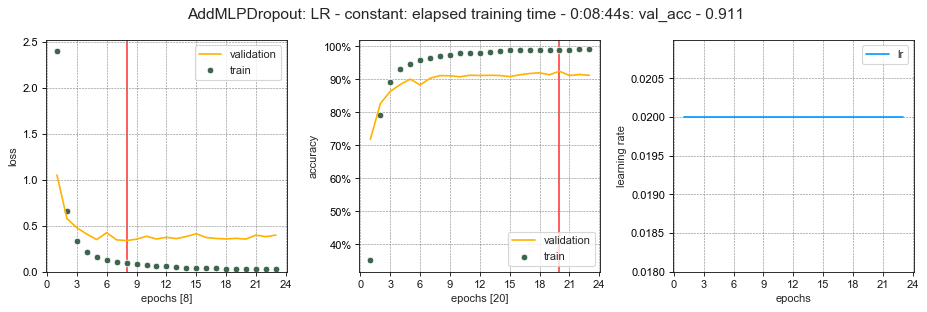

In [63]:
# train the model
fig_CNN, train_elapsedtime, trainable_params, nontrainable_params = f_train_CNN(selected_device, \
                train_generator, validation_generator,\
                epochs_max, batch_size, model_name,\
                model_Conv2D_filters, model_Conv2D_kernelsize, model_Conv2D_strides, model_Conv2D_activation,\
                model_Conv2D_padding, model_Conv2D_normalization, model_MaxPooling2D_size, model_dropout2D_rate,\
                model_MLP_units, model_MLP_activation, model_MLP_dropout_rate, lr_init, lr_decay, epochs_lr_decay, \
                optimizer, stop_delta, stop_patience, 0, 1)
plt.show(fig_CNN)

if(model_name in model_cmp_name):
    idx = model_cmp_name.index(model_name)
    model_cmp_name[idx] = model_name
    model_cmp_train_elapsedtime_min[idx] = (train_elapsedtime / 60)
    model_cmp_trainable_params[idx] = trainable_params
    model_cmp_nontrainable_params[idx] = nontrainable_params
    
else:
    model_cmp_name.append(model_name)
    model_cmp_train_elapsedtime_min.append((train_elapsedtime / 60))
    model_cmp_trainable_params.append(trainable_params)
    model_cmp_nontrainable_params.append(nontrainable_params)

Found 21312 images belonging to 43 classes.
Found 5328 images belonging to 43 classes.
Found 12569 images belonging to 43 classes.

acc train: 0.9986

acc validation: 0.9114

acc test: 0.9292


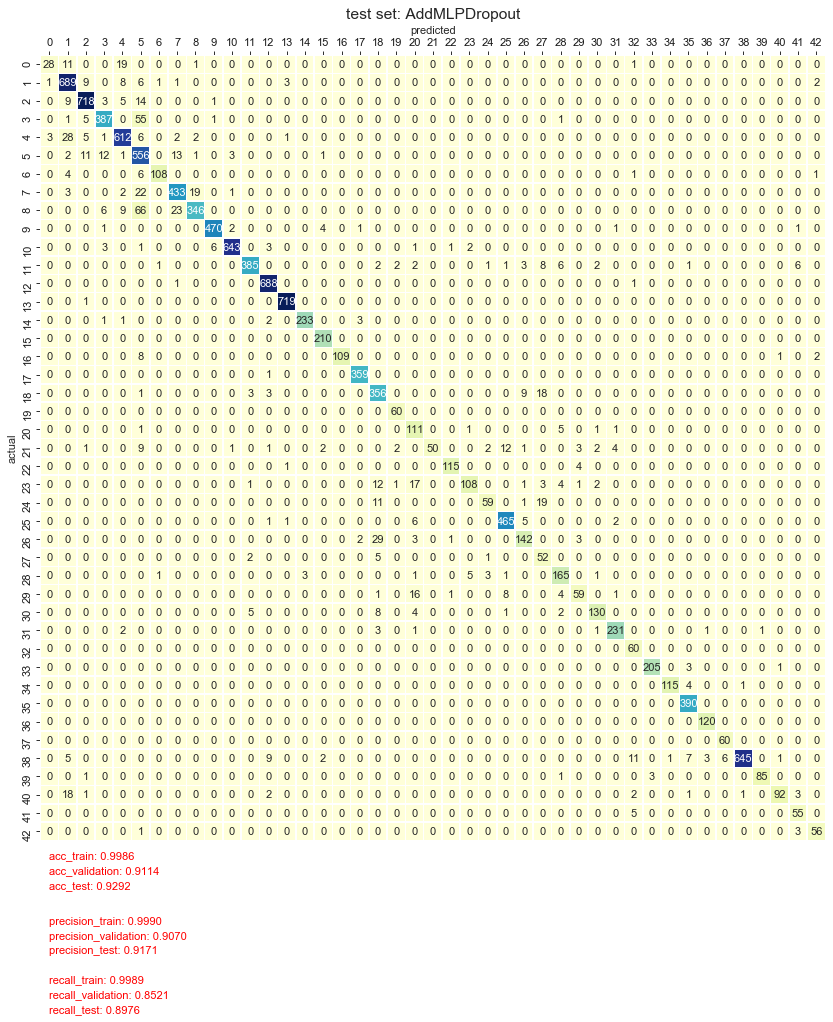

In [64]:
# calculate some metrics and plot the confusion matrix
fig_CNN_CM, accuracy_train, accuracy_validation, accuracy_test,\
precision_train, precision_validation, precision_test,\
recall_train, recall_validation, recall_test = f_CM_CNN(rawtraining_dir, train_data_generator, train_generator.n,\
                                                rawvalidation_dir, validation_data_generator, validation_generator.n,\
                                                test_dir, test_data_generator, test_generator.n, batch_size,\
                                                model_name,\
                                                img_width, img_height, 'test', False, CM_plot)
if(CM_plot):
    plt.show(fig_CNN_CM)

idx = model_cmp_name.index(model_name)
if((idx + 1) > len(model_cmp_accuracy_train)):
    model_cmp_accuracy_train.append(accuracy_train)
    model_cmp_accuracy_validation.append(accuracy_validation)
    model_cmp_accuracy_test.append(accuracy_test)
    model_cmp_precision_train.append(precision_train)
    model_cmp_precision_validation.append(precision_validation)
    model_cmp_precision_test.append(precision_test)
    model_cmp_recall_train.append(recall_train)
    model_cmp_recall_validation.append(recall_validation)
    model_cmp_recall_test.append(recall_test) 
else:
    model_cmp_accuracy_train[idx] = accuracy_train
    model_cmp_accuracy_validation[idx] = accuracy_validation
    model_cmp_accuracy_test[idx] = accuracy_test
    model_cmp_precision_train[idx] = precision_train
    model_cmp_precision_validation[idx] = precision_validation
    model_cmp_precision_test[idx] = precision_test
    model_cmp_recall_train[idx] = recall_train
    model_cmp_recall_validation[idx] = recall_validation
    model_cmp_recall_test[idx] = recall_test

<a class="anchor" id="modelling-dropout-all-ki"></a>
<b>Key Insights</b>:
   > <p>It had a similar effect to the previous step (more regularization and improvement on the metrics).</p>

[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="modelling-addbatchnorm"></a>
#### 4.1.5: Add Batch Normalization after Dropout (Conv: 2 Conv2d layer + Batchnorm + Dropout | Classifier: 1 Dense layer + Dropout)

We then decided to add the batch normalization layers on top of the previous model and access the impact of having both batch normalization and spatial dropout.

In [65]:
# define the network architecture
model_Conv2D_normalization = True

In [66]:
model_name = 'AddBatchNorm'

Again let's start to test some optimizers and their learning rate ...

In [67]:
# optimizers + learning rate definitions
if(test_LR):
    epochs_max = 50

    optimizer_list = ['SGD', 'SGD', 'SGD'] # 'RMSprop', 'Adam', 'SGD'

    lr_init_list = [0.004, 0.04, 0.1]

    lr_decay_list = ['constant', 'constant', 'constant'] # 'exponential', 'step_decay', 'constant'

    N_steps_lr_decay = 3 # only for applicable for step_decay

In [68]:
# test the optmizers + learning rate
if(test_LR):
    fig_OptmLR = f_TestOptimizersLR_CNN(selected_device, \
                    train_generator, validation_generator,\
                    epochs_max, batch_size, model_name,\
                    model_Conv2D_filters, model_Conv2D_kernelsize, model_Conv2D_strides, model_Conv2D_activation,\
                    model_Conv2D_padding, model_Conv2D_normalization, model_MaxPooling2D_size, model_dropout2D_rate,\
                    model_MLP_units, model_MLP_activation, model_MLP_dropout_rate,\
                    lr_init_list, lr_decay_list, N_steps_lr_decay, optimizer_list, 0)

    plt.show(fig_OptmLR)

In [69]:
# optimizers + learning rate definitions
epochs_max = 160

lr_init = 0.04
lr_decay = 'constant'
optimizer = 'SGD'

In [70]:
# auto-stop criteria
stop_delta =  0.001
stop_patience = 30

Model: "AddBatchNorm"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_0 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
batch_normalization_0 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_0 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_0 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
spatial_dropout2d_0 (Spatial (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)       


Epoch 00017: LearningRateScheduler reducing learning rate to 0.03999999910593033.
Epoch 17/160
83/84 [============================>.] - ETA: 0s - loss: 0.0441 - acc: 0.9862
Epoch 00017: val_loss did not improve from 0.30105
84/84 [==============================] - 23s 272ms/step - loss: 0.0439 - acc: 0.9863 - val_loss: 0.3104 - val_acc: 0.9176

Epoch 00018: LearningRateScheduler reducing learning rate to 0.03999999910593033.
Epoch 18/160
83/84 [============================>.] - ETA: 0s - loss: 0.0455 - acc: 0.9855
Epoch 00018: val_loss did not improve from 0.30105
84/84 [==============================] - 23s 270ms/step - loss: 0.0458 - acc: 0.9855 - val_loss: 0.3475 - val_acc: 0.9088

Epoch 00019: LearningRateScheduler reducing learning rate to 0.03999999910593033.
Epoch 19/160
83/84 [============================>.] - ETA: 0s - loss: 0.0450 - acc: 0.9858
Epoch 00019: val_loss did not improve from 0.30105
84/84 [==============================] - 23s 273ms/step - loss: 0.0448 - acc: 0.9

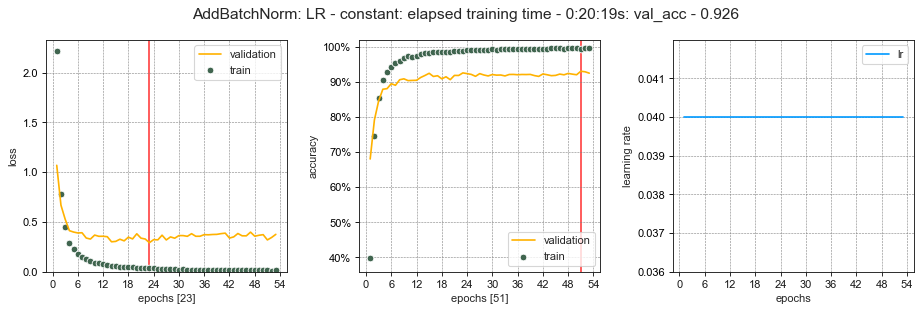

In [71]:
# train the model
fig_CNN, train_elapsedtime, trainable_params, nontrainable_params = f_train_CNN(selected_device, \
                train_generator, validation_generator,\
                epochs_max, batch_size, model_name,\
                model_Conv2D_filters, model_Conv2D_kernelsize, model_Conv2D_strides, model_Conv2D_activation,\
                model_Conv2D_padding, model_Conv2D_normalization, model_MaxPooling2D_size, model_dropout2D_rate,\
                model_MLP_units, model_MLP_activation, model_MLP_dropout_rate, lr_init, lr_decay, epochs_lr_decay, \
                optimizer, stop_delta, stop_patience, 0, 1)
plt.show(fig_CNN)

if(model_name in model_cmp_name):
    idx = model_cmp_name.index(model_name)
    model_cmp_name[idx] = model_name
    model_cmp_train_elapsedtime_min[idx] = (train_elapsedtime / 60)
    model_cmp_trainable_params[idx] = trainable_params
    model_cmp_nontrainable_params[idx] = nontrainable_params
    
else:
    model_cmp_name.append(model_name)
    model_cmp_train_elapsedtime_min.append((train_elapsedtime / 60))
    model_cmp_trainable_params.append(trainable_params)
    model_cmp_nontrainable_params.append(nontrainable_params)

Found 21312 images belonging to 43 classes.
Found 5328 images belonging to 43 classes.
Found 12569 images belonging to 43 classes.

acc train: 1.0000

acc validation: 0.9257

acc test: 0.9467


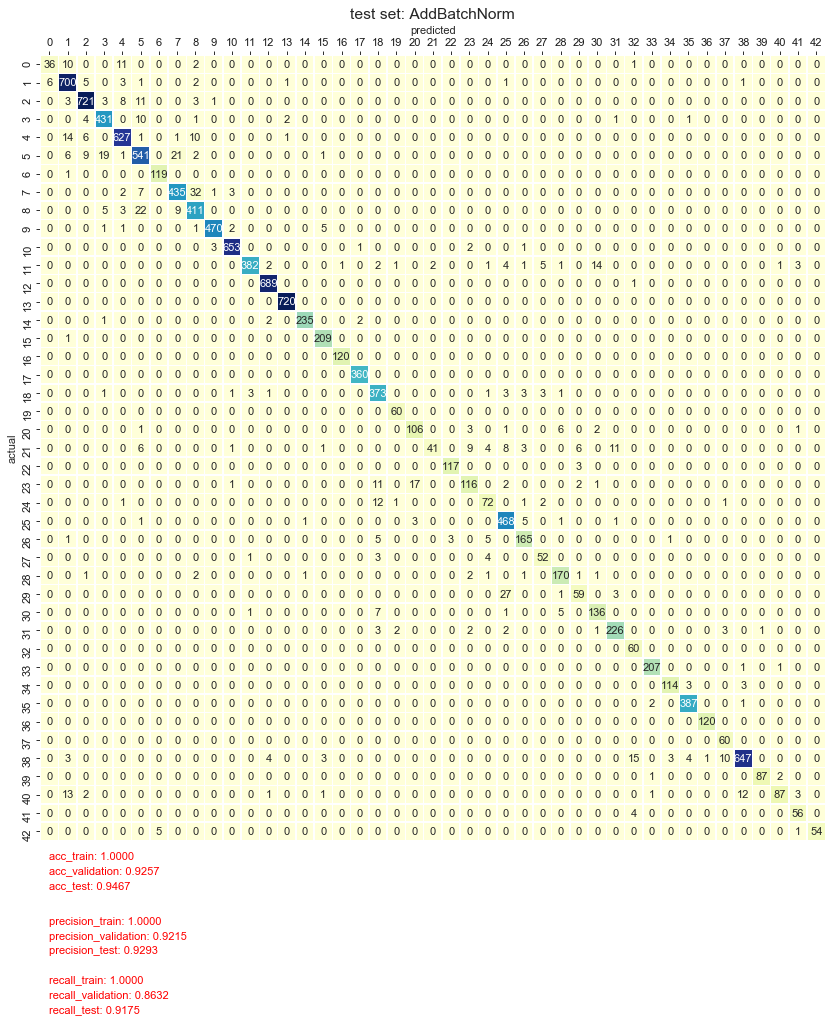

In [72]:
# calculate some metrics and plot the confusion matrix
fig_CNN_CM, accuracy_train, accuracy_validation, accuracy_test,\
precision_train, precision_validation, precision_test,\
recall_train, recall_validation, recall_test = f_CM_CNN(rawtraining_dir, train_data_generator, train_generator.n,\
                                                rawvalidation_dir, validation_data_generator, validation_generator.n,\
                                                test_dir, test_data_generator, test_generator.n, batch_size,\
                                                model_name,\
                                                img_width, img_height, 'test', False, CM_plot)
if(CM_plot):
    plt.show(fig_CNN_CM)

idx = model_cmp_name.index(model_name)
if((idx + 1) > len(model_cmp_accuracy_train)):
    model_cmp_accuracy_train.append(accuracy_train)
    model_cmp_accuracy_validation.append(accuracy_validation)
    model_cmp_accuracy_test.append(accuracy_test)
    model_cmp_precision_train.append(precision_train)
    model_cmp_precision_validation.append(precision_validation)
    model_cmp_precision_test.append(precision_test)
    model_cmp_recall_train.append(recall_train)
    model_cmp_recall_validation.append(recall_validation)
    model_cmp_recall_test.append(recall_test) 
else:
    model_cmp_accuracy_train[idx] = accuracy_train
    model_cmp_accuracy_validation[idx] = accuracy_validation
    model_cmp_accuracy_test[idx] = accuracy_test
    model_cmp_precision_train[idx] = precision_train
    model_cmp_precision_validation[idx] = precision_validation
    model_cmp_precision_test[idx] = precision_test
    model_cmp_recall_train[idx] = recall_train
    model_cmp_recall_validation[idx] = recall_validation
    model_cmp_recall_test[idx] = recall_test

<a class="anchor" id="modelling-addbatchnorm-ki"></a>
<b>Key Insights</b>:
   > <p>Even though they both act as regularization layers, we did not observe any negative impact of combining them, in fact the metrics kept improving. As the required number of epochs started to increase (for the same stop conditions) we increased the learning rate which was possible due to the batch normalization layers.</p>

[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="modelling-adicconv"></a>
#### 4.1.6: Add Additional Conv (Conv: 3 Conv2d layer + Batchnorm + Dropout | Classifier: 1 Dense layer + Dropout)

This will be our final architecture which was obtained by adding one additional convolutional block from the previous model.

In [73]:
# convolutional section
model_Conv2D_filters = [32, 64, 128]
model_Conv2D_kernelsize = [5, 5, 5]
model_Conv2D_strides = [1, 1, 1]
model_Conv2D_activation = ['relu', 'relu', 'relu'] # 'relu', 'tanh'
model_Conv2D_padding = ['same', 'same', 'same'] # 'valid', 'same'
model_Conv2D_normalization = True

model_MaxPooling2D_size = [2, 2, 2]

model_dropout2D_rate = [0.3, 0.4, 0.5]

In [74]:
model_name = 'AddConv2d'

Again let's start to test some optimizers and their learning rate ...

In [75]:
# optimizers + learning rate definitions
if(test_LR):
    epochs_max = 50

    optimizer_list = ['SGD', 'SGD', 'SGD'] # 'RMSprop', 'Adam', 'SGD'

    lr_init_list = [0.004, 0.04, 0.1]

    lr_decay_list = ['constant', 'constant', 'constant'] # 'exponential', 'step_decay', 'constant'

    N_steps_lr_decay = 3 # only for applicable for step_decay


In [76]:
# test the optmizers + learning rate
if(test_LR):
    fig_OptmLR = f_TestOptimizersLR_CNN(selected_device, \
                    train_generator, validation_generator,\
                    epochs_max, batch_size, model_name,\
                    model_Conv2D_filters, model_Conv2D_kernelsize, model_Conv2D_strides, model_Conv2D_activation,\
                    model_Conv2D_padding, model_Conv2D_normalization, model_MaxPooling2D_size, model_dropout2D_rate,\
                    model_MLP_units, model_MLP_activation, model_MLP_dropout_rate,\
                    lr_init_list, lr_decay_list, N_steps_lr_decay, optimizer_list, 0)

    plt.show(fig_OptmLR)

In [77]:
# optimizers + learning rate definitions
epochs_max = 200

lr_init = 0.04
lr_decay = 'constant'
optimizer = 'SGD'

In [78]:
# auto-stop criteria
stop_delta =  0.001
stop_patience = 40

Model: "AddConv2d"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_0 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
batch_normalization_0 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_0 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_0 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
spatial_dropout2d_0 (Spatial (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        51

83/84 [============================>.] - ETA: 0s - loss: 0.0477 - acc: 0.9844
Epoch 00037: val_loss did not improve from 0.23529
84/84 [==============================] - 28s 336ms/step - loss: 0.0475 - acc: 0.9845 - val_loss: 0.2614 - val_acc: 0.9437

Epoch 00038: LearningRateScheduler reducing learning rate to 0.03999999910593033.
Epoch 38/200
83/84 [============================>.] - ETA: 0s - loss: 0.0443 - acc: 0.9859
Epoch 00038: val_loss did not improve from 0.23529
84/84 [==============================] - 27s 318ms/step - loss: 0.0448 - acc: 0.9859 - val_loss: 0.2862 - val_acc: 0.9388

Epoch 00039: LearningRateScheduler reducing learning rate to 0.03999999910593033.
Epoch 39/200
83/84 [============================>.] - ETA: 0s - loss: 0.0472 - acc: 0.9849
Epoch 00039: val_loss did not improve from 0.23529
84/84 [==============================] - 26s 304ms/step - loss: 0.0471 - acc: 0.9849 - val_loss: 0.2658 - val_acc: 0.9422

Epoch 00040: LearningRateScheduler reducing learning r


Epoch 00061: LearningRateScheduler reducing learning rate to 0.03999999910593033.
Epoch 61/200
83/84 [============================>.] - ETA: 0s - loss: 0.0302 - acc: 0.9904
Epoch 00061: val_loss did not improve from 0.22177
84/84 [==============================] - 31s 366ms/step - loss: 0.0303 - acc: 0.9903 - val_loss: 0.2483 - val_acc: 0.9484

Epoch 00062: LearningRateScheduler reducing learning rate to 0.03999999910593033.
Epoch 62/200
83/84 [============================>.] - ETA: 0s - loss: 0.0224 - acc: 0.9930
Epoch 00062: val_loss did not improve from 0.22177
84/84 [==============================] - 23s 271ms/step - loss: 0.0227 - acc: 0.9929 - val_loss: 0.2552 - val_acc: 0.9474

Epoch 00063: LearningRateScheduler reducing learning rate to 0.03999999910593033.
Epoch 63/200
83/84 [============================>.] - ETA: 0s - loss: 0.0235 - acc: 0.9928
Epoch 00063: val_loss did not improve from 0.22177
84/84 [==============================] - 34s 402ms/step - loss: 0.0234 - acc: 0.9


Epoch 00085: LearningRateScheduler reducing learning rate to 0.03999999910593033.
Epoch 85/200
83/84 [============================>.] - ETA: 0s - loss: 0.0194 - acc: 0.9931
Epoch 00085: val_loss did not improve from 0.22177
84/84 [==============================] - 27s 320ms/step - loss: 0.0194 - acc: 0.9931 - val_loss: 0.2618 - val_acc: 0.9488

Epoch 00086: LearningRateScheduler reducing learning rate to 0.03999999910593033.
Epoch 86/200
83/84 [============================>.] - ETA: 0s - loss: 0.0176 - acc: 0.9942
Epoch 00086: val_loss did not improve from 0.22177
84/84 [==============================] - 29s 350ms/step - loss: 0.0175 - acc: 0.9942 - val_loss: 0.2400 - val_acc: 0.9514

Epoch 00087: LearningRateScheduler reducing learning rate to 0.03999999910593033.
Epoch 87/200
83/84 [============================>.] - ETA: 0s - loss: 0.0189 - acc: 0.9940
Epoch 00087: val_loss did not improve from 0.22177
84/84 [==============================] - 25s 295ms/step - loss: 0.0187 - acc: 0.9

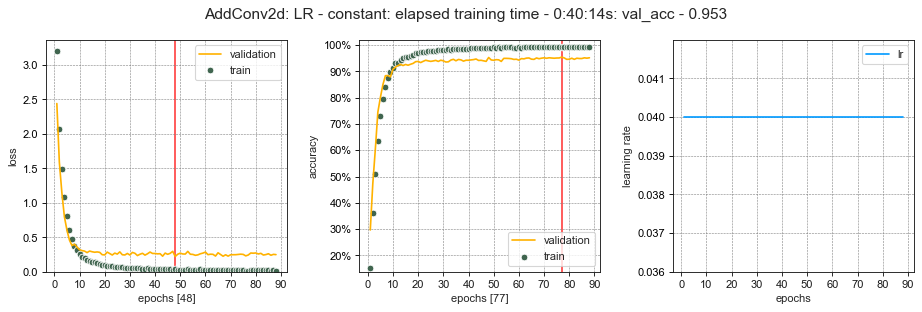

In [79]:
# train the model
fig_CNN, train_elapsedtime, trainable_params, nontrainable_params = f_train_CNN(selected_device, \
                train_generator, validation_generator,\
                epochs_max, batch_size, model_name,\
                model_Conv2D_filters, model_Conv2D_kernelsize, model_Conv2D_strides, model_Conv2D_activation,\
                model_Conv2D_padding, model_Conv2D_normalization, model_MaxPooling2D_size, model_dropout2D_rate,\
                model_MLP_units, model_MLP_activation, model_MLP_dropout_rate, lr_init, lr_decay, epochs_lr_decay, \
                optimizer, stop_delta, stop_patience, 0, 1)
plt.show(fig_CNN)

if(model_name in model_cmp_name):
    idx = model_cmp_name.index(model_name)
    model_cmp_name[idx] = model_name
    model_cmp_train_elapsedtime_min[idx] = (train_elapsedtime / 60)
    model_cmp_trainable_params[idx] = trainable_params
    model_cmp_nontrainable_params[idx] = nontrainable_params
    
else:
    model_cmp_name.append(model_name)
    model_cmp_train_elapsedtime_min.append((train_elapsedtime / 60))
    model_cmp_trainable_params.append(trainable_params)
    model_cmp_nontrainable_params.append(nontrainable_params)

Found 21312 images belonging to 43 classes.
Found 5328 images belonging to 43 classes.
Found 12569 images belonging to 43 classes.

acc train: 1.0000

acc validation: 0.9527

acc test: 0.9668


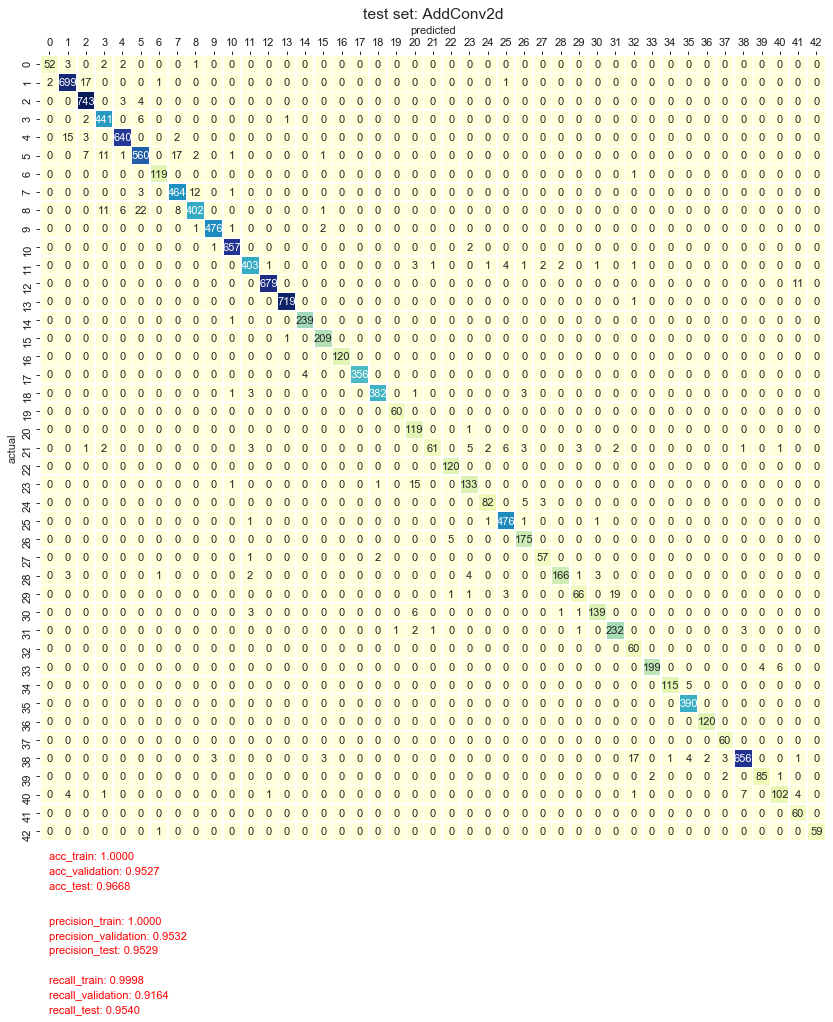

In [80]:
# calculate some metrics and plot the confusion matrix
fig_CNN_CM, accuracy_train, accuracy_validation, accuracy_test,\
precision_train, precision_validation, precision_test,\
recall_train, recall_validation, recall_test = f_CM_CNN(rawtraining_dir, train_data_generator, train_generator.n,\
                                                rawvalidation_dir, validation_data_generator, validation_generator.n,\
                                                test_dir, test_data_generator, test_generator.n, batch_size,\
                                                model_name,\
                                                img_width, img_height, 'test', False, CM_plot)
if(CM_plot):
    plt.show(fig_CNN_CM)

idx = model_cmp_name.index(model_name)
if((idx + 1) > len(model_cmp_accuracy_train)):
    model_cmp_accuracy_train.append(accuracy_train)
    model_cmp_accuracy_validation.append(accuracy_validation)
    model_cmp_accuracy_test.append(accuracy_test)
    model_cmp_precision_train.append(precision_train)
    model_cmp_precision_validation.append(precision_validation)
    model_cmp_precision_test.append(precision_test)
    model_cmp_recall_train.append(recall_train)
    model_cmp_recall_validation.append(recall_validation)
    model_cmp_recall_test.append(recall_test) 
else:
    model_cmp_accuracy_train[idx] = accuracy_train
    model_cmp_accuracy_validation[idx] = accuracy_validation
    model_cmp_accuracy_test[idx] = accuracy_test
    model_cmp_precision_train[idx] = precision_train
    model_cmp_precision_validation[idx] = precision_validation
    model_cmp_precision_test[idx] = precision_test
    model_cmp_recall_train[idx] = recall_train
    model_cmp_recall_validation[idx] = recall_validation
    model_cmp_recall_test[idx] = recall_test

<a class="anchor" id="modelling-adicconv-ki"></a>
<b>Key Insights</b>:
   > <p>After adding an additional convolutional block we could still observe an improvement on the metrics and without overfit effect even though the epochs used to train increased.</p>

[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="modelling-augmented"></a>
#### 4.1.7: With Data Augmentation

Keeping the same architecture as before but using now the augmented dataset just for training purposes. After some experimentation, we needed to go from a constant learning rate change schema to a step decay with a decrease factor of 0.5 every 15 epochs using the same optimizer.

In [81]:
model_name = 'Augmented'

Again let's start to test some optimizers and their learning rate ...

In [82]:
# optimizers + learning rate definitions
if(test_LR):
    epochs_max = 40

    optimizer_list = ['SGD', 'SGD', 'SGD'] # 'RMSprop', 'Adam', 'SGD'

    lr_init_list = [0.006, 0.06, 0.2]

    lr_decay_list = ['constant', 'constant', 'constant'] # 'exponential', 'step_decay', 'constant'

    N_steps_lr_decay = 30 # only for applicable for step_decay

In [83]:
# test the optmizers + learning rate
if(test_LR):
    fig_OptmLR = f_TestOptimizersLR_CNN(selected_device, \
                    AUGtrain_generator, validation_generator,\
                    epochs_max, batch_size, model_name,\
                    model_Conv2D_filters, model_Conv2D_kernelsize, model_Conv2D_strides, model_Conv2D_activation,\
                    model_Conv2D_padding, model_Conv2D_normalization, model_MaxPooling2D_size, model_dropout2D_rate,\
                    model_MLP_units, model_MLP_activation, model_MLP_dropout_rate,\
                    lr_init_list, lr_decay_list, N_steps_lr_decay, optimizer_list, 0)

    plt.show(fig_OptmLR)

In [84]:
# optimizers + learning rate definitions
epochs_max = 120

lr_init = 0.06
lr_decay = 'step_decay'
epochs_lr_decay = 15 
optimizer = 'SGD'

In [85]:
# auto-stop criteria
stop_delta =  0.001
stop_patience = 10

Model: "Augmented"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_0 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
batch_normalization_0 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_0 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_0 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
spatial_dropout2d_0 (Spatial (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        51


Epoch 00015: LearningRateScheduler reducing learning rate to 0.06.
Epoch 15/120
241/242 [============================>.] - ETA: 0s - loss: 0.2730 - acc: 0.9122
Epoch 00015: val_loss improved from 0.07357 to 0.07317, saving model to Augmented-15-0.07317.h5
242/242 [==============================] - 75s 309ms/step - loss: 0.2730 - acc: 0.9122 - val_loss: 0.0732 - val_acc: 0.9773

Epoch 00016: LearningRateScheduler reducing learning rate to 0.03.
Epoch 16/120
241/242 [============================>.] - ETA: 0s - loss: 0.2321 - acc: 0.9261
Epoch 00016: val_loss did not improve from 0.07317
242/242 [==============================] - 76s 312ms/step - loss: 0.2321 - acc: 0.9260 - val_loss: 0.0735 - val_acc: 0.9767

Epoch 00017: LearningRateScheduler reducing learning rate to 0.03.
Epoch 17/120
241/242 [============================>.] - ETA: 0s - loss: 0.2120 - acc: 0.9321
Epoch 00017: val_loss improved from 0.07317 to 0.06733, saving model to Augmented-17-0.06733.h5
242/242 [=================


Epoch 00038: LearningRateScheduler reducing learning rate to 0.015.
Epoch 38/120
241/242 [============================>.] - ETA: 0s - loss: 0.1106 - acc: 0.9646
Epoch 00038: val_loss did not improve from 0.02965
242/242 [==============================] - 80s 331ms/step - loss: 0.1104 - acc: 0.9646 - val_loss: 0.0345 - val_acc: 0.9891

Epoch 00039: LearningRateScheduler reducing learning rate to 0.015.
Epoch 39/120
241/242 [============================>.] - ETA: 0s - loss: 0.1118 - acc: 0.9647
Epoch 00039: val_loss did not improve from 0.02965
242/242 [==============================] - 80s 329ms/step - loss: 0.1118 - acc: 0.9647 - val_loss: 0.0325 - val_acc: 0.9895

Epoch 00040: LearningRateScheduler reducing learning rate to 0.015.
Epoch 40/120
241/242 [============================>.] - ETA: 0s - loss: 0.1067 - acc: 0.9655
Epoch 00040: val_loss did not improve from 0.02965
242/242 [==============================] - 80s 330ms/step - loss: 0.1068 - acc: 0.9655 - val_loss: 0.0372 - val_a

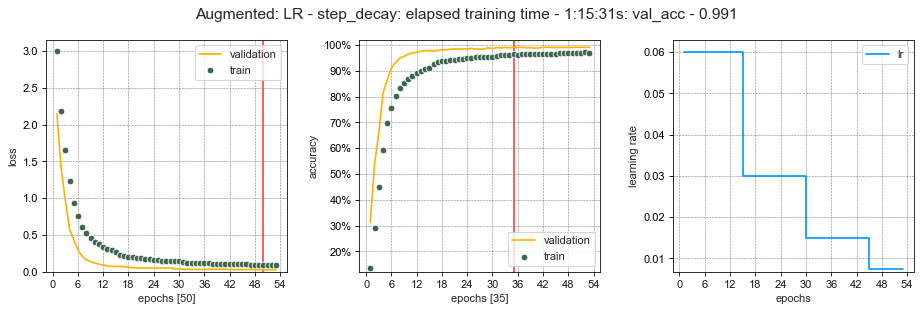

In [86]:
# train the model
fig_CNN, train_elapsedtime, trainable_params, nontrainable_params = f_train_CNN(selected_device, \
                AUGtrain_generator, validation_generator,\
                epochs_max, batch_size, model_name,\
                model_Conv2D_filters, model_Conv2D_kernelsize, model_Conv2D_strides, model_Conv2D_activation,\
                model_Conv2D_padding, model_Conv2D_normalization, model_MaxPooling2D_size, model_dropout2D_rate,\
                model_MLP_units, model_MLP_activation, model_MLP_dropout_rate, lr_init, lr_decay, epochs_lr_decay, \
                optimizer, stop_delta, stop_patience, 0, 1)
plt.show(fig_CNN)

if(model_name in model_cmp_name):
    idx = model_cmp_name.index(model_name)
    model_cmp_name[idx] = model_name
    model_cmp_train_elapsedtime_min[idx] = (train_elapsedtime / 60)
    model_cmp_trainable_params[idx] = trainable_params
    model_cmp_nontrainable_params[idx] = nontrainable_params
    
else:
    model_cmp_name.append(model_name)
    model_cmp_train_elapsedtime_min.append((train_elapsedtime / 60))
    model_cmp_trainable_params.append(trainable_params)
    model_cmp_nontrainable_params.append(nontrainable_params)

Found 61902 images belonging to 43 classes.
Found 5328 images belonging to 43 classes.
Found 12569 images belonging to 43 classes.

acc train: 0.9992

acc validation: 0.9914

acc test: 0.9770


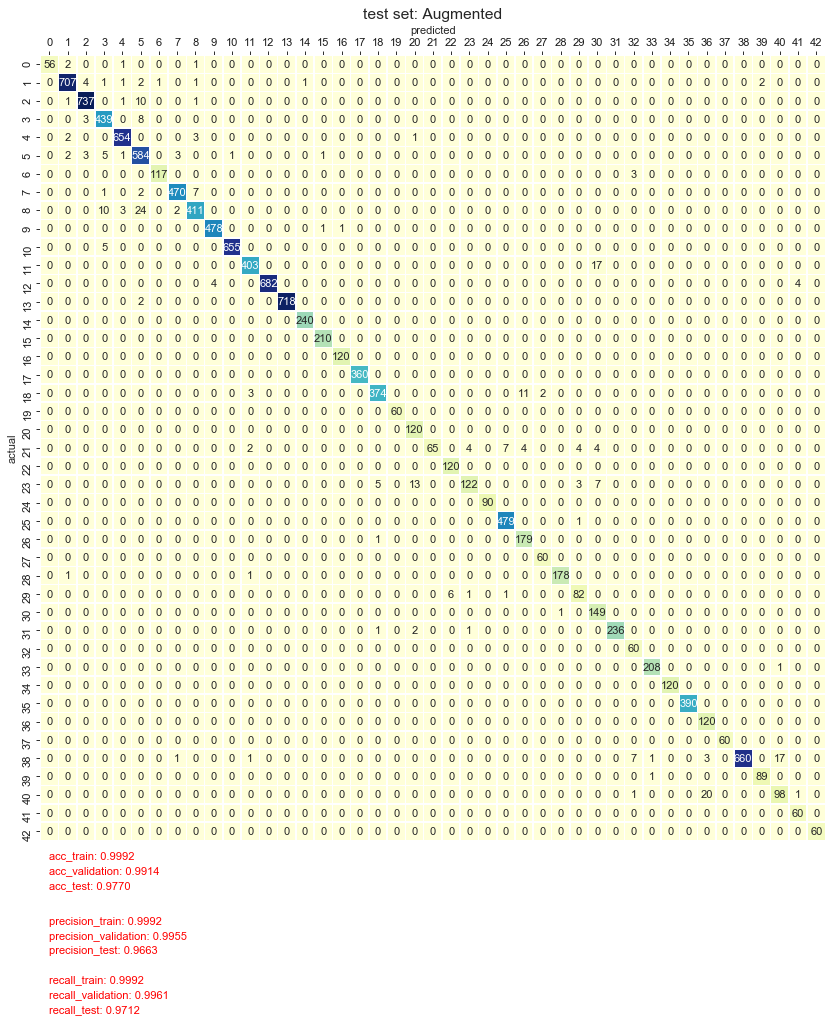

In [87]:
# calculate some metrics and plot the confusion matrix
fig_CNN_CM, accuracy_train, accuracy_validation, accuracy_test,\
precision_train, precision_validation, precision_test,\
recall_train, recall_validation, recall_test = f_CM_CNN(augtrain_dir, AUGtrain_data_generator, AUGtrain_generator.n,\
                                                rawvalidation_dir, validation_data_generator, validation_generator.n,\
                                                test_dir, test_data_generator, test_generator.n, batch_size,\
                                                model_name,\
                                                img_width, img_height, 'test', False, CM_plot)
if(CM_plot):
    plt.show(fig_CNN_CM)

idx = model_cmp_name.index(model_name)
if((idx + 1) > len(model_cmp_accuracy_train)):
    model_cmp_accuracy_train.append(accuracy_train)
    model_cmp_accuracy_validation.append(accuracy_validation)
    model_cmp_accuracy_test.append(accuracy_test)
    model_cmp_precision_train.append(precision_train)
    model_cmp_precision_validation.append(precision_validation)
    model_cmp_precision_test.append(precision_test)
    model_cmp_recall_train.append(recall_train)
    model_cmp_recall_validation.append(recall_validation)
    model_cmp_recall_test.append(recall_test) 
else:
    model_cmp_accuracy_train[idx] = accuracy_train
    model_cmp_accuracy_validation[idx] = accuracy_validation
    model_cmp_accuracy_test[idx] = accuracy_test
    model_cmp_precision_train[idx] = precision_train
    model_cmp_precision_validation[idx] = precision_validation
    model_cmp_precision_test[idx] = precision_test
    model_cmp_recall_train[idx] = recall_train
    model_cmp_recall_validation[idx] = recall_validation
    model_cmp_recall_test[idx] = recall_test

<a class="anchor" id="modelling-augmented-ki"></a>
<b>Key Insights</b>:
   > <p>In this case the results kept improving and due to time constrains we did not try to increase the complexity of the model.</p>

[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="modelling-pre-trained"></a>
### 4.2: Pre-trained model (VGG16)

<b>Approach</b>: In order to answer in the most complete way to our initial challenge (traffic sign identification) we decided to use a pretrained model that was available in application module of Keras. 
<p>With the purpose of inferring the impacts of the utilization of such models, we choose the convolutional neural network model VGG16 that is usually used for image recognition.</p>
<p>Regarding our approach, we used following methodology:
    <ul>1.	A custom classifier was added on top of an already-trained base network. To exclude the default classifier, it was settled argument “include_top” to false.</ul>
    <ul>2.	The base network was frozen to prevent the weights from being updated during training.</ul>
    <ul>3.	The new classifier was trained.</ul>
    <ul>4.	The layers in the base network that were pretended to be trained were unfrozen.</ul>
    <ul>5.	The layers previously unfrozen were jointly trained with the ones from the new classifier.</ul>

In [223]:
model_name = 'PreTrainedVGG16'

In [224]:
pooling = 'avg' # 'None', 'avg', 'max'

# mlp section
model_MLP_units = [512, 512]
model_MLP_activation = ['relu', 'relu']
model_MLP_dropout_rate = [0.3, 0.4]

Let's start to test some optimizers and their learning rate ...

In [225]:
# optimizers + learning rate definitions
if(test_LR):
    epochs_max = 120

    optimizer_list = ['SGD', 'SGD', 'SGD'] # 'RMSprop', 'Adam', 'SGD'

    lr_init_list = [0.004, 0.009, 0.04]

    lr_decay_list = ['constant', 'constant', 'constant'] # 'exponential', 'step_decay', 'constant'

    N_steps_lr_decay = 3 # only for applicable for step_decay

In [226]:
# test the optmizers + learning rate
if(test_LR):
    fig_OptmLR = f_TestOptimizersLR_VGG16_MLP(selected_device, \
                    train_generator, validation_generator,\
                    epochs_max, batch_size, model_name, pooling,\
                    model_MLP_units, model_MLP_activation, model_MLP_dropout_rate,\
                    lr_init_list, lr_decay_list, N_steps_lr_decay, optimizer_list, 0)

    plt.show(fig_OptmLR)

In [227]:
# optimizers + learning rate definitions
epochs_max = 120

lr_init = 0.01
lr_decay = 'constant'
optimizer = 'SGD'

In [228]:
# auto-stop criteria
stop_delta =  0.001
stop_patience = 10

Let's train the new classifier with all the VGG16's layers frozen.

Do not train --> block1_conv1
Do not train --> block1_conv2
Do not train --> block1_pool
Do not train --> block2_conv1
Do not train --> block2_conv2
Do not train --> block2_pool
Do not train --> block3_conv1
Do not train --> block3_conv2
Do not train --> block3_conv3
Do not train --> block3_pool
Do not train --> block4_conv1
Do not train --> block4_conv2
Do not train --> block4_conv3
Do not train --> block4_pool
Do not train --> block5_conv1
Do not train --> block5_conv2
Do not train --> block5_conv3
Do not train --> block5_pool

Model: "PreTrainedVGG16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32,


Epoch 00011: LearningRateScheduler reducing learning rate to 0.009999999776482582.
Epoch 11/120
83/84 [============================>.] - ETA: 0s - loss: 0.8704 - acc: 0.7121
Epoch 00011: val_loss did not improve from 1.71385
84/84 [==============================] - 33s 390ms/step - loss: 0.8700 - acc: 0.7126 - val_loss: 1.7211 - val_acc: 0.4994

Epoch 00012: LearningRateScheduler reducing learning rate to 0.009999999776482582.
Epoch 12/120
83/84 [============================>.] - ETA: 0s - loss: 0.8227 - acc: 0.7290
Epoch 00012: val_loss did not improve from 1.71385
84/84 [==============================] - 26s 309ms/step - loss: 0.8234 - acc: 0.7285 - val_loss: 1.7697 - val_acc: 0.5111

Epoch 00013: LearningRateScheduler reducing learning rate to 0.009999999776482582.
Epoch 13/120
83/84 [============================>.] - ETA: 0s - loss: 0.7798 - acc: 0.7405
Epoch 00013: val_loss did not improve from 1.71385
84/84 [==============================] - 27s 323ms/step - loss: 0.7804 - acc: 

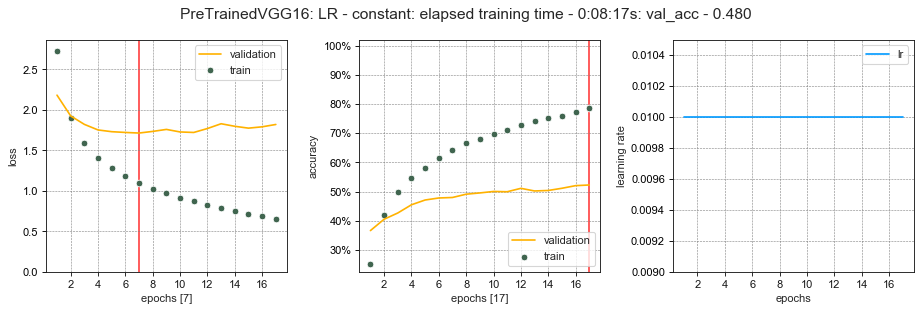

In [229]:
# train the model
fig_VGG16_MLP, train_elapsedtime, trainable_params, nontrainable_params = f_train_VGG16_MLP(selected_device, \
                train_generator, validation_generator,\
                epochs_max, batch_size, model_name, pooling,\
                model_MLP_units, model_MLP_activation, model_MLP_dropout_rate,\
                lr_init, lr_decay, epochs_lr_decay, \
                optimizer, stop_delta, stop_patience, 0, 1)
plt.show(fig_VGG16_MLP)

Found 21312 images belonging to 43 classes.
Found 5328 images belonging to 43 classes.
Found 12569 images belonging to 43 classes.

acc train: 0.7288

acc validation: 0.4797

acc test: 0.5265


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


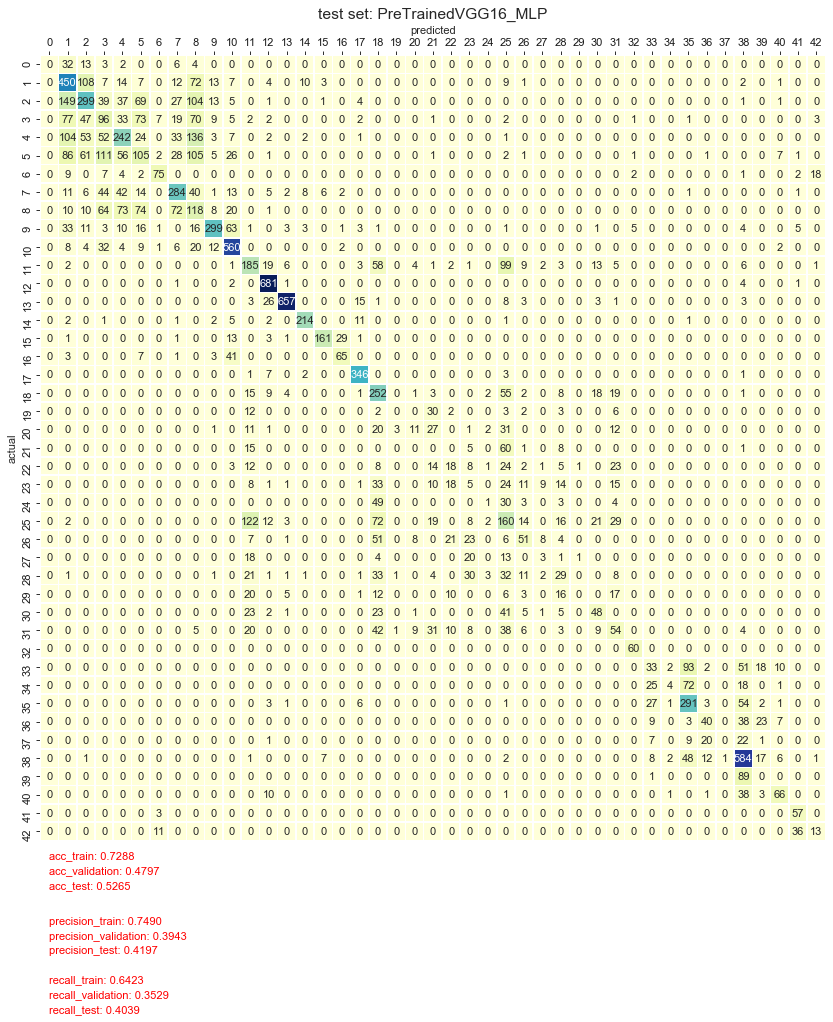

In [230]:
# calculate some metrics and plot the confusion matrix
fig_CNN_CM, accuracy_train, accuracy_validation, accuracy_test,\
precision_train, precision_validation, precision_test,\
recall_train, recall_validation, recall_test = f_CM_CNN(rawtraining_dir, train_data_generator, train_generator.n,\
                                                rawvalidation_dir, validation_data_generator, validation_generator.n,\
                                                test_dir, test_data_generator, test_generator.n, batch_size,\
                                                'PreTrainedVGG16_MLP',\
                                                img_width, img_height, 'test', False, CM_plot)
if(CM_plot):
    plt.show(fig_CNN_CM)

Unfreezing the layers in the base network that we pretend to train.

In [246]:
layers_train = ['block3', 'block4', 'block5']

Again let's start to test some optimizers and their learning rate ...

In [247]:
# optimizers + learning rate definitions
if(test_LR):
    epochs_max = 3

    optimizer_list = ['SGD', 'SGD', 'SGD'] # 'RMSprop', 'Adam', 'SGD'

    lr_init_list = [0.0001, 0.001, 0.01]

    lr_decay_list = ['constant', 'constant', 'constant'] # 'exponential', 'step_decay', 'constant'

    N_steps_lr_decay = 3 # only for applicable for step_decay

In [248]:
# test the optmizers + learning rate
if(test_LR):
    fig_OptmLR = f_TestOptimizersLR_VGG16(selected_device, \
                    train_generator, validation_generator,\
                    epochs_max, batch_size, model_name, layers_train,\
                    lr_init_list, lr_decay_list, N_steps_lr_decay, optimizer_list, 0)

    plt.show(fig_OptmLR)

In [249]:
# optimizers + learning rate definitions
epochs_max = 120

lr_init = 0.0002
lr_decay = 'constant'
epochs_lr_decay = 15
optimizer = 'SGD'

In [250]:
# auto-stop criteria
stop_delta =  0.001
stop_patience = 5

We jointly train the layers previously unfrozen with the ones from the new classifier.

Do not train --> block1_conv1
Do not train --> block1_conv2
Do not train --> block1_pool
Do not train --> block2_conv1
Do not train --> block2_conv2
Do not train --> block2_pool

Model: "PreTrainedVGG16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
bloc

83/84 [============================>.] - ETA: 0s - loss: 0.1171 - acc: 0.9603
Epoch 00012: val_loss improved from 1.24474 to 1.23798, saving model to PreTrainedVGG16-12-1.23798.h5
84/84 [==============================] - 27s 327ms/step - loss: 0.1171 - acc: 0.9603 - val_loss: 1.2380 - val_acc: 0.7442

Epoch 00013: LearningRateScheduler reducing learning rate to 0.00019999999494757503.
Epoch 13/120
83/84 [============================>.] - ETA: 0s - loss: 0.1118 - acc: 0.9615
Epoch 00013: val_loss did not improve from 1.23798
84/84 [==============================] - 27s 326ms/step - loss: 0.1119 - acc: 0.9616 - val_loss: 1.3164 - val_acc: 0.7252

Epoch 00014: LearningRateScheduler reducing learning rate to 0.00019999999494757503.
Epoch 14/120
83/84 [============================>.] - ETA: 0s - loss: 0.0946 - acc: 0.9694
Epoch 00014: val_loss did not improve from 1.23798
84/84 [==============================] - 27s 327ms/step - loss: 0.0946 - acc: 0.9695 - val_loss: 1.2949 - val_acc: 0.743

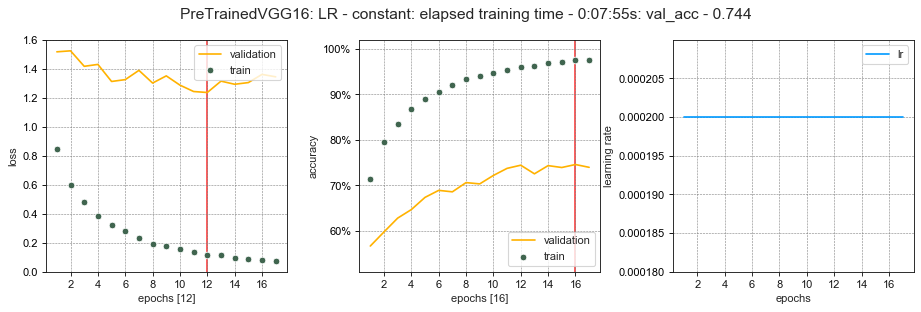

In [251]:
# train the model
fig_VGG16, train_elapsedtime, trainable_params, nontrainable_params = f_train_VGG16(selected_device, \
                train_generator, validation_generator,\
                epochs_max, batch_size, model_name, layers_train,\
                lr_init, lr_decay, epochs_lr_decay, \
                optimizer, stop_delta, stop_patience, 0, 1)
plt.show(fig_VGG16)

if(model_name in model_cmp_name):
    idx = model_cmp_name.index(model_name)
    model_cmp_name[idx] = model_name
    model_cmp_train_elapsedtime_min[idx] = (train_elapsedtime / 60)
    model_cmp_trainable_params[idx] = trainable_params
    model_cmp_nontrainable_params[idx] = nontrainable_params
    
else:
    model_cmp_name.append(model_name)
    model_cmp_train_elapsedtime_min.append((train_elapsedtime / 60))
    model_cmp_trainable_params.append(trainable_params)
    model_cmp_nontrainable_params.append(nontrainable_params)

Found 21312 images belonging to 43 classes.
Found 5328 images belonging to 43 classes.
Found 12569 images belonging to 43 classes.

acc train: 0.9718

acc validation: 0.6640

acc test: 0.6962


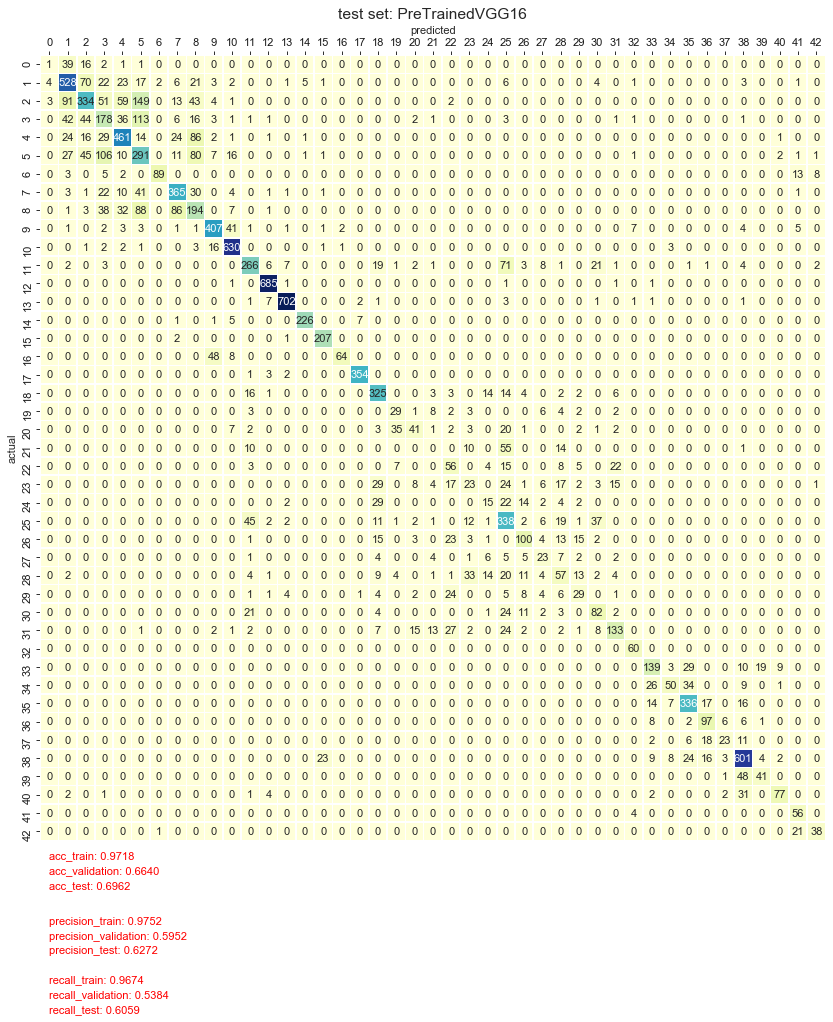

In [252]:
# calculate some metrics and plot the confusion matrix
fig_CNN_CM, accuracy_train, accuracy_validation, accuracy_test,\
precision_train, precision_validation, precision_test,\
recall_train, recall_validation, recall_test = f_CM_CNN(rawtraining_dir, train_data_generator, train_generator.n,\
                                                rawvalidation_dir, validation_data_generator, validation_generator.n,\
                                                test_dir, test_data_generator, test_generator.n, batch_size,\
                                                model_name,\
                                                img_width, img_height, 'test', False, CM_plot)
if(CM_plot):
    plt.show(fig_CNN_CM)

idx = model_cmp_name.index(model_name)
if((idx + 1) > len(model_cmp_accuracy_train)):
    model_cmp_accuracy_train.append(accuracy_train)
    model_cmp_accuracy_validation.append(accuracy_validation)
    model_cmp_accuracy_test.append(accuracy_test)
    model_cmp_precision_train.append(precision_train)
    model_cmp_precision_validation.append(precision_validation)
    model_cmp_precision_test.append(precision_test)
    model_cmp_recall_train.append(recall_train)
    model_cmp_recall_validation.append(recall_validation)
    model_cmp_recall_test.append(recall_test) 
else:
    model_cmp_accuracy_train[idx] = accuracy_train
    model_cmp_accuracy_validation[idx] = accuracy_validation
    model_cmp_accuracy_test[idx] = accuracy_test
    model_cmp_precision_train[idx] = precision_train
    model_cmp_precision_validation[idx] = precision_validation
    model_cmp_precision_test[idx] = precision_test
    model_cmp_recall_train[idx] = recall_train
    model_cmp_recall_validation[idx] = recall_validation
    model_cmp_recall_test[idx] = recall_test

<a class="anchor" id="modelling-pre-trained-ki"></a>
<b>Key Insights</b>:
   > <p>The obtained results are not the expected. However several strategies must be mitigated in future work, such as:</p>
   <ul>Train more blocks from the VGG16, possibly all the network.</ul>
   <ul>In a way to regulate the loss evolution, it could be interesting to apply batch normalization.</ul>
   <ul>Finally, feeding the model with more images through image augmentation could potentially enhance the performance of the model</ul> 

[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="modelling-comp"></a>
### 4.3: Model Comparison

In [253]:
pd.set_option('precision', 5)
if(test_dir == ''):
    df_model_cmp = pd.DataFrame(
        {'name': model_cmp_name,
         'total_training_time_min': model_cmp_train_elapsedtime_min,
         'trainable_params': model_cmp_trainable_params,
         'non-trainable_params': model_cmp_nontrainable_params,
         'accuracy_train': model_cmp_accuracy_train, 
         'precision_train': model_cmp_precision_train,
         'recall_train': model_cmp_recall_train,
         'accuracy_validation': model_cmp_accuracy_validation, 
         'precision_validation': model_cmp_precision_validation,
         'recall_validation': model_cmp_recall_validation
        })
else:
    df_model_cmp = pd.DataFrame(
        {'name': model_cmp_name,
         'total_training_time_min': model_cmp_train_elapsedtime_min,
         'trainable_params': model_cmp_trainable_params,
         'non-trainable_params': model_cmp_nontrainable_params,
         'accuracy_train': model_cmp_accuracy_train, 
         'precision_train': model_cmp_precision_train,
         'recall_train': model_cmp_recall_train,
         'accuracy_validation': model_cmp_accuracy_validation, 
         'precision_validation': model_cmp_precision_validation,
         'recall_validation': model_cmp_recall_validation,
         'accuracy_test': model_cmp_accuracy_test, 
         'precision_test': model_cmp_precision_test,
         'recall_test': model_cmp_recall_test 
        })    
df_model_cmp.to_csv('df_Models.csv', sep = '\t', index = False)
#df_model_cmp.sort_values(by = ['mean_pr_auc'], ascending = False).T
df_model_cmp.T

0                          1  \
name                     SimplifiedModel  SimplifiedModel_BatchNorm   
total_training_time_min            6.572                     9.4557   
trainable_params                 4293099                    4293291   
non-trainable_params                   0                        192   
accuracy_train                   0.99967                    0.99939   
precision_train                  0.99984                    0.99966   
recall_train                     0.99979                    0.99932   
accuracy_validation              0.83915                     0.8217   
precision_validation             0.81555                    0.80126   
recall_validation                0.73771                    0.72449   
accuracy_test                     0.8832                    0.87931   
precision_test                   0.84639                    0.83418   
recall_test                      0.81846                    0.81611   

                                      2              3             4  \
name                     AddConvDropout  AddMLPDropout  AddBatchNorm   
total_training_time_min          7.7246         8.7451        20.326   
trainable_params                4293099        4293099       4293291   
non-trainable_params                  0              0           192   
accuracy_train                  0.99531        0.99864             1   
precision_train                 0.99637        0.99902             1   
recall_train                    0.99576        0.99885             1   
accuracy_validation             0.88101        0.91141       0.92568   
precision_validation            0.86433        0.90699       0.92153   
recall_validation               0.80579        0.85206       0.86317   
accuracy_test                   0.91089        0.92919       0.94669   
precision_test                  0.89223        0.91706       0.92927   
recall_test                     0.86717        0.89758       0.91747   

                                 5          6                7  
name                     AddConv2d  Augmented  PreTrainedVGG16  
total_training_time_min     40.235     75.519           7.9276  
trainable_params           2401323    2401323         15001899  
non-trainable_params           448        448           260160  
accuracy_train             0.99995    0.99921          0.97175  
precision_train            0.99998    0.99922          0.97517  
recall_train               0.99981    0.99923          0.96736  
accuracy_validation         0.9527    0.99137          0.66404  
precision_validation        0.9532    0.99552          0.59519  
recall_validation          0.91635    0.99613          0.53836  
accuracy_test              0.96682    0.97701          0.69624  
precision_test             0.95288    0.96633          0.62718  
recall_test                0.95397    0.97115          0.60588

<a class="anchor" id="modelling-comp-ki"></a>
<b>Key Insights</b>:
   > <p> Despite not being the best in class with an overall accuracy of 97.7% on the test set, we consider it as a good result considering the low complexity of our model compared to others with a better result and still we came relatively close from average human performance of 98.84%. </p>

[Return to Table of Contents](#Table_Contents)

In [ ]:
# close the session on the GPU
sess.close()

<a class="anchor" id="model-vizualization"></a>
### 4.4: Model Visualization

Convolutional neural networks are prone for visualization, as these networks are built thru representations of visual concepts. In this section, the group will present a visual analysis of our solution. Two visualization techniques are presented:
- Activation visualization: Analyze output for each convolution layer;
- Filter visualization: Understand how convolution extract information thru visual patterns.

In [133]:
model_name = 'Augmented'

Import the model .h5 input file ...

In [134]:
model_file = ''
for file in os.listdir('.'):
    if(file.endswith('.h5') & (file.split('-')[0] == model_name)):
        model_file = file
model = load_model(model_file)

Define a list of input images

In [135]:
images = [training_dir + '/00000/00004_00029.ppm']

[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="model-vizualization-activation"></a>
#### 4.4.1: Activation visualization

Activation visualization
This technique displays the feature maps, or activation maps, that are the output activations for the feature extraction layers. This allow to visualize how input data is processed thru the network. 
The image classification model is built on a single image input and a single output for the predicted classification. In order to extract the feature maps, it is required to set a multi-output model, with each model output set for each layer output. 

The following code is based on the Chapter 5, Section 4 of Deep Learning with Python, Manning Publications:

*    Title: Visualizing what convnets learn (Visualizing intermediate activations)
*    Author: François Chollet (fchollet)
*    Date: Sep 11, 2017
*    Link: https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.4-visualizing-what-convnets-learn.ipynb

In [136]:
def display_intermediate_activations(layer_names, activations):
    
    images_per_row = 16

    # Display feature maps
    for layer_name, layer_activation in zip(layer_names, activations):

        # Feature map has shape (1, size, size, n_features)
        size = layer_activation.shape[1]
        n_features = layer_activation.shape[-1]

        # Tile the activation channels in this matrix
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))

        # Tile each filter into this big horizontal grid
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,
                                                 :, :,
                                                 col * images_per_row + row]
                # Post-process the feature to make it visually palatable
                channel_image -= channel_image.mean()
                channel_image /= (channel_image.std() + 1e-7)
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image

        # Display the grid
        scale = 1. / size
        plt.figure(figsize = (scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.axis('off')
        plt.imshow(display_grid, aspect = 'auto', cmap = 'inferno')

    plt.show()

<b>Multi-output model: output each layer output</b>
(excluding the input layer)

In [137]:
layer_outputs = [layer.output for layer in model.layers][1:]
activation_model = tf.keras.Model(inputs = model.input, outputs = layer_outputs)

[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="model-vizualization-activation-int"></a>
##### 4.4.1.1: Visualizing intermediate activations

To visually assess how input data is processed, successive layer activations are combined into a complete visualization as presented below:

Input image:


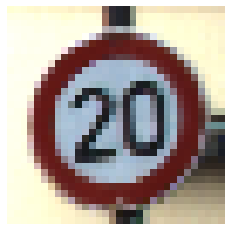

Intermediate activations:


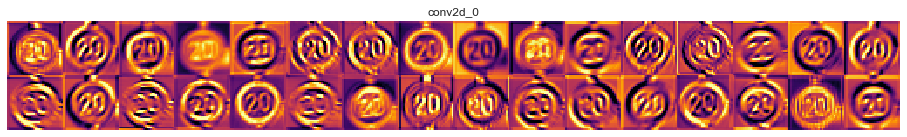

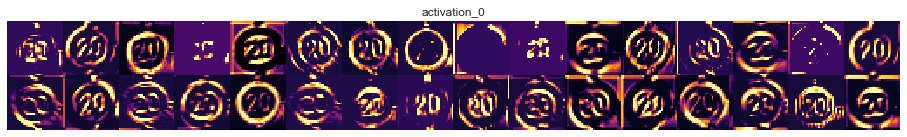

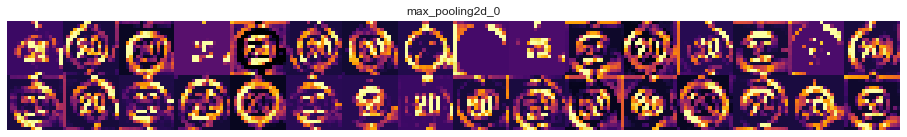

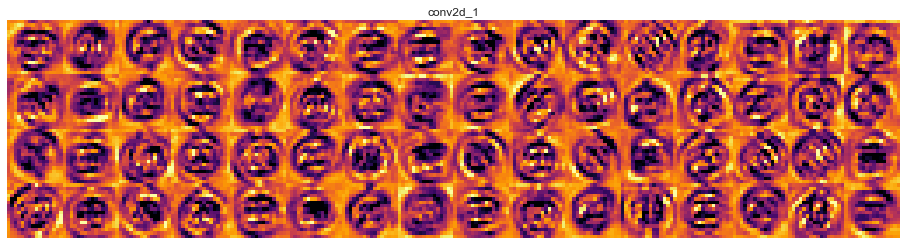

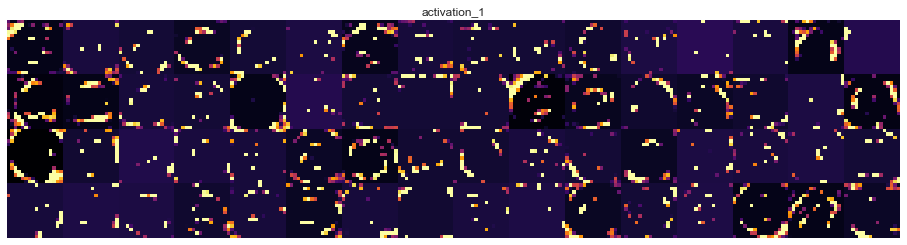

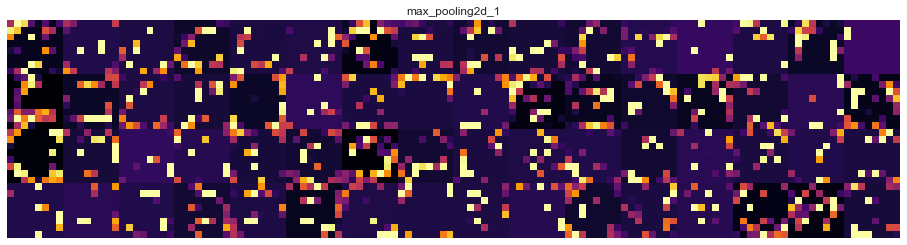

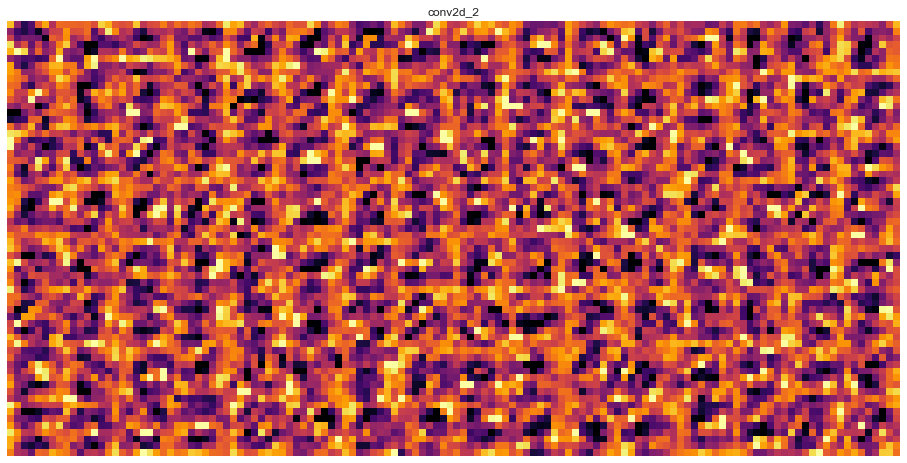

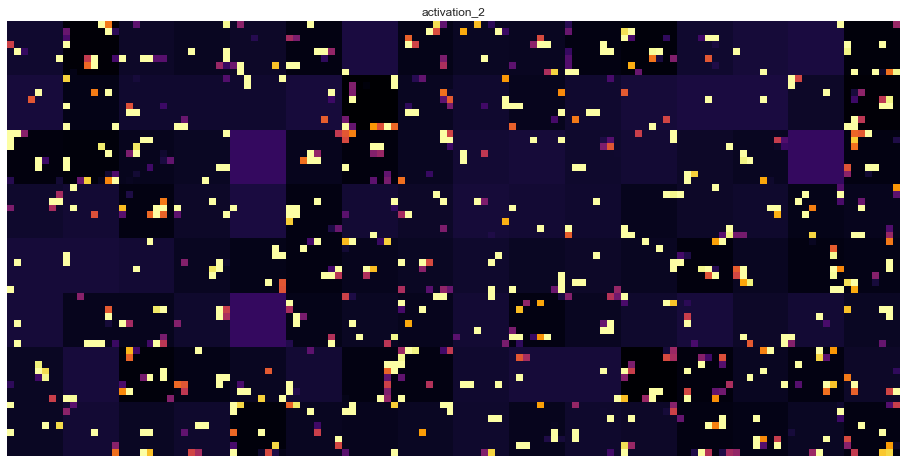

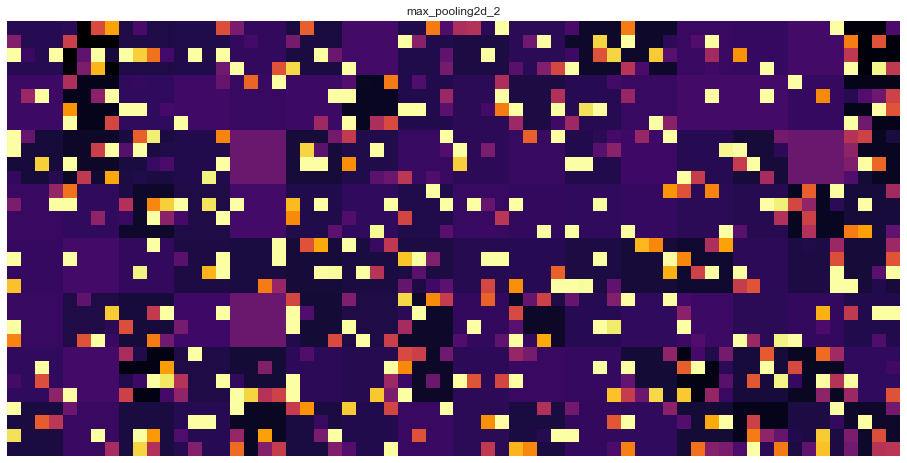

In [138]:
for image_path in images:

    # Load the input image
    img = tf.keras.preprocessing.image.load_img(image_path, target_size = (img_width, img_height)) 
    img_tensor = tf.keras.preprocessing.image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis = 0) 

    # Display the input image
    input_image = img_tensor / 255
    print('Input image:')
    plt.imshow(input_image[0])
    plt.axis('off')
    plt.show()
    
    # Pre-process the input image
    img_tensor -= img_tensor.mean()
    img_tensor /= (img_tensor.std() + 1e-7)
    
    # Extract feature maps (activation maps) from activation_model
    activations = activation_model.predict(img_tensor)
    
    # Select the applicable layers
    conv_activations = []
    conv_layer_names = []
    for layer_number, layer in list(enumerate(model.layers[1:])):
        printable = False
        if isinstance(layer, tf.keras.layers.Conv2D):
            printable = True
        if isinstance(layer, tf.keras.layers.MaxPooling2D):
            printable = True
        if isinstance(layer, tf.keras.layers.Activation):
            printable = True
        if printable:
            conv_activations.append(activations[layer_number])
            conv_layer_names.append(layer.name)
    
    print('Intermediate activations:')
    display_intermediate_activations(conv_layer_names, conv_activations)
    print('\n')

<a class="anchor" id="model-vizualization-activation-int-ki"></a>
<b>Key Insights</b>:
   > <p> The first layers encode relevant information of the input data, some channels detect simple patterns and others filter out unwanted noise. Intermediate layers increase complexity and encode combinations of abstract visual patterns. The final layers became more highly complex, visual interpretability is completely lost but information encoded by those layers are relevant to the classifier.
</p>

[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="model-vizualization-activation-single"></a>
##### 4.4.1.2: Activation of a single channel

Input image:


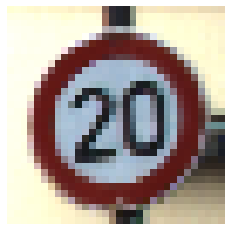

Activation layer #2, channel #1:


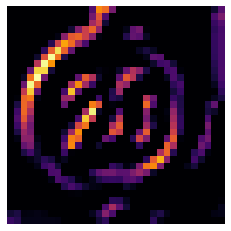

In [139]:
activation_layer = 2
channel = 1

for image_path in images:
    
    # Load the input image
    img = tf.keras.preprocessing.image.load_img(image_path, target_size = (img_width, img_height)) 
    img_tensor = tf.keras.preprocessing.image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis = 0) 
    
    # Display the input image
    input_image = img_tensor / 255
    print('Input image:')
    plt.imshow(input_image[0])
    plt.axis('off')
    plt.show()
    
    # Pre-process the input image
    img_tensor -= img_tensor.mean()
    img_tensor /= (img_tensor.std() + 1e-7)
    
    # Extract feature maps (activation maps) from activation_model
    activations = activation_model.predict(img_tensor)
    
    print('Activation layer #{0:}, channel #{1:}:'.format(activation_layer, channel))
    plt.imshow(activations[activation_layer][0, :, :, channel], cmap = 'inferno')
    plt.axis('off')
    plt.show()
    
    print('\n')

[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="model-vizualization-filter"></a>
#### 4.4.2: Filter Visualization

The convolution operation uses matrixes of visual patterns, kernels, to extract features from input data. As the input data is encoded in three color channels (RGB), then each channel has a collection of kernels, called filter, in each certain visual pattern are enhanced. Convolution filters can be visually assessed in order to analyze the visual pattern that each filter is tuned to respond.

The visual representation of filters uses gradient ascent in input space.


The following code is based on the Keras example for Convolutional Filter Visualization:

*    Title: Visualization of the filters of VGG16, via gradient ascent in input space
*    Author: François Chollet (fchollet) & other contributors
*    Date: Sep 8, 2019
*    Link: https://github.com/keras-team/keras/blob/master/examples/conv_filter_visualization.py

In [140]:
def visualize_layer(model,
                    layer_name,
                    step = 1.,
                    epochs = 15,
                    upscaling_steps = 9,
                    upscaling_factor = 1.2,
                    output_dim = (512, 512),
                    filter_range = (0, 32)):
    """Visualizes the most relevant filters of one conv-layer in a certain model.
    # Arguments
        model: The model containing layer_name.
        layer_name: The name of the layer to be visualized.
                    Has to be a part of model.
        step: step size for gradient ascent.
        epochs: Number of iterations for gradient ascent.
        upscaling_steps: Number of upscaling steps.
                         Starting image is in this case (80, 80).
        upscaling_factor: Factor to which to slowly upgrade
                          the image towards output_dim.
        output_dim: [img_width, img_height] The output image dimensions.
        filter_range: Tupel[lower, upper]
                      Determines the to be computed filter numbers.
                      If the second value is `None`,
                      the last filter will be inferred as the upper boundary.
    """

    def _generate_filter_image(input_img,
                               layer_output,
                               filter_index):
        """Generates image for one particular filter.
        # Arguments
            input_img: The input-image Tensor.
            layer_output: The output-image Tensor.
            filter_index: The to be processed filter number.
                          Assumed to be valid.
        #Returns
            Either None if no image could be generated.
            or a tuple of the image (array) itself and the last loss.
        """
        
        # we build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # we compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, input_img)[0]

        # normalization trick: we normalize the gradient
        grads =  grads / (K.sqrt(K.mean(K.square(grads))) + K.epsilon())

        # this function returns the loss and grads given the input picture
        iterate = K.function([input_img], [loss, grads])

        # we start from a gray image with some random noise
        intermediate_dim = tuple(
            int(x / (upscaling_factor ** upscaling_steps)) for x in output_dim)

        input_img_data = np.random.random(
                (1, intermediate_dim[0], intermediate_dim[1], 3))
        input_img_data = (input_img_data - 0.5) * 20 + 128

        # Slowly upscaling towards the original size prevents
        # a dominating high-frequency of the to visualized structure
        # as it would occur if we directly compute the 412d-image.
        # Behaves as a better starting point for each following dimension
        # and therefore avoids poor local minima
        for up in reversed(range(upscaling_steps)):
            # we run gradient ascent for e.g. 20 steps
            for _ in range(epochs):
                loss_value, grads_value = iterate([input_img_data])
                input_img_data += grads_value * step

                # some filters get stuck to 0, we can skip them
                if loss_value <= K.epsilon():
                    return None

            # Calculate upscaled dimension
            intermediate_dim = tuple(
                int(x / (upscaling_factor ** up)) for x in output_dim)
            # Upscale
            img = deprocess_image(input_img_data[0])
            img = np.array(pil_image.fromarray(img).resize(intermediate_dim,
                                                           pil_image.BICUBIC))
            input_img_data = np.expand_dims(
                process_image(img, input_img_data[0]), 0)

        # decode the resulting input image
        img = deprocess_image(input_img_data[0])
        #print('Costs of filter {:3}: {:5.0f}'.format(filter_index,loss_value))
        return img, loss_value

    def _draw_filters(filters, n = None):
        """Draw the best filters in a nxn grid.
        # Arguments
            filters: A List of generated images and their corresponding losses
                     for each processed filter.
            n: dimension of the grid.
               If none, the largest possible square will be used
        """
        if n is None:
            n = int(np.floor(np.sqrt(len(filters))))

        # the filters that have the highest loss are assumed to be better-looking.
        # we will only keep the top n*n filters.
        filters.sort(key = lambda x: x[1], reverse=True)
        filters = filters[:n * n]

        # build a black picture with enough space for
        # e.g. our 8 x 8 filters of size 412 x 412, with a 5px margin in between
        MARGIN = 5
        width = n * output_dim[0] + (n - 1) * MARGIN
        height = n * output_dim[1] + (n - 1) * MARGIN
        stitched_filters = np.zeros((width, height, 3), dtype = 'uint8')

        # fill the picture with our saved filters
        for i in range(n):
            for j in range(n):
                img, _ = filters[i * n + j]
                width_margin = (output_dim[0] + MARGIN) * i
                height_margin = (output_dim[1] + MARGIN) * j
                stitched_filters[
                    width_margin: width_margin + output_dim[0],
                    height_margin: height_margin + output_dim[1], :] = img

        # save the result to disk
        save_img('ConvNet_Filters_{0:}_{1:}x{1:}.png'.format(layer_name, n), stitched_filters)
        
        # print image
        plt.figure(figsize=(10,10))
        plt.title(layer_name)
        plt.grid(False)
        plt.axis('off')
        plt.imshow(stitched_filters)
        plt.show()

    # this is the placeholder for the input images
    assert len(model.inputs) == 1
    input_img = model.inputs[0]

    # get the symbolic outputs of each "key" layer (we gave them unique names).
    layer_dict = dict([(layer.name, layer) for layer in model.layers])

    output_layer = layer_dict[layer_name]
    #assert isinstance(output_layer, keras.layers.Conv2D)

    # Compute to be processed filter range
    filter_lower = filter_range[0]
    filter_upper = (filter_range[1]
                    if filter_range[1] is not None
                    else len(output_layer.get_weights()[1]))
    print('Compute filters {:} to {:}'.format(filter_lower, filter_upper))

    # iterate through each filter and generate its corresponding image
    processed_filters = []
    for f in range(filter_lower, filter_upper):
        img_loss = _generate_filter_image(input_img, output_layer.output, f)

        if img_loss is not None:
            processed_filters.append(img_loss)

    #print('{} filter processed.'.format(len(processed_filters)))
    # Finally draw and store the best filters to disk
    _draw_filters(processed_filters)

In [141]:
def deprocess_image(x):
    """utility function to convert a float array into a valid uint8 image.
    # Arguments
        x: A numpy-array representing the generated image.
    # Returns
        A processed numpy-array, which could be used in e.g. imshow.
    """
    # normalize tensor: center on 0., ensure std is 0.25
    x -= x.mean()
    x /= (x.std() + K.epsilon())
    x *= 0.25

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [142]:
def process_image(x, former):
    """utility function to convert a valid uint8 image back into a float array.
       Reverses `deprocess_image`.
    # Arguments
        x: A numpy-array, which could be used in e.g. imshow.
        former: The former numpy-array.
                Need to determine the former mean and variance.
    # Returns
        A processed numpy-array representing the generated image.
    """
    return (x / 255 - 0.5) * 4 * former.std() + former.mean()

In [143]:
conv_layer_names = []

# Select the applicable layers
for layer_number, layer in list(enumerate(model.layers)):
    printable = False
    if isinstance(layer, tf.keras.layers.Activation):
        printable = True
    if printable:
        conv_layer_names.append(layer.name)

Compute filters 0 to 32


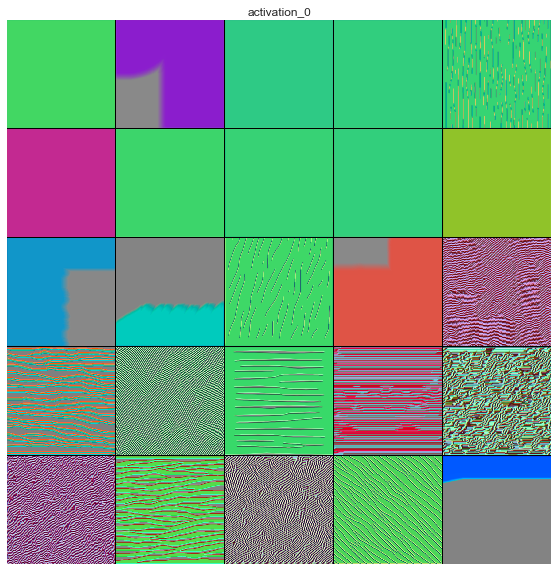

Compute filters 0 to 32


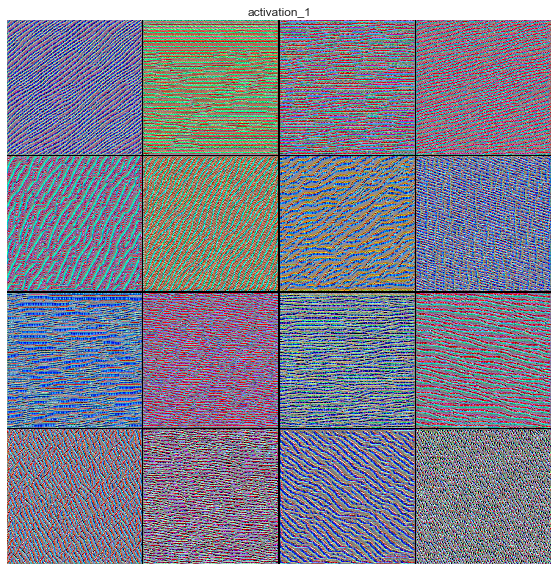

Compute filters 0 to 32


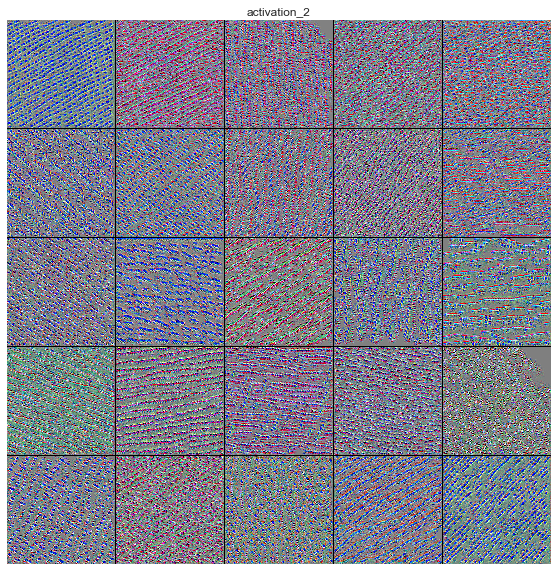

In [144]:
for conv_layer_name in conv_layer_names:
    visualize_layer(model, conv_layer_name)

<a class="anchor" id="model-vizualization-filter-ki"></a>
<b>Key Insights</b>:
   > <p> As the networks progresses, the filters begin to encode more complex combinations of visual patterns. Each convolutional layer is tuned to a collection of filters in which their input can be represented by a combination of those filters. This concept allows convolution networks to correlate complex visual patterns to image data. </p>

[Return to Table of Contents](#Table_Contents)

<a class="anchor" id="references"></a>
# 5. References



>(Santurkar et al, 2019) – S. Santurkar, D. Tsipras, A. Ilyas, A. Madry, How does batch normalization help optimization?, Cornell University 

>(Stallkamp et al., 2012) – J. Stallkamp, M. Schlipsing, J. Salmen, C. Igel,  Man vs. computer: Benchmarking machine learning algorithms for traffic sign recognition. ,Neural networks 32 (2012): 323-332. 

>(2019) – NapsterInBlue, Fine-Tuning Pretrained Networks, GitHub, retrieved from: https://napsterinblue.github.io/notes/machine_learning/computer_vision/fine_tuning_conv_nets/ 

>(Verma, 2019) – S.Verma, A Simple Guide to Using Keras Pretrained Models, Towards Data Science, retrieved from: https://towardsdatascience.com/step-by-step-guide-to-using-pretrained-models-in-keras-c9097b647b29 

>(Sachan, 2018) – A.Sachan, Fine-tuning Convolutional Neural Network on own Data using Keras Tensorflow, CV-Tricks.com, retrieved from:https://cv-tricks.com/keras/fine-tuning-tensorflow/ 

>(Chollet, 2018) – F. Chollet, Deep Learning with Python, Manning Publications 

[Return to Table of Contents](#Table_Contents)